# Week 04. Toy Project II (폰트 종류 Classification)

## 1. 데이터 수집

* [무료 한글 폰트 다운로드](https://www.kogl.or.kr/static/freefontevent/freeFontEvent.html)
* [폰트 확인하기](https://fontdrop.info/)

## 2. 데이터 가공 및 전처리

* 2-1. 한글 유니코드 확인하기
* 2-2. 한글 글자에 대해 해당 폰트로 그려보기
* 2-3. 한글 글자에 대해 다른 폰트로 그려보기
* 2-4. 한글 글자에 대해 저장하기
* 2-5. 활용로직 검색 및 선정하기 (DNN)
* 2-6. 모든 폰트에 대해 이미지 변환하기
* 2-7. 모든 폰트에 대해 변환한 이미지를 numpy 로 저장하기
* 2-8. 데이터 학습용과 검증용 및 평가용으로 분할하기

### 2-1. 한글 유니코드 확인하기

![kr_unicodes](../src/04/kr_unicodes.png)

* '가': 'AC00'
* '힝': 'D79D'

### 2-2. 한글 글자에 대해 해당 폰트로 그려보기

In [80]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

def draw_char(font_file, unicode, size=256, offset=20):
    char_size = size - (offset * 2)
    font = ImageFont.truetype(font_file, size=char_size)
    
    img = Image.new("RGB", (size, size), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    draw.text((offset, offset), unicode, (0, 0, 0), font=font)
    return img

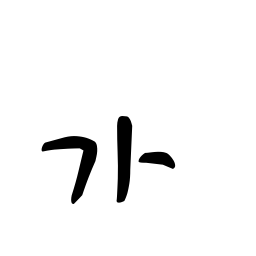

In [81]:
font_file = '../../src/fonts/datasets/KCCAhnjunggeun.ttf'
img = draw_char(font_file, unicode="\uAC00", size=256, offset=40)
img

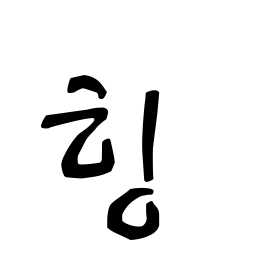

In [82]:
font_file = '../../src/fonts/datasets/KCCAhnjunggeun.ttf'
img = draw_char(font_file, unicode="\uD79D", size=256, offset=40)
img

### 2-3. 한글 글자에 대해 다른 폰트로 그려보기

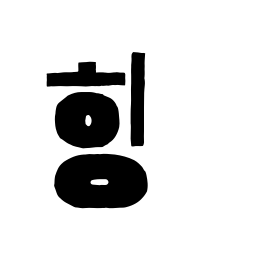

In [83]:
font_file = '../../src/fonts/datasets/BMKIRANGHAERANG-TTF.ttf'
img = draw_char(font_file, unicode="\uD79D", size=256, offset=40)
img

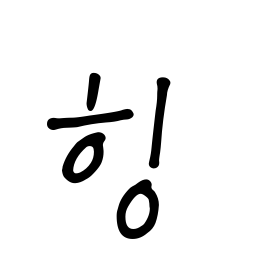

In [84]:
font_file = '../../src/fonts/datasets/Chilgok_Cye.ttf'
img = draw_char(font_file, unicode="\uD79D", size=256, offset=40)
img

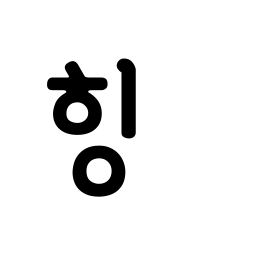

In [85]:
font_file = '../../src/fonts/datasets/yanolja.ttf'
img = draw_char(font_file, unicode="\uD79D", size=256, offset=40)
img

### 2-4. 한글 글자에 대해 저장하기

In [86]:
import os

def save_to_jpg(fdir, fname, img):
    if not os.path.exists(fdir):
        os.makedirs(fdir)
    fout = os.path.join(fdir, fname)
    img.save(fout)

In [87]:
font_file = '../../src/fonts/datasets/KCCAhnjunggeun.ttf'
img = draw_char(font_file, unicode="\uD79D", size=256, offset=40)

fdir = '../../src/fonts/images'
fname = 'KCCAhnjunggeun_D79D.jpg'
save_to_jpg(fdir, fname, img)

![saved_img](../src/04/saved_img.png)

### 2-5. 활용로직 검색 및 선정하기 (DNN)

![image_classification](../src/04/image_classification.png)

![image_classification](../src/04/image_classification_kr.png)

### 2-6. 모든 폰트에 대해 이미지 변환하기

In [88]:
def font_to_image(font_file, unicodes, fdir_base, size=256, offset=40):
    # define char_size
    char_size = size - (offset * 2)
    
    # load font
    font_name = font_file.split('/')[-1].split('.')[0]
    font = ImageFont.truetype(font_file, size=char_size)
    
    # make directory if not exists
    fdir = os.path.join(fdir_base, font_name)
    if not os.path.exists(fdir):
        os.makedirs(fdir)
        
    # draw each character with font
    for unicode in unicodes:
        img = Image.new("RGB", (size, size), (255, 255, 255))
        draw = ImageDraw.Draw(img)
        draw.text((offset, offset), unicode, (0, 0, 0), font=font)
        
        # save each character image with font
        unicode_name = hex(ord(unicode))[2:]
        fout = os.path.join(fdir, unicode_name + '.jpg')
        img.save(fout)
        print('saved [font: {} / unicode: {}]'.format(font_name, unicode_name))

In [89]:
# unicode N개에 대해 테스트
font_file = '../../src/fonts/datasets/KCCAhnjunggeun.ttf'
unicodes = ['\uAC00', '\uD79D']
fdir_base = '../../src/images'

font_to_image(font_file, unicodes, fdir_base, size=256, offset=40)

saved [font: KCCAhnjunggeun / unicode: ac00]
saved [font: KCCAhnjunggeun / unicode: d79d]


In [90]:
# 모든 한글에 대한 unicode 찾기

![unicodes_in_range](../src/04/unicodes_in_range.png)

In [91]:
def unicodes_in_range_chr(start=0xAC00, end=0xD79D):
    unicode_chars = []

    for i in range(start, end):
        char = chr(i)
        unicode_chars.append(char)
    
    return unicode_chars

In [92]:
print(unicodes_in_range_chr())

['가', '각', '갂', '갃', '간', '갅', '갆', '갇', '갈', '갉', '갊', '갋', '갌', '갍', '갎', '갏', '감', '갑', '값', '갓', '갔', '강', '갖', '갗', '갘', '같', '갚', '갛', '개', '객', '갞', '갟', '갠', '갡', '갢', '갣', '갤', '갥', '갦', '갧', '갨', '갩', '갪', '갫', '갬', '갭', '갮', '갯', '갰', '갱', '갲', '갳', '갴', '갵', '갶', '갷', '갸', '갹', '갺', '갻', '갼', '갽', '갾', '갿', '걀', '걁', '걂', '걃', '걄', '걅', '걆', '걇', '걈', '걉', '걊', '걋', '걌', '걍', '걎', '걏', '걐', '걑', '걒', '걓', '걔', '걕', '걖', '걗', '걘', '걙', '걚', '걛', '걜', '걝', '걞', '걟', '걠', '걡', '걢', '걣', '걤', '걥', '걦', '걧', '걨', '걩', '걪', '걫', '걬', '걭', '걮', '걯', '거', '걱', '걲', '걳', '건', '걵', '걶', '걷', '걸', '걹', '걺', '걻', '걼', '걽', '걾', '걿', '검', '겁', '겂', '것', '겄', '겅', '겆', '겇', '겈', '겉', '겊', '겋', '게', '겍', '겎', '겏', '겐', '겑', '겒', '겓', '겔', '겕', '겖', '겗', '겘', '겙', '겚', '겛', '겜', '겝', '겞', '겟', '겠', '겡', '겢', '겣', '겤', '겥', '겦', '겧', '겨', '격', '겪', '겫', '견', '겭', '겮', '겯', '결', '겱', '겲', '겳', '겴', '겵', '겶', '겷', '겸', '겹', '겺', '겻', '겼', '경', '겾', '겿', '곀', '곁', '곂', '곃', '계', '곅', '곆', '곇',

In [93]:
# 한글 unicode 에 대해 모든 그림 저장
font_file = '../../src/fonts/datasets/KCCAhnjunggeun.ttf'
unicodes = unicodes_in_range_chr(start=0xAC00, end=0xD79D)
fdir_base = '../../src/images'

font_to_image(font_file, unicodes, fdir_base, size=256, offset=40)

saved [font: KCCAhnjunggeun / unicode: ac00]
saved [font: KCCAhnjunggeun / unicode: ac01]
saved [font: KCCAhnjunggeun / unicode: ac02]
saved [font: KCCAhnjunggeun / unicode: ac03]
saved [font: KCCAhnjunggeun / unicode: ac04]
saved [font: KCCAhnjunggeun / unicode: ac05]
saved [font: KCCAhnjunggeun / unicode: ac06]
saved [font: KCCAhnjunggeun / unicode: ac07]
saved [font: KCCAhnjunggeun / unicode: ac08]
saved [font: KCCAhnjunggeun / unicode: ac09]
saved [font: KCCAhnjunggeun / unicode: ac0a]
saved [font: KCCAhnjunggeun / unicode: ac0b]
saved [font: KCCAhnjunggeun / unicode: ac0c]
saved [font: KCCAhnjunggeun / unicode: ac0d]
saved [font: KCCAhnjunggeun / unicode: ac0e]
saved [font: KCCAhnjunggeun / unicode: ac0f]
saved [font: KCCAhnjunggeun / unicode: ac10]
saved [font: KCCAhnjunggeun / unicode: ac11]
saved [font: KCCAhnjunggeun / unicode: ac12]
saved [font: KCCAhnjunggeun / unicode: ac13]
saved [font: KCCAhnjunggeun / unicode: ac14]
saved [font: KCCAhnjunggeun / unicode: ac15]
saved [fon

saved [font: KCCAhnjunggeun / unicode: acf8]
saved [font: KCCAhnjunggeun / unicode: acf9]
saved [font: KCCAhnjunggeun / unicode: acfa]
saved [font: KCCAhnjunggeun / unicode: acfb]
saved [font: KCCAhnjunggeun / unicode: acfc]
saved [font: KCCAhnjunggeun / unicode: acfd]
saved [font: KCCAhnjunggeun / unicode: acfe]
saved [font: KCCAhnjunggeun / unicode: acff]
saved [font: KCCAhnjunggeun / unicode: ad00]
saved [font: KCCAhnjunggeun / unicode: ad01]
saved [font: KCCAhnjunggeun / unicode: ad02]
saved [font: KCCAhnjunggeun / unicode: ad03]
saved [font: KCCAhnjunggeun / unicode: ad04]
saved [font: KCCAhnjunggeun / unicode: ad05]
saved [font: KCCAhnjunggeun / unicode: ad06]
saved [font: KCCAhnjunggeun / unicode: ad07]
saved [font: KCCAhnjunggeun / unicode: ad08]
saved [font: KCCAhnjunggeun / unicode: ad09]
saved [font: KCCAhnjunggeun / unicode: ad0a]
saved [font: KCCAhnjunggeun / unicode: ad0b]
saved [font: KCCAhnjunggeun / unicode: ad0c]
saved [font: KCCAhnjunggeun / unicode: ad0d]
saved [fon

saved [font: KCCAhnjunggeun / unicode: ae10]
saved [font: KCCAhnjunggeun / unicode: ae11]
saved [font: KCCAhnjunggeun / unicode: ae12]
saved [font: KCCAhnjunggeun / unicode: ae13]
saved [font: KCCAhnjunggeun / unicode: ae14]
saved [font: KCCAhnjunggeun / unicode: ae15]
saved [font: KCCAhnjunggeun / unicode: ae16]
saved [font: KCCAhnjunggeun / unicode: ae17]
saved [font: KCCAhnjunggeun / unicode: ae18]
saved [font: KCCAhnjunggeun / unicode: ae19]
saved [font: KCCAhnjunggeun / unicode: ae1a]
saved [font: KCCAhnjunggeun / unicode: ae1b]
saved [font: KCCAhnjunggeun / unicode: ae1c]
saved [font: KCCAhnjunggeun / unicode: ae1d]
saved [font: KCCAhnjunggeun / unicode: ae1e]
saved [font: KCCAhnjunggeun / unicode: ae1f]
saved [font: KCCAhnjunggeun / unicode: ae20]
saved [font: KCCAhnjunggeun / unicode: ae21]
saved [font: KCCAhnjunggeun / unicode: ae22]
saved [font: KCCAhnjunggeun / unicode: ae23]
saved [font: KCCAhnjunggeun / unicode: ae24]
saved [font: KCCAhnjunggeun / unicode: ae25]
saved [fon

saved [font: KCCAhnjunggeun / unicode: aee0]
saved [font: KCCAhnjunggeun / unicode: aee1]
saved [font: KCCAhnjunggeun / unicode: aee2]
saved [font: KCCAhnjunggeun / unicode: aee3]
saved [font: KCCAhnjunggeun / unicode: aee4]
saved [font: KCCAhnjunggeun / unicode: aee5]
saved [font: KCCAhnjunggeun / unicode: aee6]
saved [font: KCCAhnjunggeun / unicode: aee7]
saved [font: KCCAhnjunggeun / unicode: aee8]
saved [font: KCCAhnjunggeun / unicode: aee9]
saved [font: KCCAhnjunggeun / unicode: aeea]
saved [font: KCCAhnjunggeun / unicode: aeeb]
saved [font: KCCAhnjunggeun / unicode: aeec]
saved [font: KCCAhnjunggeun / unicode: aeed]
saved [font: KCCAhnjunggeun / unicode: aeee]
saved [font: KCCAhnjunggeun / unicode: aeef]
saved [font: KCCAhnjunggeun / unicode: aef0]
saved [font: KCCAhnjunggeun / unicode: aef1]
saved [font: KCCAhnjunggeun / unicode: aef2]
saved [font: KCCAhnjunggeun / unicode: aef3]
saved [font: KCCAhnjunggeun / unicode: aef4]
saved [font: KCCAhnjunggeun / unicode: aef5]
saved [fon

saved [font: KCCAhnjunggeun / unicode: afb6]
saved [font: KCCAhnjunggeun / unicode: afb7]
saved [font: KCCAhnjunggeun / unicode: afb8]
saved [font: KCCAhnjunggeun / unicode: afb9]
saved [font: KCCAhnjunggeun / unicode: afba]
saved [font: KCCAhnjunggeun / unicode: afbb]
saved [font: KCCAhnjunggeun / unicode: afbc]
saved [font: KCCAhnjunggeun / unicode: afbd]
saved [font: KCCAhnjunggeun / unicode: afbe]
saved [font: KCCAhnjunggeun / unicode: afbf]
saved [font: KCCAhnjunggeun / unicode: afc0]
saved [font: KCCAhnjunggeun / unicode: afc1]
saved [font: KCCAhnjunggeun / unicode: afc2]
saved [font: KCCAhnjunggeun / unicode: afc3]
saved [font: KCCAhnjunggeun / unicode: afc4]
saved [font: KCCAhnjunggeun / unicode: afc5]
saved [font: KCCAhnjunggeun / unicode: afc6]
saved [font: KCCAhnjunggeun / unicode: afc7]
saved [font: KCCAhnjunggeun / unicode: afc8]
saved [font: KCCAhnjunggeun / unicode: afc9]
saved [font: KCCAhnjunggeun / unicode: afca]
saved [font: KCCAhnjunggeun / unicode: afcb]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b08f]
saved [font: KCCAhnjunggeun / unicode: b090]
saved [font: KCCAhnjunggeun / unicode: b091]
saved [font: KCCAhnjunggeun / unicode: b092]
saved [font: KCCAhnjunggeun / unicode: b093]
saved [font: KCCAhnjunggeun / unicode: b094]
saved [font: KCCAhnjunggeun / unicode: b095]
saved [font: KCCAhnjunggeun / unicode: b096]
saved [font: KCCAhnjunggeun / unicode: b097]
saved [font: KCCAhnjunggeun / unicode: b098]
saved [font: KCCAhnjunggeun / unicode: b099]
saved [font: KCCAhnjunggeun / unicode: b09a]
saved [font: KCCAhnjunggeun / unicode: b09b]
saved [font: KCCAhnjunggeun / unicode: b09c]
saved [font: KCCAhnjunggeun / unicode: b09d]
saved [font: KCCAhnjunggeun / unicode: b09e]
saved [font: KCCAhnjunggeun / unicode: b09f]
saved [font: KCCAhnjunggeun / unicode: b0a0]
saved [font: KCCAhnjunggeun / unicode: b0a1]
saved [font: KCCAhnjunggeun / unicode: b0a2]
saved [font: KCCAhnjunggeun / unicode: b0a3]
saved [font: KCCAhnjunggeun / unicode: b0a4]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b14a]
saved [font: KCCAhnjunggeun / unicode: b14b]
saved [font: KCCAhnjunggeun / unicode: b14c]
saved [font: KCCAhnjunggeun / unicode: b14d]
saved [font: KCCAhnjunggeun / unicode: b14e]
saved [font: KCCAhnjunggeun / unicode: b14f]
saved [font: KCCAhnjunggeun / unicode: b150]
saved [font: KCCAhnjunggeun / unicode: b151]
saved [font: KCCAhnjunggeun / unicode: b152]
saved [font: KCCAhnjunggeun / unicode: b153]
saved [font: KCCAhnjunggeun / unicode: b154]
saved [font: KCCAhnjunggeun / unicode: b155]
saved [font: KCCAhnjunggeun / unicode: b156]
saved [font: KCCAhnjunggeun / unicode: b157]
saved [font: KCCAhnjunggeun / unicode: b158]
saved [font: KCCAhnjunggeun / unicode: b159]
saved [font: KCCAhnjunggeun / unicode: b15a]
saved [font: KCCAhnjunggeun / unicode: b15b]
saved [font: KCCAhnjunggeun / unicode: b15c]
saved [font: KCCAhnjunggeun / unicode: b15d]
saved [font: KCCAhnjunggeun / unicode: b15e]
saved [font: KCCAhnjunggeun / unicode: b15f]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b22b]
saved [font: KCCAhnjunggeun / unicode: b22c]
saved [font: KCCAhnjunggeun / unicode: b22d]
saved [font: KCCAhnjunggeun / unicode: b22e]
saved [font: KCCAhnjunggeun / unicode: b22f]
saved [font: KCCAhnjunggeun / unicode: b230]
saved [font: KCCAhnjunggeun / unicode: b231]
saved [font: KCCAhnjunggeun / unicode: b232]
saved [font: KCCAhnjunggeun / unicode: b233]
saved [font: KCCAhnjunggeun / unicode: b234]
saved [font: KCCAhnjunggeun / unicode: b235]
saved [font: KCCAhnjunggeun / unicode: b236]
saved [font: KCCAhnjunggeun / unicode: b237]
saved [font: KCCAhnjunggeun / unicode: b238]
saved [font: KCCAhnjunggeun / unicode: b239]
saved [font: KCCAhnjunggeun / unicode: b23a]
saved [font: KCCAhnjunggeun / unicode: b23b]
saved [font: KCCAhnjunggeun / unicode: b23c]
saved [font: KCCAhnjunggeun / unicode: b23d]
saved [font: KCCAhnjunggeun / unicode: b23e]
saved [font: KCCAhnjunggeun / unicode: b23f]
saved [font: KCCAhnjunggeun / unicode: b240]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b2ff]
saved [font: KCCAhnjunggeun / unicode: b300]
saved [font: KCCAhnjunggeun / unicode: b301]
saved [font: KCCAhnjunggeun / unicode: b302]
saved [font: KCCAhnjunggeun / unicode: b303]
saved [font: KCCAhnjunggeun / unicode: b304]
saved [font: KCCAhnjunggeun / unicode: b305]
saved [font: KCCAhnjunggeun / unicode: b306]
saved [font: KCCAhnjunggeun / unicode: b307]
saved [font: KCCAhnjunggeun / unicode: b308]
saved [font: KCCAhnjunggeun / unicode: b309]
saved [font: KCCAhnjunggeun / unicode: b30a]
saved [font: KCCAhnjunggeun / unicode: b30b]
saved [font: KCCAhnjunggeun / unicode: b30c]
saved [font: KCCAhnjunggeun / unicode: b30d]
saved [font: KCCAhnjunggeun / unicode: b30e]
saved [font: KCCAhnjunggeun / unicode: b30f]
saved [font: KCCAhnjunggeun / unicode: b310]
saved [font: KCCAhnjunggeun / unicode: b311]
saved [font: KCCAhnjunggeun / unicode: b312]
saved [font: KCCAhnjunggeun / unicode: b313]
saved [font: KCCAhnjunggeun / unicode: b314]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b3b8]
saved [font: KCCAhnjunggeun / unicode: b3b9]
saved [font: KCCAhnjunggeun / unicode: b3ba]
saved [font: KCCAhnjunggeun / unicode: b3bb]
saved [font: KCCAhnjunggeun / unicode: b3bc]
saved [font: KCCAhnjunggeun / unicode: b3bd]
saved [font: KCCAhnjunggeun / unicode: b3be]
saved [font: KCCAhnjunggeun / unicode: b3bf]
saved [font: KCCAhnjunggeun / unicode: b3c0]
saved [font: KCCAhnjunggeun / unicode: b3c1]
saved [font: KCCAhnjunggeun / unicode: b3c2]
saved [font: KCCAhnjunggeun / unicode: b3c3]
saved [font: KCCAhnjunggeun / unicode: b3c4]
saved [font: KCCAhnjunggeun / unicode: b3c5]
saved [font: KCCAhnjunggeun / unicode: b3c6]
saved [font: KCCAhnjunggeun / unicode: b3c7]
saved [font: KCCAhnjunggeun / unicode: b3c8]
saved [font: KCCAhnjunggeun / unicode: b3c9]
saved [font: KCCAhnjunggeun / unicode: b3ca]
saved [font: KCCAhnjunggeun / unicode: b3cb]
saved [font: KCCAhnjunggeun / unicode: b3cc]
saved [font: KCCAhnjunggeun / unicode: b3cd]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b489]
saved [font: KCCAhnjunggeun / unicode: b48a]
saved [font: KCCAhnjunggeun / unicode: b48b]
saved [font: KCCAhnjunggeun / unicode: b48c]
saved [font: KCCAhnjunggeun / unicode: b48d]
saved [font: KCCAhnjunggeun / unicode: b48e]
saved [font: KCCAhnjunggeun / unicode: b48f]
saved [font: KCCAhnjunggeun / unicode: b490]
saved [font: KCCAhnjunggeun / unicode: b491]
saved [font: KCCAhnjunggeun / unicode: b492]
saved [font: KCCAhnjunggeun / unicode: b493]
saved [font: KCCAhnjunggeun / unicode: b494]
saved [font: KCCAhnjunggeun / unicode: b495]
saved [font: KCCAhnjunggeun / unicode: b496]
saved [font: KCCAhnjunggeun / unicode: b497]
saved [font: KCCAhnjunggeun / unicode: b498]
saved [font: KCCAhnjunggeun / unicode: b499]
saved [font: KCCAhnjunggeun / unicode: b49a]
saved [font: KCCAhnjunggeun / unicode: b49b]
saved [font: KCCAhnjunggeun / unicode: b49c]
saved [font: KCCAhnjunggeun / unicode: b49d]
saved [font: KCCAhnjunggeun / unicode: b49e]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b571]
saved [font: KCCAhnjunggeun / unicode: b572]
saved [font: KCCAhnjunggeun / unicode: b573]
saved [font: KCCAhnjunggeun / unicode: b574]
saved [font: KCCAhnjunggeun / unicode: b575]
saved [font: KCCAhnjunggeun / unicode: b576]
saved [font: KCCAhnjunggeun / unicode: b577]
saved [font: KCCAhnjunggeun / unicode: b578]
saved [font: KCCAhnjunggeun / unicode: b579]
saved [font: KCCAhnjunggeun / unicode: b57a]
saved [font: KCCAhnjunggeun / unicode: b57b]
saved [font: KCCAhnjunggeun / unicode: b57c]
saved [font: KCCAhnjunggeun / unicode: b57d]
saved [font: KCCAhnjunggeun / unicode: b57e]
saved [font: KCCAhnjunggeun / unicode: b57f]
saved [font: KCCAhnjunggeun / unicode: b580]
saved [font: KCCAhnjunggeun / unicode: b581]
saved [font: KCCAhnjunggeun / unicode: b582]
saved [font: KCCAhnjunggeun / unicode: b583]
saved [font: KCCAhnjunggeun / unicode: b584]
saved [font: KCCAhnjunggeun / unicode: b585]
saved [font: KCCAhnjunggeun / unicode: b586]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b671]
saved [font: KCCAhnjunggeun / unicode: b672]
saved [font: KCCAhnjunggeun / unicode: b673]
saved [font: KCCAhnjunggeun / unicode: b674]
saved [font: KCCAhnjunggeun / unicode: b675]
saved [font: KCCAhnjunggeun / unicode: b676]
saved [font: KCCAhnjunggeun / unicode: b677]
saved [font: KCCAhnjunggeun / unicode: b678]
saved [font: KCCAhnjunggeun / unicode: b679]
saved [font: KCCAhnjunggeun / unicode: b67a]
saved [font: KCCAhnjunggeun / unicode: b67b]
saved [font: KCCAhnjunggeun / unicode: b67c]
saved [font: KCCAhnjunggeun / unicode: b67d]
saved [font: KCCAhnjunggeun / unicode: b67e]
saved [font: KCCAhnjunggeun / unicode: b67f]
saved [font: KCCAhnjunggeun / unicode: b680]
saved [font: KCCAhnjunggeun / unicode: b681]
saved [font: KCCAhnjunggeun / unicode: b682]
saved [font: KCCAhnjunggeun / unicode: b683]
saved [font: KCCAhnjunggeun / unicode: b684]
saved [font: KCCAhnjunggeun / unicode: b685]
saved [font: KCCAhnjunggeun / unicode: b686]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b73e]
saved [font: KCCAhnjunggeun / unicode: b73f]
saved [font: KCCAhnjunggeun / unicode: b740]
saved [font: KCCAhnjunggeun / unicode: b741]
saved [font: KCCAhnjunggeun / unicode: b742]
saved [font: KCCAhnjunggeun / unicode: b743]
saved [font: KCCAhnjunggeun / unicode: b744]
saved [font: KCCAhnjunggeun / unicode: b745]
saved [font: KCCAhnjunggeun / unicode: b746]
saved [font: KCCAhnjunggeun / unicode: b747]
saved [font: KCCAhnjunggeun / unicode: b748]
saved [font: KCCAhnjunggeun / unicode: b749]
saved [font: KCCAhnjunggeun / unicode: b74a]
saved [font: KCCAhnjunggeun / unicode: b74b]
saved [font: KCCAhnjunggeun / unicode: b74c]
saved [font: KCCAhnjunggeun / unicode: b74d]
saved [font: KCCAhnjunggeun / unicode: b74e]
saved [font: KCCAhnjunggeun / unicode: b74f]
saved [font: KCCAhnjunggeun / unicode: b750]
saved [font: KCCAhnjunggeun / unicode: b751]
saved [font: KCCAhnjunggeun / unicode: b752]
saved [font: KCCAhnjunggeun / unicode: b753]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b82e]
saved [font: KCCAhnjunggeun / unicode: b82f]
saved [font: KCCAhnjunggeun / unicode: b830]
saved [font: KCCAhnjunggeun / unicode: b831]
saved [font: KCCAhnjunggeun / unicode: b832]
saved [font: KCCAhnjunggeun / unicode: b833]
saved [font: KCCAhnjunggeun / unicode: b834]
saved [font: KCCAhnjunggeun / unicode: b835]
saved [font: KCCAhnjunggeun / unicode: b836]
saved [font: KCCAhnjunggeun / unicode: b837]
saved [font: KCCAhnjunggeun / unicode: b838]
saved [font: KCCAhnjunggeun / unicode: b839]
saved [font: KCCAhnjunggeun / unicode: b83a]
saved [font: KCCAhnjunggeun / unicode: b83b]
saved [font: KCCAhnjunggeun / unicode: b83c]
saved [font: KCCAhnjunggeun / unicode: b83d]
saved [font: KCCAhnjunggeun / unicode: b83e]
saved [font: KCCAhnjunggeun / unicode: b83f]
saved [font: KCCAhnjunggeun / unicode: b840]
saved [font: KCCAhnjunggeun / unicode: b841]
saved [font: KCCAhnjunggeun / unicode: b842]
saved [font: KCCAhnjunggeun / unicode: b843]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b8eb]
saved [font: KCCAhnjunggeun / unicode: b8ec]
saved [font: KCCAhnjunggeun / unicode: b8ed]
saved [font: KCCAhnjunggeun / unicode: b8ee]
saved [font: KCCAhnjunggeun / unicode: b8ef]
saved [font: KCCAhnjunggeun / unicode: b8f0]
saved [font: KCCAhnjunggeun / unicode: b8f1]
saved [font: KCCAhnjunggeun / unicode: b8f2]
saved [font: KCCAhnjunggeun / unicode: b8f3]
saved [font: KCCAhnjunggeun / unicode: b8f4]
saved [font: KCCAhnjunggeun / unicode: b8f5]
saved [font: KCCAhnjunggeun / unicode: b8f6]
saved [font: KCCAhnjunggeun / unicode: b8f7]
saved [font: KCCAhnjunggeun / unicode: b8f8]
saved [font: KCCAhnjunggeun / unicode: b8f9]
saved [font: KCCAhnjunggeun / unicode: b8fa]
saved [font: KCCAhnjunggeun / unicode: b8fb]
saved [font: KCCAhnjunggeun / unicode: b8fc]
saved [font: KCCAhnjunggeun / unicode: b8fd]
saved [font: KCCAhnjunggeun / unicode: b8fe]
saved [font: KCCAhnjunggeun / unicode: b8ff]
saved [font: KCCAhnjunggeun / unicode: b900]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b9e0]
saved [font: KCCAhnjunggeun / unicode: b9e1]
saved [font: KCCAhnjunggeun / unicode: b9e2]
saved [font: KCCAhnjunggeun / unicode: b9e3]
saved [font: KCCAhnjunggeun / unicode: b9e4]
saved [font: KCCAhnjunggeun / unicode: b9e5]
saved [font: KCCAhnjunggeun / unicode: b9e6]
saved [font: KCCAhnjunggeun / unicode: b9e7]
saved [font: KCCAhnjunggeun / unicode: b9e8]
saved [font: KCCAhnjunggeun / unicode: b9e9]
saved [font: KCCAhnjunggeun / unicode: b9ea]
saved [font: KCCAhnjunggeun / unicode: b9eb]
saved [font: KCCAhnjunggeun / unicode: b9ec]
saved [font: KCCAhnjunggeun / unicode: b9ed]
saved [font: KCCAhnjunggeun / unicode: b9ee]
saved [font: KCCAhnjunggeun / unicode: b9ef]
saved [font: KCCAhnjunggeun / unicode: b9f0]
saved [font: KCCAhnjunggeun / unicode: b9f1]
saved [font: KCCAhnjunggeun / unicode: b9f2]
saved [font: KCCAhnjunggeun / unicode: b9f3]
saved [font: KCCAhnjunggeun / unicode: b9f4]
saved [font: KCCAhnjunggeun / unicode: b9f5]
saved [fon

saved [font: KCCAhnjunggeun / unicode: ba9f]
saved [font: KCCAhnjunggeun / unicode: baa0]
saved [font: KCCAhnjunggeun / unicode: baa1]
saved [font: KCCAhnjunggeun / unicode: baa2]
saved [font: KCCAhnjunggeun / unicode: baa3]
saved [font: KCCAhnjunggeun / unicode: baa4]
saved [font: KCCAhnjunggeun / unicode: baa5]
saved [font: KCCAhnjunggeun / unicode: baa6]
saved [font: KCCAhnjunggeun / unicode: baa7]
saved [font: KCCAhnjunggeun / unicode: baa8]
saved [font: KCCAhnjunggeun / unicode: baa9]
saved [font: KCCAhnjunggeun / unicode: baaa]
saved [font: KCCAhnjunggeun / unicode: baab]
saved [font: KCCAhnjunggeun / unicode: baac]
saved [font: KCCAhnjunggeun / unicode: baad]
saved [font: KCCAhnjunggeun / unicode: baae]
saved [font: KCCAhnjunggeun / unicode: baaf]
saved [font: KCCAhnjunggeun / unicode: bab0]
saved [font: KCCAhnjunggeun / unicode: bab1]
saved [font: KCCAhnjunggeun / unicode: bab2]
saved [font: KCCAhnjunggeun / unicode: bab3]
saved [font: KCCAhnjunggeun / unicode: bab4]
saved [fon

saved [font: KCCAhnjunggeun / unicode: bb5d]
saved [font: KCCAhnjunggeun / unicode: bb5e]
saved [font: KCCAhnjunggeun / unicode: bb5f]
saved [font: KCCAhnjunggeun / unicode: bb60]
saved [font: KCCAhnjunggeun / unicode: bb61]
saved [font: KCCAhnjunggeun / unicode: bb62]
saved [font: KCCAhnjunggeun / unicode: bb63]
saved [font: KCCAhnjunggeun / unicode: bb64]
saved [font: KCCAhnjunggeun / unicode: bb65]
saved [font: KCCAhnjunggeun / unicode: bb66]
saved [font: KCCAhnjunggeun / unicode: bb67]
saved [font: KCCAhnjunggeun / unicode: bb68]
saved [font: KCCAhnjunggeun / unicode: bb69]
saved [font: KCCAhnjunggeun / unicode: bb6a]
saved [font: KCCAhnjunggeun / unicode: bb6b]
saved [font: KCCAhnjunggeun / unicode: bb6c]
saved [font: KCCAhnjunggeun / unicode: bb6d]
saved [font: KCCAhnjunggeun / unicode: bb6e]
saved [font: KCCAhnjunggeun / unicode: bb6f]
saved [font: KCCAhnjunggeun / unicode: bb70]
saved [font: KCCAhnjunggeun / unicode: bb71]
saved [font: KCCAhnjunggeun / unicode: bb72]
saved [fon

saved [font: KCCAhnjunggeun / unicode: bc44]
saved [font: KCCAhnjunggeun / unicode: bc45]
saved [font: KCCAhnjunggeun / unicode: bc46]
saved [font: KCCAhnjunggeun / unicode: bc47]
saved [font: KCCAhnjunggeun / unicode: bc48]
saved [font: KCCAhnjunggeun / unicode: bc49]
saved [font: KCCAhnjunggeun / unicode: bc4a]
saved [font: KCCAhnjunggeun / unicode: bc4b]
saved [font: KCCAhnjunggeun / unicode: bc4c]
saved [font: KCCAhnjunggeun / unicode: bc4d]
saved [font: KCCAhnjunggeun / unicode: bc4e]
saved [font: KCCAhnjunggeun / unicode: bc4f]
saved [font: KCCAhnjunggeun / unicode: bc50]
saved [font: KCCAhnjunggeun / unicode: bc51]
saved [font: KCCAhnjunggeun / unicode: bc52]
saved [font: KCCAhnjunggeun / unicode: bc53]
saved [font: KCCAhnjunggeun / unicode: bc54]
saved [font: KCCAhnjunggeun / unicode: bc55]
saved [font: KCCAhnjunggeun / unicode: bc56]
saved [font: KCCAhnjunggeun / unicode: bc57]
saved [font: KCCAhnjunggeun / unicode: bc58]
saved [font: KCCAhnjunggeun / unicode: bc59]
saved [fon

saved [font: KCCAhnjunggeun / unicode: bd05]
saved [font: KCCAhnjunggeun / unicode: bd06]
saved [font: KCCAhnjunggeun / unicode: bd07]
saved [font: KCCAhnjunggeun / unicode: bd08]
saved [font: KCCAhnjunggeun / unicode: bd09]
saved [font: KCCAhnjunggeun / unicode: bd0a]
saved [font: KCCAhnjunggeun / unicode: bd0b]
saved [font: KCCAhnjunggeun / unicode: bd0c]
saved [font: KCCAhnjunggeun / unicode: bd0d]
saved [font: KCCAhnjunggeun / unicode: bd0e]
saved [font: KCCAhnjunggeun / unicode: bd0f]
saved [font: KCCAhnjunggeun / unicode: bd10]
saved [font: KCCAhnjunggeun / unicode: bd11]
saved [font: KCCAhnjunggeun / unicode: bd12]
saved [font: KCCAhnjunggeun / unicode: bd13]
saved [font: KCCAhnjunggeun / unicode: bd14]
saved [font: KCCAhnjunggeun / unicode: bd15]
saved [font: KCCAhnjunggeun / unicode: bd16]
saved [font: KCCAhnjunggeun / unicode: bd17]
saved [font: KCCAhnjunggeun / unicode: bd18]
saved [font: KCCAhnjunggeun / unicode: bd19]
saved [font: KCCAhnjunggeun / unicode: bd1a]
saved [fon

saved [font: KCCAhnjunggeun / unicode: bdd6]
saved [font: KCCAhnjunggeun / unicode: bdd7]
saved [font: KCCAhnjunggeun / unicode: bdd8]
saved [font: KCCAhnjunggeun / unicode: bdd9]
saved [font: KCCAhnjunggeun / unicode: bdda]
saved [font: KCCAhnjunggeun / unicode: bddb]
saved [font: KCCAhnjunggeun / unicode: bddc]
saved [font: KCCAhnjunggeun / unicode: bddd]
saved [font: KCCAhnjunggeun / unicode: bdde]
saved [font: KCCAhnjunggeun / unicode: bddf]
saved [font: KCCAhnjunggeun / unicode: bde0]
saved [font: KCCAhnjunggeun / unicode: bde1]
saved [font: KCCAhnjunggeun / unicode: bde2]
saved [font: KCCAhnjunggeun / unicode: bde3]
saved [font: KCCAhnjunggeun / unicode: bde4]
saved [font: KCCAhnjunggeun / unicode: bde5]
saved [font: KCCAhnjunggeun / unicode: bde6]
saved [font: KCCAhnjunggeun / unicode: bde7]
saved [font: KCCAhnjunggeun / unicode: bde8]
saved [font: KCCAhnjunggeun / unicode: bde9]
saved [font: KCCAhnjunggeun / unicode: bdea]
saved [font: KCCAhnjunggeun / unicode: bdeb]
saved [fon

saved [font: KCCAhnjunggeun / unicode: be9d]
saved [font: KCCAhnjunggeun / unicode: be9e]
saved [font: KCCAhnjunggeun / unicode: be9f]
saved [font: KCCAhnjunggeun / unicode: bea0]
saved [font: KCCAhnjunggeun / unicode: bea1]
saved [font: KCCAhnjunggeun / unicode: bea2]
saved [font: KCCAhnjunggeun / unicode: bea3]
saved [font: KCCAhnjunggeun / unicode: bea4]
saved [font: KCCAhnjunggeun / unicode: bea5]
saved [font: KCCAhnjunggeun / unicode: bea6]
saved [font: KCCAhnjunggeun / unicode: bea7]
saved [font: KCCAhnjunggeun / unicode: bea8]
saved [font: KCCAhnjunggeun / unicode: bea9]
saved [font: KCCAhnjunggeun / unicode: beaa]
saved [font: KCCAhnjunggeun / unicode: beab]
saved [font: KCCAhnjunggeun / unicode: beac]
saved [font: KCCAhnjunggeun / unicode: bead]
saved [font: KCCAhnjunggeun / unicode: beae]
saved [font: KCCAhnjunggeun / unicode: beaf]
saved [font: KCCAhnjunggeun / unicode: beb0]
saved [font: KCCAhnjunggeun / unicode: beb1]
saved [font: KCCAhnjunggeun / unicode: beb2]
saved [fon

saved [font: KCCAhnjunggeun / unicode: bf70]
saved [font: KCCAhnjunggeun / unicode: bf71]
saved [font: KCCAhnjunggeun / unicode: bf72]
saved [font: KCCAhnjunggeun / unicode: bf73]
saved [font: KCCAhnjunggeun / unicode: bf74]
saved [font: KCCAhnjunggeun / unicode: bf75]
saved [font: KCCAhnjunggeun / unicode: bf76]
saved [font: KCCAhnjunggeun / unicode: bf77]
saved [font: KCCAhnjunggeun / unicode: bf78]
saved [font: KCCAhnjunggeun / unicode: bf79]
saved [font: KCCAhnjunggeun / unicode: bf7a]
saved [font: KCCAhnjunggeun / unicode: bf7b]
saved [font: KCCAhnjunggeun / unicode: bf7c]
saved [font: KCCAhnjunggeun / unicode: bf7d]
saved [font: KCCAhnjunggeun / unicode: bf7e]
saved [font: KCCAhnjunggeun / unicode: bf7f]
saved [font: KCCAhnjunggeun / unicode: bf80]
saved [font: KCCAhnjunggeun / unicode: bf81]
saved [font: KCCAhnjunggeun / unicode: bf82]
saved [font: KCCAhnjunggeun / unicode: bf83]
saved [font: KCCAhnjunggeun / unicode: bf84]
saved [font: KCCAhnjunggeun / unicode: bf85]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c04e]
saved [font: KCCAhnjunggeun / unicode: c04f]
saved [font: KCCAhnjunggeun / unicode: c050]
saved [font: KCCAhnjunggeun / unicode: c051]
saved [font: KCCAhnjunggeun / unicode: c052]
saved [font: KCCAhnjunggeun / unicode: c053]
saved [font: KCCAhnjunggeun / unicode: c054]
saved [font: KCCAhnjunggeun / unicode: c055]
saved [font: KCCAhnjunggeun / unicode: c056]
saved [font: KCCAhnjunggeun / unicode: c057]
saved [font: KCCAhnjunggeun / unicode: c058]
saved [font: KCCAhnjunggeun / unicode: c059]
saved [font: KCCAhnjunggeun / unicode: c05a]
saved [font: KCCAhnjunggeun / unicode: c05b]
saved [font: KCCAhnjunggeun / unicode: c05c]
saved [font: KCCAhnjunggeun / unicode: c05d]
saved [font: KCCAhnjunggeun / unicode: c05e]
saved [font: KCCAhnjunggeun / unicode: c05f]
saved [font: KCCAhnjunggeun / unicode: c060]
saved [font: KCCAhnjunggeun / unicode: c061]
saved [font: KCCAhnjunggeun / unicode: c062]
saved [font: KCCAhnjunggeun / unicode: c063]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c112]
saved [font: KCCAhnjunggeun / unicode: c113]
saved [font: KCCAhnjunggeun / unicode: c114]
saved [font: KCCAhnjunggeun / unicode: c115]
saved [font: KCCAhnjunggeun / unicode: c116]
saved [font: KCCAhnjunggeun / unicode: c117]
saved [font: KCCAhnjunggeun / unicode: c118]
saved [font: KCCAhnjunggeun / unicode: c119]
saved [font: KCCAhnjunggeun / unicode: c11a]
saved [font: KCCAhnjunggeun / unicode: c11b]
saved [font: KCCAhnjunggeun / unicode: c11c]
saved [font: KCCAhnjunggeun / unicode: c11d]
saved [font: KCCAhnjunggeun / unicode: c11e]
saved [font: KCCAhnjunggeun / unicode: c11f]
saved [font: KCCAhnjunggeun / unicode: c120]
saved [font: KCCAhnjunggeun / unicode: c121]
saved [font: KCCAhnjunggeun / unicode: c122]
saved [font: KCCAhnjunggeun / unicode: c123]
saved [font: KCCAhnjunggeun / unicode: c124]
saved [font: KCCAhnjunggeun / unicode: c125]
saved [font: KCCAhnjunggeun / unicode: c126]
saved [font: KCCAhnjunggeun / unicode: c127]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c1cc]
saved [font: KCCAhnjunggeun / unicode: c1cd]
saved [font: KCCAhnjunggeun / unicode: c1ce]
saved [font: KCCAhnjunggeun / unicode: c1cf]
saved [font: KCCAhnjunggeun / unicode: c1d0]
saved [font: KCCAhnjunggeun / unicode: c1d1]
saved [font: KCCAhnjunggeun / unicode: c1d2]
saved [font: KCCAhnjunggeun / unicode: c1d3]
saved [font: KCCAhnjunggeun / unicode: c1d4]
saved [font: KCCAhnjunggeun / unicode: c1d5]
saved [font: KCCAhnjunggeun / unicode: c1d6]
saved [font: KCCAhnjunggeun / unicode: c1d7]
saved [font: KCCAhnjunggeun / unicode: c1d8]
saved [font: KCCAhnjunggeun / unicode: c1d9]
saved [font: KCCAhnjunggeun / unicode: c1da]
saved [font: KCCAhnjunggeun / unicode: c1db]
saved [font: KCCAhnjunggeun / unicode: c1dc]
saved [font: KCCAhnjunggeun / unicode: c1dd]
saved [font: KCCAhnjunggeun / unicode: c1de]
saved [font: KCCAhnjunggeun / unicode: c1df]
saved [font: KCCAhnjunggeun / unicode: c1e0]
saved [font: KCCAhnjunggeun / unicode: c1e1]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c28b]
saved [font: KCCAhnjunggeun / unicode: c28c]
saved [font: KCCAhnjunggeun / unicode: c28d]
saved [font: KCCAhnjunggeun / unicode: c28e]
saved [font: KCCAhnjunggeun / unicode: c28f]
saved [font: KCCAhnjunggeun / unicode: c290]
saved [font: KCCAhnjunggeun / unicode: c291]
saved [font: KCCAhnjunggeun / unicode: c292]
saved [font: KCCAhnjunggeun / unicode: c293]
saved [font: KCCAhnjunggeun / unicode: c294]
saved [font: KCCAhnjunggeun / unicode: c295]
saved [font: KCCAhnjunggeun / unicode: c296]
saved [font: KCCAhnjunggeun / unicode: c297]
saved [font: KCCAhnjunggeun / unicode: c298]
saved [font: KCCAhnjunggeun / unicode: c299]
saved [font: KCCAhnjunggeun / unicode: c29a]
saved [font: KCCAhnjunggeun / unicode: c29b]
saved [font: KCCAhnjunggeun / unicode: c29c]
saved [font: KCCAhnjunggeun / unicode: c29d]
saved [font: KCCAhnjunggeun / unicode: c29e]
saved [font: KCCAhnjunggeun / unicode: c29f]
saved [font: KCCAhnjunggeun / unicode: c2a0]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c35b]
saved [font: KCCAhnjunggeun / unicode: c35c]
saved [font: KCCAhnjunggeun / unicode: c35d]
saved [font: KCCAhnjunggeun / unicode: c35e]
saved [font: KCCAhnjunggeun / unicode: c35f]
saved [font: KCCAhnjunggeun / unicode: c360]
saved [font: KCCAhnjunggeun / unicode: c361]
saved [font: KCCAhnjunggeun / unicode: c362]
saved [font: KCCAhnjunggeun / unicode: c363]
saved [font: KCCAhnjunggeun / unicode: c364]
saved [font: KCCAhnjunggeun / unicode: c365]
saved [font: KCCAhnjunggeun / unicode: c366]
saved [font: KCCAhnjunggeun / unicode: c367]
saved [font: KCCAhnjunggeun / unicode: c368]
saved [font: KCCAhnjunggeun / unicode: c369]
saved [font: KCCAhnjunggeun / unicode: c36a]
saved [font: KCCAhnjunggeun / unicode: c36b]
saved [font: KCCAhnjunggeun / unicode: c36c]
saved [font: KCCAhnjunggeun / unicode: c36d]
saved [font: KCCAhnjunggeun / unicode: c36e]
saved [font: KCCAhnjunggeun / unicode: c36f]
saved [font: KCCAhnjunggeun / unicode: c370]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c455]
saved [font: KCCAhnjunggeun / unicode: c456]
saved [font: KCCAhnjunggeun / unicode: c457]
saved [font: KCCAhnjunggeun / unicode: c458]
saved [font: KCCAhnjunggeun / unicode: c459]
saved [font: KCCAhnjunggeun / unicode: c45a]
saved [font: KCCAhnjunggeun / unicode: c45b]
saved [font: KCCAhnjunggeun / unicode: c45c]
saved [font: KCCAhnjunggeun / unicode: c45d]
saved [font: KCCAhnjunggeun / unicode: c45e]
saved [font: KCCAhnjunggeun / unicode: c45f]
saved [font: KCCAhnjunggeun / unicode: c460]
saved [font: KCCAhnjunggeun / unicode: c461]
saved [font: KCCAhnjunggeun / unicode: c462]
saved [font: KCCAhnjunggeun / unicode: c463]
saved [font: KCCAhnjunggeun / unicode: c464]
saved [font: KCCAhnjunggeun / unicode: c465]
saved [font: KCCAhnjunggeun / unicode: c466]
saved [font: KCCAhnjunggeun / unicode: c467]
saved [font: KCCAhnjunggeun / unicode: c468]
saved [font: KCCAhnjunggeun / unicode: c469]
saved [font: KCCAhnjunggeun / unicode: c46a]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c54e]
saved [font: KCCAhnjunggeun / unicode: c54f]
saved [font: KCCAhnjunggeun / unicode: c550]
saved [font: KCCAhnjunggeun / unicode: c551]
saved [font: KCCAhnjunggeun / unicode: c552]
saved [font: KCCAhnjunggeun / unicode: c553]
saved [font: KCCAhnjunggeun / unicode: c554]
saved [font: KCCAhnjunggeun / unicode: c555]
saved [font: KCCAhnjunggeun / unicode: c556]
saved [font: KCCAhnjunggeun / unicode: c557]
saved [font: KCCAhnjunggeun / unicode: c558]
saved [font: KCCAhnjunggeun / unicode: c559]
saved [font: KCCAhnjunggeun / unicode: c55a]
saved [font: KCCAhnjunggeun / unicode: c55b]
saved [font: KCCAhnjunggeun / unicode: c55c]
saved [font: KCCAhnjunggeun / unicode: c55d]
saved [font: KCCAhnjunggeun / unicode: c55e]
saved [font: KCCAhnjunggeun / unicode: c55f]
saved [font: KCCAhnjunggeun / unicode: c560]
saved [font: KCCAhnjunggeun / unicode: c561]
saved [font: KCCAhnjunggeun / unicode: c562]
saved [font: KCCAhnjunggeun / unicode: c563]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c618]
saved [font: KCCAhnjunggeun / unicode: c619]
saved [font: KCCAhnjunggeun / unicode: c61a]
saved [font: KCCAhnjunggeun / unicode: c61b]
saved [font: KCCAhnjunggeun / unicode: c61c]
saved [font: KCCAhnjunggeun / unicode: c61d]
saved [font: KCCAhnjunggeun / unicode: c61e]
saved [font: KCCAhnjunggeun / unicode: c61f]
saved [font: KCCAhnjunggeun / unicode: c620]
saved [font: KCCAhnjunggeun / unicode: c621]
saved [font: KCCAhnjunggeun / unicode: c622]
saved [font: KCCAhnjunggeun / unicode: c623]
saved [font: KCCAhnjunggeun / unicode: c624]
saved [font: KCCAhnjunggeun / unicode: c625]
saved [font: KCCAhnjunggeun / unicode: c626]
saved [font: KCCAhnjunggeun / unicode: c627]
saved [font: KCCAhnjunggeun / unicode: c628]
saved [font: KCCAhnjunggeun / unicode: c629]
saved [font: KCCAhnjunggeun / unicode: c62a]
saved [font: KCCAhnjunggeun / unicode: c62b]
saved [font: KCCAhnjunggeun / unicode: c62c]
saved [font: KCCAhnjunggeun / unicode: c62d]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c6df]
saved [font: KCCAhnjunggeun / unicode: c6e0]
saved [font: KCCAhnjunggeun / unicode: c6e1]
saved [font: KCCAhnjunggeun / unicode: c6e2]
saved [font: KCCAhnjunggeun / unicode: c6e3]
saved [font: KCCAhnjunggeun / unicode: c6e4]
saved [font: KCCAhnjunggeun / unicode: c6e5]
saved [font: KCCAhnjunggeun / unicode: c6e6]
saved [font: KCCAhnjunggeun / unicode: c6e7]
saved [font: KCCAhnjunggeun / unicode: c6e8]
saved [font: KCCAhnjunggeun / unicode: c6e9]
saved [font: KCCAhnjunggeun / unicode: c6ea]
saved [font: KCCAhnjunggeun / unicode: c6eb]
saved [font: KCCAhnjunggeun / unicode: c6ec]
saved [font: KCCAhnjunggeun / unicode: c6ed]
saved [font: KCCAhnjunggeun / unicode: c6ee]
saved [font: KCCAhnjunggeun / unicode: c6ef]
saved [font: KCCAhnjunggeun / unicode: c6f0]
saved [font: KCCAhnjunggeun / unicode: c6f1]
saved [font: KCCAhnjunggeun / unicode: c6f2]
saved [font: KCCAhnjunggeun / unicode: c6f3]
saved [font: KCCAhnjunggeun / unicode: c6f4]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c7ce]
saved [font: KCCAhnjunggeun / unicode: c7cf]
saved [font: KCCAhnjunggeun / unicode: c7d0]
saved [font: KCCAhnjunggeun / unicode: c7d1]
saved [font: KCCAhnjunggeun / unicode: c7d2]
saved [font: KCCAhnjunggeun / unicode: c7d3]
saved [font: KCCAhnjunggeun / unicode: c7d4]
saved [font: KCCAhnjunggeun / unicode: c7d5]
saved [font: KCCAhnjunggeun / unicode: c7d6]
saved [font: KCCAhnjunggeun / unicode: c7d7]
saved [font: KCCAhnjunggeun / unicode: c7d8]
saved [font: KCCAhnjunggeun / unicode: c7d9]
saved [font: KCCAhnjunggeun / unicode: c7da]
saved [font: KCCAhnjunggeun / unicode: c7db]
saved [font: KCCAhnjunggeun / unicode: c7dc]
saved [font: KCCAhnjunggeun / unicode: c7dd]
saved [font: KCCAhnjunggeun / unicode: c7de]
saved [font: KCCAhnjunggeun / unicode: c7df]
saved [font: KCCAhnjunggeun / unicode: c7e0]
saved [font: KCCAhnjunggeun / unicode: c7e1]
saved [font: KCCAhnjunggeun / unicode: c7e2]
saved [font: KCCAhnjunggeun / unicode: c7e3]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c899]
saved [font: KCCAhnjunggeun / unicode: c89a]
saved [font: KCCAhnjunggeun / unicode: c89b]
saved [font: KCCAhnjunggeun / unicode: c89c]
saved [font: KCCAhnjunggeun / unicode: c89d]
saved [font: KCCAhnjunggeun / unicode: c89e]
saved [font: KCCAhnjunggeun / unicode: c89f]
saved [font: KCCAhnjunggeun / unicode: c8a0]
saved [font: KCCAhnjunggeun / unicode: c8a1]
saved [font: KCCAhnjunggeun / unicode: c8a2]
saved [font: KCCAhnjunggeun / unicode: c8a3]
saved [font: KCCAhnjunggeun / unicode: c8a4]
saved [font: KCCAhnjunggeun / unicode: c8a5]
saved [font: KCCAhnjunggeun / unicode: c8a6]
saved [font: KCCAhnjunggeun / unicode: c8a7]
saved [font: KCCAhnjunggeun / unicode: c8a8]
saved [font: KCCAhnjunggeun / unicode: c8a9]
saved [font: KCCAhnjunggeun / unicode: c8aa]
saved [font: KCCAhnjunggeun / unicode: c8ab]
saved [font: KCCAhnjunggeun / unicode: c8ac]
saved [font: KCCAhnjunggeun / unicode: c8ad]
saved [font: KCCAhnjunggeun / unicode: c8ae]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c971]
saved [font: KCCAhnjunggeun / unicode: c972]
saved [font: KCCAhnjunggeun / unicode: c973]
saved [font: KCCAhnjunggeun / unicode: c974]
saved [font: KCCAhnjunggeun / unicode: c975]
saved [font: KCCAhnjunggeun / unicode: c976]
saved [font: KCCAhnjunggeun / unicode: c977]
saved [font: KCCAhnjunggeun / unicode: c978]
saved [font: KCCAhnjunggeun / unicode: c979]
saved [font: KCCAhnjunggeun / unicode: c97a]
saved [font: KCCAhnjunggeun / unicode: c97b]
saved [font: KCCAhnjunggeun / unicode: c97c]
saved [font: KCCAhnjunggeun / unicode: c97d]
saved [font: KCCAhnjunggeun / unicode: c97e]
saved [font: KCCAhnjunggeun / unicode: c97f]
saved [font: KCCAhnjunggeun / unicode: c980]
saved [font: KCCAhnjunggeun / unicode: c981]
saved [font: KCCAhnjunggeun / unicode: c982]
saved [font: KCCAhnjunggeun / unicode: c983]
saved [font: KCCAhnjunggeun / unicode: c984]
saved [font: KCCAhnjunggeun / unicode: c985]
saved [font: KCCAhnjunggeun / unicode: c986]
saved [fon

saved [font: KCCAhnjunggeun / unicode: ca43]
saved [font: KCCAhnjunggeun / unicode: ca44]
saved [font: KCCAhnjunggeun / unicode: ca45]
saved [font: KCCAhnjunggeun / unicode: ca46]
saved [font: KCCAhnjunggeun / unicode: ca47]
saved [font: KCCAhnjunggeun / unicode: ca48]
saved [font: KCCAhnjunggeun / unicode: ca49]
saved [font: KCCAhnjunggeun / unicode: ca4a]
saved [font: KCCAhnjunggeun / unicode: ca4b]
saved [font: KCCAhnjunggeun / unicode: ca4c]
saved [font: KCCAhnjunggeun / unicode: ca4d]
saved [font: KCCAhnjunggeun / unicode: ca4e]
saved [font: KCCAhnjunggeun / unicode: ca4f]
saved [font: KCCAhnjunggeun / unicode: ca50]
saved [font: KCCAhnjunggeun / unicode: ca51]
saved [font: KCCAhnjunggeun / unicode: ca52]
saved [font: KCCAhnjunggeun / unicode: ca53]
saved [font: KCCAhnjunggeun / unicode: ca54]
saved [font: KCCAhnjunggeun / unicode: ca55]
saved [font: KCCAhnjunggeun / unicode: ca56]
saved [font: KCCAhnjunggeun / unicode: ca57]
saved [font: KCCAhnjunggeun / unicode: ca58]
saved [fon

saved [font: KCCAhnjunggeun / unicode: cb0b]
saved [font: KCCAhnjunggeun / unicode: cb0c]
saved [font: KCCAhnjunggeun / unicode: cb0d]
saved [font: KCCAhnjunggeun / unicode: cb0e]
saved [font: KCCAhnjunggeun / unicode: cb0f]
saved [font: KCCAhnjunggeun / unicode: cb10]
saved [font: KCCAhnjunggeun / unicode: cb11]
saved [font: KCCAhnjunggeun / unicode: cb12]
saved [font: KCCAhnjunggeun / unicode: cb13]
saved [font: KCCAhnjunggeun / unicode: cb14]
saved [font: KCCAhnjunggeun / unicode: cb15]
saved [font: KCCAhnjunggeun / unicode: cb16]
saved [font: KCCAhnjunggeun / unicode: cb17]
saved [font: KCCAhnjunggeun / unicode: cb18]
saved [font: KCCAhnjunggeun / unicode: cb19]
saved [font: KCCAhnjunggeun / unicode: cb1a]
saved [font: KCCAhnjunggeun / unicode: cb1b]
saved [font: KCCAhnjunggeun / unicode: cb1c]
saved [font: KCCAhnjunggeun / unicode: cb1d]
saved [font: KCCAhnjunggeun / unicode: cb1e]
saved [font: KCCAhnjunggeun / unicode: cb1f]
saved [font: KCCAhnjunggeun / unicode: cb20]
saved [fon

saved [font: KCCAhnjunggeun / unicode: cbe5]
saved [font: KCCAhnjunggeun / unicode: cbe6]
saved [font: KCCAhnjunggeun / unicode: cbe7]
saved [font: KCCAhnjunggeun / unicode: cbe8]
saved [font: KCCAhnjunggeun / unicode: cbe9]
saved [font: KCCAhnjunggeun / unicode: cbea]
saved [font: KCCAhnjunggeun / unicode: cbeb]
saved [font: KCCAhnjunggeun / unicode: cbec]
saved [font: KCCAhnjunggeun / unicode: cbed]
saved [font: KCCAhnjunggeun / unicode: cbee]
saved [font: KCCAhnjunggeun / unicode: cbef]
saved [font: KCCAhnjunggeun / unicode: cbf0]
saved [font: KCCAhnjunggeun / unicode: cbf1]
saved [font: KCCAhnjunggeun / unicode: cbf2]
saved [font: KCCAhnjunggeun / unicode: cbf3]
saved [font: KCCAhnjunggeun / unicode: cbf4]
saved [font: KCCAhnjunggeun / unicode: cbf5]
saved [font: KCCAhnjunggeun / unicode: cbf6]
saved [font: KCCAhnjunggeun / unicode: cbf7]
saved [font: KCCAhnjunggeun / unicode: cbf8]
saved [font: KCCAhnjunggeun / unicode: cbf9]
saved [font: KCCAhnjunggeun / unicode: cbfa]
saved [fon

saved [font: KCCAhnjunggeun / unicode: cc9d]
saved [font: KCCAhnjunggeun / unicode: cc9e]
saved [font: KCCAhnjunggeun / unicode: cc9f]
saved [font: KCCAhnjunggeun / unicode: cca0]
saved [font: KCCAhnjunggeun / unicode: cca1]
saved [font: KCCAhnjunggeun / unicode: cca2]
saved [font: KCCAhnjunggeun / unicode: cca3]
saved [font: KCCAhnjunggeun / unicode: cca4]
saved [font: KCCAhnjunggeun / unicode: cca5]
saved [font: KCCAhnjunggeun / unicode: cca6]
saved [font: KCCAhnjunggeun / unicode: cca7]
saved [font: KCCAhnjunggeun / unicode: cca8]
saved [font: KCCAhnjunggeun / unicode: cca9]
saved [font: KCCAhnjunggeun / unicode: ccaa]
saved [font: KCCAhnjunggeun / unicode: ccab]
saved [font: KCCAhnjunggeun / unicode: ccac]
saved [font: KCCAhnjunggeun / unicode: ccad]
saved [font: KCCAhnjunggeun / unicode: ccae]
saved [font: KCCAhnjunggeun / unicode: ccaf]
saved [font: KCCAhnjunggeun / unicode: ccb0]
saved [font: KCCAhnjunggeun / unicode: ccb1]
saved [font: KCCAhnjunggeun / unicode: ccb2]
saved [fon

saved [font: KCCAhnjunggeun / unicode: cd82]
saved [font: KCCAhnjunggeun / unicode: cd83]
saved [font: KCCAhnjunggeun / unicode: cd84]
saved [font: KCCAhnjunggeun / unicode: cd85]
saved [font: KCCAhnjunggeun / unicode: cd86]
saved [font: KCCAhnjunggeun / unicode: cd87]
saved [font: KCCAhnjunggeun / unicode: cd88]
saved [font: KCCAhnjunggeun / unicode: cd89]
saved [font: KCCAhnjunggeun / unicode: cd8a]
saved [font: KCCAhnjunggeun / unicode: cd8b]
saved [font: KCCAhnjunggeun / unicode: cd8c]
saved [font: KCCAhnjunggeun / unicode: cd8d]
saved [font: KCCAhnjunggeun / unicode: cd8e]
saved [font: KCCAhnjunggeun / unicode: cd8f]
saved [font: KCCAhnjunggeun / unicode: cd90]
saved [font: KCCAhnjunggeun / unicode: cd91]
saved [font: KCCAhnjunggeun / unicode: cd92]
saved [font: KCCAhnjunggeun / unicode: cd93]
saved [font: KCCAhnjunggeun / unicode: cd94]
saved [font: KCCAhnjunggeun / unicode: cd95]
saved [font: KCCAhnjunggeun / unicode: cd96]
saved [font: KCCAhnjunggeun / unicode: cd97]
saved [fon

saved [font: KCCAhnjunggeun / unicode: ce68]
saved [font: KCCAhnjunggeun / unicode: ce69]
saved [font: KCCAhnjunggeun / unicode: ce6a]
saved [font: KCCAhnjunggeun / unicode: ce6b]
saved [font: KCCAhnjunggeun / unicode: ce6c]
saved [font: KCCAhnjunggeun / unicode: ce6d]
saved [font: KCCAhnjunggeun / unicode: ce6e]
saved [font: KCCAhnjunggeun / unicode: ce6f]
saved [font: KCCAhnjunggeun / unicode: ce70]
saved [font: KCCAhnjunggeun / unicode: ce71]
saved [font: KCCAhnjunggeun / unicode: ce72]
saved [font: KCCAhnjunggeun / unicode: ce73]
saved [font: KCCAhnjunggeun / unicode: ce74]
saved [font: KCCAhnjunggeun / unicode: ce75]
saved [font: KCCAhnjunggeun / unicode: ce76]
saved [font: KCCAhnjunggeun / unicode: ce77]
saved [font: KCCAhnjunggeun / unicode: ce78]
saved [font: KCCAhnjunggeun / unicode: ce79]
saved [font: KCCAhnjunggeun / unicode: ce7a]
saved [font: KCCAhnjunggeun / unicode: ce7b]
saved [font: KCCAhnjunggeun / unicode: ce7c]
saved [font: KCCAhnjunggeun / unicode: ce7d]
saved [fon

saved [font: KCCAhnjunggeun / unicode: cf34]
saved [font: KCCAhnjunggeun / unicode: cf35]
saved [font: KCCAhnjunggeun / unicode: cf36]
saved [font: KCCAhnjunggeun / unicode: cf37]
saved [font: KCCAhnjunggeun / unicode: cf38]
saved [font: KCCAhnjunggeun / unicode: cf39]
saved [font: KCCAhnjunggeun / unicode: cf3a]
saved [font: KCCAhnjunggeun / unicode: cf3b]
saved [font: KCCAhnjunggeun / unicode: cf3c]
saved [font: KCCAhnjunggeun / unicode: cf3d]
saved [font: KCCAhnjunggeun / unicode: cf3e]
saved [font: KCCAhnjunggeun / unicode: cf3f]
saved [font: KCCAhnjunggeun / unicode: cf40]
saved [font: KCCAhnjunggeun / unicode: cf41]
saved [font: KCCAhnjunggeun / unicode: cf42]
saved [font: KCCAhnjunggeun / unicode: cf43]
saved [font: KCCAhnjunggeun / unicode: cf44]
saved [font: KCCAhnjunggeun / unicode: cf45]
saved [font: KCCAhnjunggeun / unicode: cf46]
saved [font: KCCAhnjunggeun / unicode: cf47]
saved [font: KCCAhnjunggeun / unicode: cf48]
saved [font: KCCAhnjunggeun / unicode: cf49]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d015]
saved [font: KCCAhnjunggeun / unicode: d016]
saved [font: KCCAhnjunggeun / unicode: d017]
saved [font: KCCAhnjunggeun / unicode: d018]
saved [font: KCCAhnjunggeun / unicode: d019]
saved [font: KCCAhnjunggeun / unicode: d01a]
saved [font: KCCAhnjunggeun / unicode: d01b]
saved [font: KCCAhnjunggeun / unicode: d01c]
saved [font: KCCAhnjunggeun / unicode: d01d]
saved [font: KCCAhnjunggeun / unicode: d01e]
saved [font: KCCAhnjunggeun / unicode: d01f]
saved [font: KCCAhnjunggeun / unicode: d020]
saved [font: KCCAhnjunggeun / unicode: d021]
saved [font: KCCAhnjunggeun / unicode: d022]
saved [font: KCCAhnjunggeun / unicode: d023]
saved [font: KCCAhnjunggeun / unicode: d024]
saved [font: KCCAhnjunggeun / unicode: d025]
saved [font: KCCAhnjunggeun / unicode: d026]
saved [font: KCCAhnjunggeun / unicode: d027]
saved [font: KCCAhnjunggeun / unicode: d028]
saved [font: KCCAhnjunggeun / unicode: d029]
saved [font: KCCAhnjunggeun / unicode: d02a]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d0e4]
saved [font: KCCAhnjunggeun / unicode: d0e5]
saved [font: KCCAhnjunggeun / unicode: d0e6]
saved [font: KCCAhnjunggeun / unicode: d0e7]
saved [font: KCCAhnjunggeun / unicode: d0e8]
saved [font: KCCAhnjunggeun / unicode: d0e9]
saved [font: KCCAhnjunggeun / unicode: d0ea]
saved [font: KCCAhnjunggeun / unicode: d0eb]
saved [font: KCCAhnjunggeun / unicode: d0ec]
saved [font: KCCAhnjunggeun / unicode: d0ed]
saved [font: KCCAhnjunggeun / unicode: d0ee]
saved [font: KCCAhnjunggeun / unicode: d0ef]
saved [font: KCCAhnjunggeun / unicode: d0f0]
saved [font: KCCAhnjunggeun / unicode: d0f1]
saved [font: KCCAhnjunggeun / unicode: d0f2]
saved [font: KCCAhnjunggeun / unicode: d0f3]
saved [font: KCCAhnjunggeun / unicode: d0f4]
saved [font: KCCAhnjunggeun / unicode: d0f5]
saved [font: KCCAhnjunggeun / unicode: d0f6]
saved [font: KCCAhnjunggeun / unicode: d0f7]
saved [font: KCCAhnjunggeun / unicode: d0f8]
saved [font: KCCAhnjunggeun / unicode: d0f9]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d1c5]
saved [font: KCCAhnjunggeun / unicode: d1c6]
saved [font: KCCAhnjunggeun / unicode: d1c7]
saved [font: KCCAhnjunggeun / unicode: d1c8]
saved [font: KCCAhnjunggeun / unicode: d1c9]
saved [font: KCCAhnjunggeun / unicode: d1ca]
saved [font: KCCAhnjunggeun / unicode: d1cb]
saved [font: KCCAhnjunggeun / unicode: d1cc]
saved [font: KCCAhnjunggeun / unicode: d1cd]
saved [font: KCCAhnjunggeun / unicode: d1ce]
saved [font: KCCAhnjunggeun / unicode: d1cf]
saved [font: KCCAhnjunggeun / unicode: d1d0]
saved [font: KCCAhnjunggeun / unicode: d1d1]
saved [font: KCCAhnjunggeun / unicode: d1d2]
saved [font: KCCAhnjunggeun / unicode: d1d3]
saved [font: KCCAhnjunggeun / unicode: d1d4]
saved [font: KCCAhnjunggeun / unicode: d1d5]
saved [font: KCCAhnjunggeun / unicode: d1d6]
saved [font: KCCAhnjunggeun / unicode: d1d7]
saved [font: KCCAhnjunggeun / unicode: d1d8]
saved [font: KCCAhnjunggeun / unicode: d1d9]
saved [font: KCCAhnjunggeun / unicode: d1da]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d291]
saved [font: KCCAhnjunggeun / unicode: d292]
saved [font: KCCAhnjunggeun / unicode: d293]
saved [font: KCCAhnjunggeun / unicode: d294]
saved [font: KCCAhnjunggeun / unicode: d295]
saved [font: KCCAhnjunggeun / unicode: d296]
saved [font: KCCAhnjunggeun / unicode: d297]
saved [font: KCCAhnjunggeun / unicode: d298]
saved [font: KCCAhnjunggeun / unicode: d299]
saved [font: KCCAhnjunggeun / unicode: d29a]
saved [font: KCCAhnjunggeun / unicode: d29b]
saved [font: KCCAhnjunggeun / unicode: d29c]
saved [font: KCCAhnjunggeun / unicode: d29d]
saved [font: KCCAhnjunggeun / unicode: d29e]
saved [font: KCCAhnjunggeun / unicode: d29f]
saved [font: KCCAhnjunggeun / unicode: d2a0]
saved [font: KCCAhnjunggeun / unicode: d2a1]
saved [font: KCCAhnjunggeun / unicode: d2a2]
saved [font: KCCAhnjunggeun / unicode: d2a3]
saved [font: KCCAhnjunggeun / unicode: d2a4]
saved [font: KCCAhnjunggeun / unicode: d2a5]
saved [font: KCCAhnjunggeun / unicode: d2a6]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d368]
saved [font: KCCAhnjunggeun / unicode: d369]
saved [font: KCCAhnjunggeun / unicode: d36a]
saved [font: KCCAhnjunggeun / unicode: d36b]
saved [font: KCCAhnjunggeun / unicode: d36c]
saved [font: KCCAhnjunggeun / unicode: d36d]
saved [font: KCCAhnjunggeun / unicode: d36e]
saved [font: KCCAhnjunggeun / unicode: d36f]
saved [font: KCCAhnjunggeun / unicode: d370]
saved [font: KCCAhnjunggeun / unicode: d371]
saved [font: KCCAhnjunggeun / unicode: d372]
saved [font: KCCAhnjunggeun / unicode: d373]
saved [font: KCCAhnjunggeun / unicode: d374]
saved [font: KCCAhnjunggeun / unicode: d375]
saved [font: KCCAhnjunggeun / unicode: d376]
saved [font: KCCAhnjunggeun / unicode: d377]
saved [font: KCCAhnjunggeun / unicode: d378]
saved [font: KCCAhnjunggeun / unicode: d379]
saved [font: KCCAhnjunggeun / unicode: d37a]
saved [font: KCCAhnjunggeun / unicode: d37b]
saved [font: KCCAhnjunggeun / unicode: d37c]
saved [font: KCCAhnjunggeun / unicode: d37d]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d46c]
saved [font: KCCAhnjunggeun / unicode: d46d]
saved [font: KCCAhnjunggeun / unicode: d46e]
saved [font: KCCAhnjunggeun / unicode: d46f]
saved [font: KCCAhnjunggeun / unicode: d470]
saved [font: KCCAhnjunggeun / unicode: d471]
saved [font: KCCAhnjunggeun / unicode: d472]
saved [font: KCCAhnjunggeun / unicode: d473]
saved [font: KCCAhnjunggeun / unicode: d474]
saved [font: KCCAhnjunggeun / unicode: d475]
saved [font: KCCAhnjunggeun / unicode: d476]
saved [font: KCCAhnjunggeun / unicode: d477]
saved [font: KCCAhnjunggeun / unicode: d478]
saved [font: KCCAhnjunggeun / unicode: d479]
saved [font: KCCAhnjunggeun / unicode: d47a]
saved [font: KCCAhnjunggeun / unicode: d47b]
saved [font: KCCAhnjunggeun / unicode: d47c]
saved [font: KCCAhnjunggeun / unicode: d47d]
saved [font: KCCAhnjunggeun / unicode: d47e]
saved [font: KCCAhnjunggeun / unicode: d47f]
saved [font: KCCAhnjunggeun / unicode: d480]
saved [font: KCCAhnjunggeun / unicode: d481]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d537]
saved [font: KCCAhnjunggeun / unicode: d538]
saved [font: KCCAhnjunggeun / unicode: d539]
saved [font: KCCAhnjunggeun / unicode: d53a]
saved [font: KCCAhnjunggeun / unicode: d53b]
saved [font: KCCAhnjunggeun / unicode: d53c]
saved [font: KCCAhnjunggeun / unicode: d53d]
saved [font: KCCAhnjunggeun / unicode: d53e]
saved [font: KCCAhnjunggeun / unicode: d53f]
saved [font: KCCAhnjunggeun / unicode: d540]
saved [font: KCCAhnjunggeun / unicode: d541]
saved [font: KCCAhnjunggeun / unicode: d542]
saved [font: KCCAhnjunggeun / unicode: d543]
saved [font: KCCAhnjunggeun / unicode: d544]
saved [font: KCCAhnjunggeun / unicode: d545]
saved [font: KCCAhnjunggeun / unicode: d546]
saved [font: KCCAhnjunggeun / unicode: d547]
saved [font: KCCAhnjunggeun / unicode: d548]
saved [font: KCCAhnjunggeun / unicode: d549]
saved [font: KCCAhnjunggeun / unicode: d54a]
saved [font: KCCAhnjunggeun / unicode: d54b]
saved [font: KCCAhnjunggeun / unicode: d54c]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d634]
saved [font: KCCAhnjunggeun / unicode: d635]
saved [font: KCCAhnjunggeun / unicode: d636]
saved [font: KCCAhnjunggeun / unicode: d637]
saved [font: KCCAhnjunggeun / unicode: d638]
saved [font: KCCAhnjunggeun / unicode: d639]
saved [font: KCCAhnjunggeun / unicode: d63a]
saved [font: KCCAhnjunggeun / unicode: d63b]
saved [font: KCCAhnjunggeun / unicode: d63c]
saved [font: KCCAhnjunggeun / unicode: d63d]
saved [font: KCCAhnjunggeun / unicode: d63e]
saved [font: KCCAhnjunggeun / unicode: d63f]
saved [font: KCCAhnjunggeun / unicode: d640]
saved [font: KCCAhnjunggeun / unicode: d641]
saved [font: KCCAhnjunggeun / unicode: d642]
saved [font: KCCAhnjunggeun / unicode: d643]
saved [font: KCCAhnjunggeun / unicode: d644]
saved [font: KCCAhnjunggeun / unicode: d645]
saved [font: KCCAhnjunggeun / unicode: d646]
saved [font: KCCAhnjunggeun / unicode: d647]
saved [font: KCCAhnjunggeun / unicode: d648]
saved [font: KCCAhnjunggeun / unicode: d649]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d709]
saved [font: KCCAhnjunggeun / unicode: d70a]
saved [font: KCCAhnjunggeun / unicode: d70b]
saved [font: KCCAhnjunggeun / unicode: d70c]
saved [font: KCCAhnjunggeun / unicode: d70d]
saved [font: KCCAhnjunggeun / unicode: d70e]
saved [font: KCCAhnjunggeun / unicode: d70f]
saved [font: KCCAhnjunggeun / unicode: d710]
saved [font: KCCAhnjunggeun / unicode: d711]
saved [font: KCCAhnjunggeun / unicode: d712]
saved [font: KCCAhnjunggeun / unicode: d713]
saved [font: KCCAhnjunggeun / unicode: d714]
saved [font: KCCAhnjunggeun / unicode: d715]
saved [font: KCCAhnjunggeun / unicode: d716]
saved [font: KCCAhnjunggeun / unicode: d717]
saved [font: KCCAhnjunggeun / unicode: d718]
saved [font: KCCAhnjunggeun / unicode: d719]
saved [font: KCCAhnjunggeun / unicode: d71a]
saved [font: KCCAhnjunggeun / unicode: d71b]
saved [font: KCCAhnjunggeun / unicode: d71c]
saved [font: KCCAhnjunggeun / unicode: d71d]
saved [font: KCCAhnjunggeun / unicode: d71e]
saved [fon

In [110]:
# 한글 unicode 에 대해 폰트 존재하는 경우에만 저장
font_file = '../../src/fonts/datasets/KCCAhnjunggeun.ttf'
unicodes = unicodes_in_range_chr(start=0xAC00, end=0xD79D)
fdir_base = '../../src/images'

def font_to_image_only_exist(font_file, unicodes, fdir_base, size=256, offset=40):
    # define char_size
    char_size = size - (offset * 2)
    
    # load font
    font_name = font_file.split('/')[-1].split('.')[0]
    font = ImageFont.truetype(font_file, size=char_size)
    
    # make directory if not exists
    fdir = os.path.join(fdir_base, font_name)
    if not os.path.exists(fdir):
        os.makedirs(fdir)
        
    # draw each character with font
    for unicode in unicodes:
        img = Image.new("RGB", (size, size), (255, 255, 255))
        blank_image = img.copy()
        draw = ImageDraw.Draw(img)
        draw.text((offset, offset), unicode, (0, 0, 0), font=font)
        
        if img != blank_image:
            # save each character image with font
            unicode_name = hex(ord(unicode))[2:]
            fout = os.path.join(fdir, unicode_name + '.jpg')
            img.save(fout)
            print('saved [font: {} / unicode: {}]'.format(font_name, unicode_name))
        
font_to_image_only_exist(font_file, unicodes, fdir_base, size=256, offset=40)

saved [font: KCCAhnjunggeun / unicode: ac00]
saved [font: KCCAhnjunggeun / unicode: ac01]
saved [font: KCCAhnjunggeun / unicode: ac04]
saved [font: KCCAhnjunggeun / unicode: ac07]
saved [font: KCCAhnjunggeun / unicode: ac08]
saved [font: KCCAhnjunggeun / unicode: ac09]
saved [font: KCCAhnjunggeun / unicode: ac0a]
saved [font: KCCAhnjunggeun / unicode: ac0b]
saved [font: KCCAhnjunggeun / unicode: ac10]
saved [font: KCCAhnjunggeun / unicode: ac11]
saved [font: KCCAhnjunggeun / unicode: ac12]
saved [font: KCCAhnjunggeun / unicode: ac13]
saved [font: KCCAhnjunggeun / unicode: ac14]
saved [font: KCCAhnjunggeun / unicode: ac15]
saved [font: KCCAhnjunggeun / unicode: ac16]
saved [font: KCCAhnjunggeun / unicode: ac17]
saved [font: KCCAhnjunggeun / unicode: ac19]
saved [font: KCCAhnjunggeun / unicode: ac1a]
saved [font: KCCAhnjunggeun / unicode: ac1b]
saved [font: KCCAhnjunggeun / unicode: ac1c]
saved [font: KCCAhnjunggeun / unicode: ac1d]
saved [font: KCCAhnjunggeun / unicode: ac20]
saved [fon

saved [font: KCCAhnjunggeun / unicode: ae4e]
saved [font: KCCAhnjunggeun / unicode: ae50]
saved [font: KCCAhnjunggeun / unicode: ae54]
saved [font: KCCAhnjunggeun / unicode: ae56]
saved [font: KCCAhnjunggeun / unicode: ae5c]
saved [font: KCCAhnjunggeun / unicode: ae5d]
saved [font: KCCAhnjunggeun / unicode: ae5f]
saved [font: KCCAhnjunggeun / unicode: ae60]
saved [font: KCCAhnjunggeun / unicode: ae61]
saved [font: KCCAhnjunggeun / unicode: ae65]
saved [font: KCCAhnjunggeun / unicode: ae68]
saved [font: KCCAhnjunggeun / unicode: ae69]
saved [font: KCCAhnjunggeun / unicode: ae6c]
saved [font: KCCAhnjunggeun / unicode: ae6f]
saved [font: KCCAhnjunggeun / unicode: ae70]
saved [font: KCCAhnjunggeun / unicode: ae78]
saved [font: KCCAhnjunggeun / unicode: ae79]
saved [font: KCCAhnjunggeun / unicode: ae7b]
saved [font: KCCAhnjunggeun / unicode: ae7c]
saved [font: KCCAhnjunggeun / unicode: ae7d]
saved [font: KCCAhnjunggeun / unicode: ae84]
saved [font: KCCAhnjunggeun / unicode: ae85]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b1d0]
saved [font: KCCAhnjunggeun / unicode: b1d4]
saved [font: KCCAhnjunggeun / unicode: b1dc]
saved [font: KCCAhnjunggeun / unicode: b1dd]
saved [font: KCCAhnjunggeun / unicode: b1df]
saved [font: KCCAhnjunggeun / unicode: b1e1]
saved [font: KCCAhnjunggeun / unicode: b1e8]
saved [font: KCCAhnjunggeun / unicode: b1e9]
saved [font: KCCAhnjunggeun / unicode: b1ec]
saved [font: KCCAhnjunggeun / unicode: b1f0]
saved [font: KCCAhnjunggeun / unicode: b1f8]
saved [font: KCCAhnjunggeun / unicode: b1f9]
saved [font: KCCAhnjunggeun / unicode: b1fb]
saved [font: KCCAhnjunggeun / unicode: b1fd]
saved [font: KCCAhnjunggeun / unicode: b204]
saved [font: KCCAhnjunggeun / unicode: b205]
saved [font: KCCAhnjunggeun / unicode: b208]
saved [font: KCCAhnjunggeun / unicode: b20b]
saved [font: KCCAhnjunggeun / unicode: b20c]
saved [font: KCCAhnjunggeun / unicode: b20d]
saved [font: KCCAhnjunggeun / unicode: b214]
saved [font: KCCAhnjunggeun / unicode: b215]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b4c0]
saved [font: KCCAhnjunggeun / unicode: b4c4]
saved [font: KCCAhnjunggeun / unicode: b4c8]
saved [font: KCCAhnjunggeun / unicode: b4d0]
saved [font: KCCAhnjunggeun / unicode: b4d5]
saved [font: KCCAhnjunggeun / unicode: b4dc]
saved [font: KCCAhnjunggeun / unicode: b4dd]
saved [font: KCCAhnjunggeun / unicode: b4e0]
saved [font: KCCAhnjunggeun / unicode: b4e3]
saved [font: KCCAhnjunggeun / unicode: b4e4]
saved [font: KCCAhnjunggeun / unicode: b4e6]
saved [font: KCCAhnjunggeun / unicode: b4ec]
saved [font: KCCAhnjunggeun / unicode: b4ed]
saved [font: KCCAhnjunggeun / unicode: b4ef]
saved [font: KCCAhnjunggeun / unicode: b4f1]
saved [font: KCCAhnjunggeun / unicode: b4f8]
saved [font: KCCAhnjunggeun / unicode: b514]
saved [font: KCCAhnjunggeun / unicode: b515]
saved [font: KCCAhnjunggeun / unicode: b518]
saved [font: KCCAhnjunggeun / unicode: b51b]
saved [font: KCCAhnjunggeun / unicode: b51c]
saved [font: KCCAhnjunggeun / unicode: b524]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b851]
saved [font: KCCAhnjunggeun / unicode: b853]
saved [font: KCCAhnjunggeun / unicode: b85c]
saved [font: KCCAhnjunggeun / unicode: b85d]
saved [font: KCCAhnjunggeun / unicode: b860]
saved [font: KCCAhnjunggeun / unicode: b863]
saved [font: KCCAhnjunggeun / unicode: b864]
saved [font: KCCAhnjunggeun / unicode: b86c]
saved [font: KCCAhnjunggeun / unicode: b86d]
saved [font: KCCAhnjunggeun / unicode: b86f]
saved [font: KCCAhnjunggeun / unicode: b871]
saved [font: KCCAhnjunggeun / unicode: b878]
saved [font: KCCAhnjunggeun / unicode: b879]
saved [font: KCCAhnjunggeun / unicode: b87c]
saved [font: KCCAhnjunggeun / unicode: b880]
saved [font: KCCAhnjunggeun / unicode: b88d]
saved [font: KCCAhnjunggeun / unicode: b894]
saved [font: KCCAhnjunggeun / unicode: b8a8]
saved [font: KCCAhnjunggeun / unicode: b8b0]
saved [font: KCCAhnjunggeun / unicode: b8b4]
saved [font: KCCAhnjunggeun / unicode: b8b8]
saved [font: KCCAhnjunggeun / unicode: b8c0]
saved [fon

saved [font: KCCAhnjunggeun / unicode: bbb7]
saved [font: KCCAhnjunggeun / unicode: bbb9]
saved [font: KCCAhnjunggeun / unicode: bbc0]
saved [font: KCCAhnjunggeun / unicode: bbc1]
saved [font: KCCAhnjunggeun / unicode: bbc4]
saved [font: KCCAhnjunggeun / unicode: bbc8]
saved [font: KCCAhnjunggeun / unicode: bbd0]
saved [font: KCCAhnjunggeun / unicode: bbd3]
saved [font: KCCAhnjunggeun / unicode: bbd5]
saved [font: KCCAhnjunggeun / unicode: bbdc]
saved [font: KCCAhnjunggeun / unicode: bbf8]
saved [font: KCCAhnjunggeun / unicode: bbf9]
saved [font: KCCAhnjunggeun / unicode: bbfc]
saved [font: KCCAhnjunggeun / unicode: bbff]
saved [font: KCCAhnjunggeun / unicode: bc00]
saved [font: KCCAhnjunggeun / unicode: bc02]
saved [font: KCCAhnjunggeun / unicode: bc08]
saved [font: KCCAhnjunggeun / unicode: bc09]
saved [font: KCCAhnjunggeun / unicode: bc0b]
saved [font: KCCAhnjunggeun / unicode: bc0c]
saved [font: KCCAhnjunggeun / unicode: bc0d]
saved [font: KCCAhnjunggeun / unicode: bc0f]
saved [fon

saved [font: KCCAhnjunggeun / unicode: bf19]
saved [font: KCCAhnjunggeun / unicode: bf1b]
saved [font: KCCAhnjunggeun / unicode: bf1c]
saved [font: KCCAhnjunggeun / unicode: bf1d]
saved [font: KCCAhnjunggeun / unicode: bf40]
saved [font: KCCAhnjunggeun / unicode: bf41]
saved [font: KCCAhnjunggeun / unicode: bf44]
saved [font: KCCAhnjunggeun / unicode: bf48]
saved [font: KCCAhnjunggeun / unicode: bf50]
saved [font: KCCAhnjunggeun / unicode: bf51]
saved [font: KCCAhnjunggeun / unicode: bf53]
saved [font: KCCAhnjunggeun / unicode: bf55]
saved [font: KCCAhnjunggeun / unicode: bf5c]
saved [font: KCCAhnjunggeun / unicode: bf71]
saved [font: KCCAhnjunggeun / unicode: bf94]
saved [font: KCCAhnjunggeun / unicode: bfb0]
saved [font: KCCAhnjunggeun / unicode: bfb1]
saved [font: KCCAhnjunggeun / unicode: bfb8]
saved [font: KCCAhnjunggeun / unicode: bfc5]
saved [font: KCCAhnjunggeun / unicode: bfcc]
saved [font: KCCAhnjunggeun / unicode: bfcd]
saved [font: KCCAhnjunggeun / unicode: bfd0]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c28c]
saved [font: KCCAhnjunggeun / unicode: c290]
saved [font: KCCAhnjunggeun / unicode: c298]
saved [font: KCCAhnjunggeun / unicode: c299]
saved [font: KCCAhnjunggeun / unicode: c29b]
saved [font: KCCAhnjunggeun / unicode: c29d]
saved [font: KCCAhnjunggeun / unicode: c2a0]
saved [font: KCCAhnjunggeun / unicode: c2a4]
saved [font: KCCAhnjunggeun / unicode: c2a5]
saved [font: KCCAhnjunggeun / unicode: c2a8]
saved [font: KCCAhnjunggeun / unicode: c2ac]
saved [font: KCCAhnjunggeun / unicode: c2ad]
saved [font: KCCAhnjunggeun / unicode: c2b4]
saved [font: KCCAhnjunggeun / unicode: c2b5]
saved [font: KCCAhnjunggeun / unicode: c2b7]
saved [font: KCCAhnjunggeun / unicode: c2b9]
saved [font: KCCAhnjunggeun / unicode: c2dc]
saved [font: KCCAhnjunggeun / unicode: c2dd]
saved [font: KCCAhnjunggeun / unicode: c2e0]
saved [font: KCCAhnjunggeun / unicode: c2e3]
saved [font: KCCAhnjunggeun / unicode: c2e4]
saved [font: KCCAhnjunggeun / unicode: c2e5]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c5b8]
saved [font: KCCAhnjunggeun / unicode: c5b9]
saved [font: KCCAhnjunggeun / unicode: c5bb]
saved [font: KCCAhnjunggeun / unicode: c5bc]
saved [font: KCCAhnjunggeun / unicode: c5bd]
saved [font: KCCAhnjunggeun / unicode: c5be]
saved [font: KCCAhnjunggeun / unicode: c5c4]
saved [font: KCCAhnjunggeun / unicode: c5c5]
saved [font: KCCAhnjunggeun / unicode: c5c6]
saved [font: KCCAhnjunggeun / unicode: c5c7]
saved [font: KCCAhnjunggeun / unicode: c5c8]
saved [font: KCCAhnjunggeun / unicode: c5c9]
saved [font: KCCAhnjunggeun / unicode: c5ca]
saved [font: KCCAhnjunggeun / unicode: c5cc]
saved [font: KCCAhnjunggeun / unicode: c5ce]
saved [font: KCCAhnjunggeun / unicode: c5d0]
saved [font: KCCAhnjunggeun / unicode: c5d1]
saved [font: KCCAhnjunggeun / unicode: c5d4]
saved [font: KCCAhnjunggeun / unicode: c5d8]
saved [font: KCCAhnjunggeun / unicode: c5e0]
saved [font: KCCAhnjunggeun / unicode: c5e1]
saved [font: KCCAhnjunggeun / unicode: c5e3]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c816]
saved [font: KCCAhnjunggeun / unicode: c81c]
saved [font: KCCAhnjunggeun / unicode: c81d]
saved [font: KCCAhnjunggeun / unicode: c820]
saved [font: KCCAhnjunggeun / unicode: c824]
saved [font: KCCAhnjunggeun / unicode: c82c]
saved [font: KCCAhnjunggeun / unicode: c82d]
saved [font: KCCAhnjunggeun / unicode: c82f]
saved [font: KCCAhnjunggeun / unicode: c831]
saved [font: KCCAhnjunggeun / unicode: c838]
saved [font: KCCAhnjunggeun / unicode: c83c]
saved [font: KCCAhnjunggeun / unicode: c840]
saved [font: KCCAhnjunggeun / unicode: c848]
saved [font: KCCAhnjunggeun / unicode: c849]
saved [font: KCCAhnjunggeun / unicode: c84c]
saved [font: KCCAhnjunggeun / unicode: c84d]
saved [font: KCCAhnjunggeun / unicode: c854]
saved [font: KCCAhnjunggeun / unicode: c870]
saved [font: KCCAhnjunggeun / unicode: c871]
saved [font: KCCAhnjunggeun / unicode: c874]
saved [font: KCCAhnjunggeun / unicode: c878]
saved [font: KCCAhnjunggeun / unicode: c87a]
saved [fon

saved [font: KCCAhnjunggeun / unicode: cc70]
saved [font: KCCAhnjunggeun / unicode: cc75]
saved [font: KCCAhnjunggeun / unicode: cc98]
saved [font: KCCAhnjunggeun / unicode: cc99]
saved [font: KCCAhnjunggeun / unicode: cc9c]
saved [font: KCCAhnjunggeun / unicode: cca0]
saved [font: KCCAhnjunggeun / unicode: cca8]
saved [font: KCCAhnjunggeun / unicode: cca9]
saved [font: KCCAhnjunggeun / unicode: ccab]
saved [font: KCCAhnjunggeun / unicode: ccac]
saved [font: KCCAhnjunggeun / unicode: ccad]
saved [font: KCCAhnjunggeun / unicode: ccb4]
saved [font: KCCAhnjunggeun / unicode: ccb5]
saved [font: KCCAhnjunggeun / unicode: ccb8]
saved [font: KCCAhnjunggeun / unicode: ccbc]
saved [font: KCCAhnjunggeun / unicode: ccc4]
saved [font: KCCAhnjunggeun / unicode: ccc5]
saved [font: KCCAhnjunggeun / unicode: ccc7]
saved [font: KCCAhnjunggeun / unicode: ccc9]
saved [font: KCCAhnjunggeun / unicode: ccd0]
saved [font: KCCAhnjunggeun / unicode: ccd4]
saved [font: KCCAhnjunggeun / unicode: cce1]
saved [fon

saved [font: KCCAhnjunggeun / unicode: cffc]
saved [font: KCCAhnjunggeun / unicode: cffd]
saved [font: KCCAhnjunggeun / unicode: d000]
saved [font: KCCAhnjunggeun / unicode: d004]
saved [font: KCCAhnjunggeun / unicode: d00c]
saved [font: KCCAhnjunggeun / unicode: d011]
saved [font: KCCAhnjunggeun / unicode: d018]
saved [font: KCCAhnjunggeun / unicode: d01c]
saved [font: KCCAhnjunggeun / unicode: d020]
saved [font: KCCAhnjunggeun / unicode: d02d]
saved [font: KCCAhnjunggeun / unicode: d034]
saved [font: KCCAhnjunggeun / unicode: d035]
saved [font: KCCAhnjunggeun / unicode: d038]
saved [font: KCCAhnjunggeun / unicode: d03c]
saved [font: KCCAhnjunggeun / unicode: d044]
saved [font: KCCAhnjunggeun / unicode: d045]
saved [font: KCCAhnjunggeun / unicode: d047]
saved [font: KCCAhnjunggeun / unicode: d049]
saved [font: KCCAhnjunggeun / unicode: d050]
saved [font: KCCAhnjunggeun / unicode: d054]
saved [font: KCCAhnjunggeun / unicode: d058]
saved [font: KCCAhnjunggeun / unicode: d060]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d408]
saved [font: KCCAhnjunggeun / unicode: d409]
saved [font: KCCAhnjunggeun / unicode: d41d]
saved [font: KCCAhnjunggeun / unicode: d440]
saved [font: KCCAhnjunggeun / unicode: d444]
saved [font: KCCAhnjunggeun / unicode: d45c]
saved [font: KCCAhnjunggeun / unicode: d460]
saved [font: KCCAhnjunggeun / unicode: d464]
saved [font: KCCAhnjunggeun / unicode: d46d]
saved [font: KCCAhnjunggeun / unicode: d46f]
saved [font: KCCAhnjunggeun / unicode: d478]
saved [font: KCCAhnjunggeun / unicode: d479]
saved [font: KCCAhnjunggeun / unicode: d47c]
saved [font: KCCAhnjunggeun / unicode: d47f]
saved [font: KCCAhnjunggeun / unicode: d480]
saved [font: KCCAhnjunggeun / unicode: d482]
saved [font: KCCAhnjunggeun / unicode: d488]
saved [font: KCCAhnjunggeun / unicode: d489]
saved [font: KCCAhnjunggeun / unicode: d48b]
saved [font: KCCAhnjunggeun / unicode: d48d]
saved [font: KCCAhnjunggeun / unicode: d494]
saved [font: KCCAhnjunggeun / unicode: d4a9]
saved [fon

In [111]:
# 모든 폰트에 대해 이미지로 저장
import os
import glob

base_dir = '../../src/fonts/datasets/'
font_files = [os.path.join(base_dir, x) for x in glob.glob1(base_dir, '*.ttf')]
unicodes = unicodes_in_range_chr(start=0xAC00, end=0xD79D)
fdir_base = '../../src/images'

for font_file in font_files:
    font_to_image_only_exist(font_file, unicodes, fdir_base, size=256, offset=40)

saved [font: lee_Regular / unicode: ac00]
saved [font: lee_Regular / unicode: ac01]
saved [font: lee_Regular / unicode: ac04]
saved [font: lee_Regular / unicode: ac07]
saved [font: lee_Regular / unicode: ac08]
saved [font: lee_Regular / unicode: ac09]
saved [font: lee_Regular / unicode: ac0a]
saved [font: lee_Regular / unicode: ac10]
saved [font: lee_Regular / unicode: ac11]
saved [font: lee_Regular / unicode: ac12]
saved [font: lee_Regular / unicode: ac13]
saved [font: lee_Regular / unicode: ac14]
saved [font: lee_Regular / unicode: ac15]
saved [font: lee_Regular / unicode: ac16]
saved [font: lee_Regular / unicode: ac17]
saved [font: lee_Regular / unicode: ac19]
saved [font: lee_Regular / unicode: ac1a]
saved [font: lee_Regular / unicode: ac1b]
saved [font: lee_Regular / unicode: ac1c]
saved [font: lee_Regular / unicode: ac1d]
saved [font: lee_Regular / unicode: ac20]
saved [font: lee_Regular / unicode: ac24]
saved [font: lee_Regular / unicode: ac2c]
saved [font: lee_Regular / unicode

saved [font: lee_Regular / unicode: afcb]
saved [font: lee_Regular / unicode: afcd]
saved [font: lee_Regular / unicode: afce]
saved [font: lee_Regular / unicode: afd4]
saved [font: lee_Regular / unicode: afdc]
saved [font: lee_Regular / unicode: afe8]
saved [font: lee_Regular / unicode: afe9]
saved [font: lee_Regular / unicode: aff0]
saved [font: lee_Regular / unicode: aff1]
saved [font: lee_Regular / unicode: aff4]
saved [font: lee_Regular / unicode: aff8]
saved [font: lee_Regular / unicode: b000]
saved [font: lee_Regular / unicode: b001]
saved [font: lee_Regular / unicode: b004]
saved [font: lee_Regular / unicode: b00c]
saved [font: lee_Regular / unicode: b010]
saved [font: lee_Regular / unicode: b014]
saved [font: lee_Regular / unicode: b01c]
saved [font: lee_Regular / unicode: b01d]
saved [font: lee_Regular / unicode: b028]
saved [font: lee_Regular / unicode: b044]
saved [font: lee_Regular / unicode: b045]
saved [font: lee_Regular / unicode: b048]
saved [font: lee_Regular / unicode

saved [font: lee_Regular / unicode: b304]
saved [font: lee_Regular / unicode: b308]
saved [font: lee_Regular / unicode: b310]
saved [font: lee_Regular / unicode: b311]
saved [font: lee_Regular / unicode: b313]
saved [font: lee_Regular / unicode: b314]
saved [font: lee_Regular / unicode: b315]
saved [font: lee_Regular / unicode: b31c]
saved [font: lee_Regular / unicode: b354]
saved [font: lee_Regular / unicode: b355]
saved [font: lee_Regular / unicode: b356]
saved [font: lee_Regular / unicode: b358]
saved [font: lee_Regular / unicode: b35b]
saved [font: lee_Regular / unicode: b35c]
saved [font: lee_Regular / unicode: b35e]
saved [font: lee_Regular / unicode: b35f]
saved [font: lee_Regular / unicode: b364]
saved [font: lee_Regular / unicode: b365]
saved [font: lee_Regular / unicode: b367]
saved [font: lee_Regular / unicode: b369]
saved [font: lee_Regular / unicode: b36b]
saved [font: lee_Regular / unicode: b36e]
saved [font: lee_Regular / unicode: b370]
saved [font: lee_Regular / unicode

saved [font: lee_Regular / unicode: b7a8]
saved [font: lee_Regular / unicode: b7a9]
saved [font: lee_Regular / unicode: b7ab]
saved [font: lee_Regular / unicode: b7ac]
saved [font: lee_Regular / unicode: b7ad]
saved [font: lee_Regular / unicode: b7b4]
saved [font: lee_Regular / unicode: b7b5]
saved [font: lee_Regular / unicode: b7b8]
saved [font: lee_Regular / unicode: b7c7]
saved [font: lee_Regular / unicode: b7c9]
saved [font: lee_Regular / unicode: b7ec]
saved [font: lee_Regular / unicode: b7ed]
saved [font: lee_Regular / unicode: b7f0]
saved [font: lee_Regular / unicode: b7f4]
saved [font: lee_Regular / unicode: b7fc]
saved [font: lee_Regular / unicode: b7fd]
saved [font: lee_Regular / unicode: b7ff]
saved [font: lee_Regular / unicode: b800]
saved [font: lee_Regular / unicode: b801]
saved [font: lee_Regular / unicode: b807]
saved [font: lee_Regular / unicode: b808]
saved [font: lee_Regular / unicode: b809]
saved [font: lee_Regular / unicode: b80c]
saved [font: lee_Regular / unicode

saved [font: lee_Regular / unicode: bb50]
saved [font: lee_Regular / unicode: bb54]
saved [font: lee_Regular / unicode: bb58]
saved [font: lee_Regular / unicode: bb61]
saved [font: lee_Regular / unicode: bb63]
saved [font: lee_Regular / unicode: bb6c]
saved [font: lee_Regular / unicode: bb88]
saved [font: lee_Regular / unicode: bb8c]
saved [font: lee_Regular / unicode: bb90]
saved [font: lee_Regular / unicode: bba4]
saved [font: lee_Regular / unicode: bba8]
saved [font: lee_Regular / unicode: bbac]
saved [font: lee_Regular / unicode: bbb4]
saved [font: lee_Regular / unicode: bbb7]
saved [font: lee_Regular / unicode: bbc0]
saved [font: lee_Regular / unicode: bbc4]
saved [font: lee_Regular / unicode: bbc8]
saved [font: lee_Regular / unicode: bbd0]
saved [font: lee_Regular / unicode: bbd3]
saved [font: lee_Regular / unicode: bbf8]
saved [font: lee_Regular / unicode: bbf9]
saved [font: lee_Regular / unicode: bbfc]
saved [font: lee_Regular / unicode: bbff]
saved [font: lee_Regular / unicode

saved [font: lee_Regular / unicode: bf19]
saved [font: lee_Regular / unicode: bf1b]
saved [font: lee_Regular / unicode: bf1c]
saved [font: lee_Regular / unicode: bf1d]
saved [font: lee_Regular / unicode: bf40]
saved [font: lee_Regular / unicode: bf41]
saved [font: lee_Regular / unicode: bf44]
saved [font: lee_Regular / unicode: bf48]
saved [font: lee_Regular / unicode: bf50]
saved [font: lee_Regular / unicode: bf51]
saved [font: lee_Regular / unicode: bf55]
saved [font: lee_Regular / unicode: bf94]
saved [font: lee_Regular / unicode: bfb0]
saved [font: lee_Regular / unicode: bfc5]
saved [font: lee_Regular / unicode: bfcc]
saved [font: lee_Regular / unicode: bfcd]
saved [font: lee_Regular / unicode: bfd0]
saved [font: lee_Regular / unicode: bfd4]
saved [font: lee_Regular / unicode: bfdc]
saved [font: lee_Regular / unicode: bfdf]
saved [font: lee_Regular / unicode: bfe1]
saved [font: lee_Regular / unicode: c03c]
saved [font: lee_Regular / unicode: c051]
saved [font: lee_Regular / unicode

saved [font: lee_Regular / unicode: c368]
saved [font: lee_Regular / unicode: c369]
saved [font: lee_Regular / unicode: c36c]
saved [font: lee_Regular / unicode: c370]
saved [font: lee_Regular / unicode: c372]
saved [font: lee_Regular / unicode: c378]
saved [font: lee_Regular / unicode: c379]
saved [font: lee_Regular / unicode: c37c]
saved [font: lee_Regular / unicode: c37d]
saved [font: lee_Regular / unicode: c384]
saved [font: lee_Regular / unicode: c388]
saved [font: lee_Regular / unicode: c38c]
saved [font: lee_Regular / unicode: c3c0]
saved [font: lee_Regular / unicode: c3d8]
saved [font: lee_Regular / unicode: c3d9]
saved [font: lee_Regular / unicode: c3dc]
saved [font: lee_Regular / unicode: c3df]
saved [font: lee_Regular / unicode: c3e0]
saved [font: lee_Regular / unicode: c3e2]
saved [font: lee_Regular / unicode: c3e8]
saved [font: lee_Regular / unicode: c3e9]
saved [font: lee_Regular / unicode: c3ed]
saved [font: lee_Regular / unicode: c3f4]
saved [font: lee_Regular / unicode

saved [font: lee_Regular / unicode: c717]
saved [font: lee_Regular / unicode: c719]
saved [font: lee_Regular / unicode: c720]
saved [font: lee_Regular / unicode: c721]
saved [font: lee_Regular / unicode: c724]
saved [font: lee_Regular / unicode: c728]
saved [font: lee_Regular / unicode: c730]
saved [font: lee_Regular / unicode: c731]
saved [font: lee_Regular / unicode: c733]
saved [font: lee_Regular / unicode: c735]
saved [font: lee_Regular / unicode: c737]
saved [font: lee_Regular / unicode: c73c]
saved [font: lee_Regular / unicode: c73d]
saved [font: lee_Regular / unicode: c740]
saved [font: lee_Regular / unicode: c744]
saved [font: lee_Regular / unicode: c74a]
saved [font: lee_Regular / unicode: c74c]
saved [font: lee_Regular / unicode: c74d]
saved [font: lee_Regular / unicode: c74f]
saved [font: lee_Regular / unicode: c751]
saved [font: lee_Regular / unicode: c752]
saved [font: lee_Regular / unicode: c753]
saved [font: lee_Regular / unicode: c754]
saved [font: lee_Regular / unicode

saved [font: lee_Regular / unicode: cad8]
saved [font: lee_Regular / unicode: cad9]
saved [font: lee_Regular / unicode: cae0]
saved [font: lee_Regular / unicode: caec]
saved [font: lee_Regular / unicode: caf4]
saved [font: lee_Regular / unicode: cb08]
saved [font: lee_Regular / unicode: cb10]
saved [font: lee_Regular / unicode: cb14]
saved [font: lee_Regular / unicode: cb18]
saved [font: lee_Regular / unicode: cb20]
saved [font: lee_Regular / unicode: cb21]
saved [font: lee_Regular / unicode: cb41]
saved [font: lee_Regular / unicode: cb48]
saved [font: lee_Regular / unicode: cb49]
saved [font: lee_Regular / unicode: cb4c]
saved [font: lee_Regular / unicode: cb50]
saved [font: lee_Regular / unicode: cb58]
saved [font: lee_Regular / unicode: cb59]
saved [font: lee_Regular / unicode: cb5d]
saved [font: lee_Regular / unicode: cb64]
saved [font: lee_Regular / unicode: cb78]
saved [font: lee_Regular / unicode: cb79]
saved [font: lee_Regular / unicode: cb9c]
saved [font: lee_Regular / unicode

saved [font: lee_Regular / unicode: cf80]
saved [font: lee_Regular / unicode: cf85]
saved [font: lee_Regular / unicode: cf8c]
saved [font: lee_Regular / unicode: cfa1]
saved [font: lee_Regular / unicode: cfa8]
saved [font: lee_Regular / unicode: cfb0]
saved [font: lee_Regular / unicode: cfc4]
saved [font: lee_Regular / unicode: cfe0]
saved [font: lee_Regular / unicode: cfe1]
saved [font: lee_Regular / unicode: cfe4]
saved [font: lee_Regular / unicode: cfe8]
saved [font: lee_Regular / unicode: cff0]
saved [font: lee_Regular / unicode: cff1]
saved [font: lee_Regular / unicode: cff3]
saved [font: lee_Regular / unicode: cff5]
saved [font: lee_Regular / unicode: cffc]
saved [font: lee_Regular / unicode: d000]
saved [font: lee_Regular / unicode: d004]
saved [font: lee_Regular / unicode: d011]
saved [font: lee_Regular / unicode: d018]
saved [font: lee_Regular / unicode: d02d]
saved [font: lee_Regular / unicode: d034]
saved [font: lee_Regular / unicode: d035]
saved [font: lee_Regular / unicode

saved [font: lee_Regular / unicode: d45c]
saved [font: lee_Regular / unicode: d460]
saved [font: lee_Regular / unicode: d464]
saved [font: lee_Regular / unicode: d46d]
saved [font: lee_Regular / unicode: d46f]
saved [font: lee_Regular / unicode: d478]
saved [font: lee_Regular / unicode: d479]
saved [font: lee_Regular / unicode: d47c]
saved [font: lee_Regular / unicode: d47f]
saved [font: lee_Regular / unicode: d480]
saved [font: lee_Regular / unicode: d482]
saved [font: lee_Regular / unicode: d488]
saved [font: lee_Regular / unicode: d489]
saved [font: lee_Regular / unicode: d48b]
saved [font: lee_Regular / unicode: d48d]
saved [font: lee_Regular / unicode: d494]
saved [font: lee_Regular / unicode: d4a9]
saved [font: lee_Regular / unicode: d4cc]
saved [font: lee_Regular / unicode: d4d0]
saved [font: lee_Regular / unicode: d4d4]
saved [font: lee_Regular / unicode: d4dc]
saved [font: lee_Regular / unicode: d4df]
saved [font: lee_Regular / unicode: d4e8]
saved [font: lee_Regular / unicode

saved [font: KCCAhnjunggeun / unicode: ac58]
saved [font: KCCAhnjunggeun / unicode: ac5c]
saved [font: KCCAhnjunggeun / unicode: ac65]
saved [font: KCCAhnjunggeun / unicode: ac70]
saved [font: KCCAhnjunggeun / unicode: ac71]
saved [font: KCCAhnjunggeun / unicode: ac74]
saved [font: KCCAhnjunggeun / unicode: ac77]
saved [font: KCCAhnjunggeun / unicode: ac78]
saved [font: KCCAhnjunggeun / unicode: ac7a]
saved [font: KCCAhnjunggeun / unicode: ac80]
saved [font: KCCAhnjunggeun / unicode: ac81]
saved [font: KCCAhnjunggeun / unicode: ac83]
saved [font: KCCAhnjunggeun / unicode: ac84]
saved [font: KCCAhnjunggeun / unicode: ac85]
saved [font: KCCAhnjunggeun / unicode: ac86]
saved [font: KCCAhnjunggeun / unicode: ac89]
saved [font: KCCAhnjunggeun / unicode: ac8a]
saved [font: KCCAhnjunggeun / unicode: ac8b]
saved [font: KCCAhnjunggeun / unicode: ac8c]
saved [font: KCCAhnjunggeun / unicode: ac90]
saved [font: KCCAhnjunggeun / unicode: ac94]
saved [font: KCCAhnjunggeun / unicode: ac9c]
saved [fon

saved [font: KCCAhnjunggeun / unicode: af30]
saved [font: KCCAhnjunggeun / unicode: af32]
saved [font: KCCAhnjunggeun / unicode: af33]
saved [font: KCCAhnjunggeun / unicode: af34]
saved [font: KCCAhnjunggeun / unicode: af3c]
saved [font: KCCAhnjunggeun / unicode: af3d]
saved [font: KCCAhnjunggeun / unicode: af3f]
saved [font: KCCAhnjunggeun / unicode: af41]
saved [font: KCCAhnjunggeun / unicode: af42]
saved [font: KCCAhnjunggeun / unicode: af43]
saved [font: KCCAhnjunggeun / unicode: af45]
saved [font: KCCAhnjunggeun / unicode: af48]
saved [font: KCCAhnjunggeun / unicode: af49]
saved [font: KCCAhnjunggeun / unicode: af50]
saved [font: KCCAhnjunggeun / unicode: af5c]
saved [font: KCCAhnjunggeun / unicode: af5d]
saved [font: KCCAhnjunggeun / unicode: af64]
saved [font: KCCAhnjunggeun / unicode: af65]
saved [font: KCCAhnjunggeun / unicode: af78]
saved [font: KCCAhnjunggeun / unicode: af79]
saved [font: KCCAhnjunggeun / unicode: af80]
saved [font: KCCAhnjunggeun / unicode: af84]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b24c]
saved [font: KCCAhnjunggeun / unicode: b24d]
saved [font: KCCAhnjunggeun / unicode: b251]
saved [font: KCCAhnjunggeun / unicode: b258]
saved [font: KCCAhnjunggeun / unicode: b25c]
saved [font: KCCAhnjunggeun / unicode: b260]
saved [font: KCCAhnjunggeun / unicode: b268]
saved [font: KCCAhnjunggeun / unicode: b269]
saved [font: KCCAhnjunggeun / unicode: b274]
saved [font: KCCAhnjunggeun / unicode: b275]
saved [font: KCCAhnjunggeun / unicode: b27b]
saved [font: KCCAhnjunggeun / unicode: b27c]
saved [font: KCCAhnjunggeun / unicode: b284]
saved [font: KCCAhnjunggeun / unicode: b285]
saved [font: KCCAhnjunggeun / unicode: b289]
saved [font: KCCAhnjunggeun / unicode: b290]
saved [font: KCCAhnjunggeun / unicode: b291]
saved [font: KCCAhnjunggeun / unicode: b294]
saved [font: KCCAhnjunggeun / unicode: b297]
saved [font: KCCAhnjunggeun / unicode: b298]
saved [font: KCCAhnjunggeun / unicode: b299]
saved [font: KCCAhnjunggeun / unicode: b29a]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b584]
saved [font: KCCAhnjunggeun / unicode: b599]
saved [font: KCCAhnjunggeun / unicode: b5a0]
saved [font: KCCAhnjunggeun / unicode: b5a1]
saved [font: KCCAhnjunggeun / unicode: b5a4]
saved [font: KCCAhnjunggeun / unicode: b5a8]
saved [font: KCCAhnjunggeun / unicode: b5aa]
saved [font: KCCAhnjunggeun / unicode: b5ab]
saved [font: KCCAhnjunggeun / unicode: b5b0]
saved [font: KCCAhnjunggeun / unicode: b5b1]
saved [font: KCCAhnjunggeun / unicode: b5b3]
saved [font: KCCAhnjunggeun / unicode: b5b4]
saved [font: KCCAhnjunggeun / unicode: b5b5]
saved [font: KCCAhnjunggeun / unicode: b5bb]
saved [font: KCCAhnjunggeun / unicode: b5bc]
saved [font: KCCAhnjunggeun / unicode: b5bd]
saved [font: KCCAhnjunggeun / unicode: b5c0]
saved [font: KCCAhnjunggeun / unicode: b5c4]
saved [font: KCCAhnjunggeun / unicode: b5cc]
saved [font: KCCAhnjunggeun / unicode: b5cd]
saved [font: KCCAhnjunggeun / unicode: b5cf]
saved [font: KCCAhnjunggeun / unicode: b5d0]
saved [fon

saved [font: KCCAhnjunggeun / unicode: b920]
saved [font: KCCAhnjunggeun / unicode: b924]
saved [font: KCCAhnjunggeun / unicode: b93c]
saved [font: KCCAhnjunggeun / unicode: b93d]
saved [font: KCCAhnjunggeun / unicode: b940]
saved [font: KCCAhnjunggeun / unicode: b944]
saved [font: KCCAhnjunggeun / unicode: b94c]
saved [font: KCCAhnjunggeun / unicode: b94f]
saved [font: KCCAhnjunggeun / unicode: b951]
saved [font: KCCAhnjunggeun / unicode: b958]
saved [font: KCCAhnjunggeun / unicode: b959]
saved [font: KCCAhnjunggeun / unicode: b95c]
saved [font: KCCAhnjunggeun / unicode: b960]
saved [font: KCCAhnjunggeun / unicode: b968]
saved [font: KCCAhnjunggeun / unicode: b969]
saved [font: KCCAhnjunggeun / unicode: b96b]
saved [font: KCCAhnjunggeun / unicode: b96d]
saved [font: KCCAhnjunggeun / unicode: b974]
saved [font: KCCAhnjunggeun / unicode: b975]
saved [font: KCCAhnjunggeun / unicode: b978]
saved [font: KCCAhnjunggeun / unicode: b97c]
saved [font: KCCAhnjunggeun / unicode: b984]
saved [fon

saved [font: KCCAhnjunggeun / unicode: bc95]
saved [font: KCCAhnjunggeun / unicode: bc97]
saved [font: KCCAhnjunggeun / unicode: bc99]
saved [font: KCCAhnjunggeun / unicode: bc9a]
saved [font: KCCAhnjunggeun / unicode: bca0]
saved [font: KCCAhnjunggeun / unicode: bca1]
saved [font: KCCAhnjunggeun / unicode: bca4]
saved [font: KCCAhnjunggeun / unicode: bca7]
saved [font: KCCAhnjunggeun / unicode: bca8]
saved [font: KCCAhnjunggeun / unicode: bca9]
saved [font: KCCAhnjunggeun / unicode: bcb0]
saved [font: KCCAhnjunggeun / unicode: bcb1]
saved [font: KCCAhnjunggeun / unicode: bcb3]
saved [font: KCCAhnjunggeun / unicode: bcb4]
saved [font: KCCAhnjunggeun / unicode: bcb5]
saved [font: KCCAhnjunggeun / unicode: bcbc]
saved [font: KCCAhnjunggeun / unicode: bcbd]
saved [font: KCCAhnjunggeun / unicode: bcc0]
saved [font: KCCAhnjunggeun / unicode: bcc4]
saved [font: KCCAhnjunggeun / unicode: bccc]
saved [font: KCCAhnjunggeun / unicode: bccd]
saved [font: KCCAhnjunggeun / unicode: bccf]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c0b5]
saved [font: KCCAhnjunggeun / unicode: c0b6]
saved [font: KCCAhnjunggeun / unicode: c0bc]
saved [font: KCCAhnjunggeun / unicode: c0bd]
saved [font: KCCAhnjunggeun / unicode: c0bf]
saved [font: KCCAhnjunggeun / unicode: c0c0]
saved [font: KCCAhnjunggeun / unicode: c0c1]
saved [font: KCCAhnjunggeun / unicode: c0c5]
saved [font: KCCAhnjunggeun / unicode: c0c8]
saved [font: KCCAhnjunggeun / unicode: c0c9]
saved [font: KCCAhnjunggeun / unicode: c0cc]
saved [font: KCCAhnjunggeun / unicode: c0cf]
saved [font: KCCAhnjunggeun / unicode: c0d0]
saved [font: KCCAhnjunggeun / unicode: c0d8]
saved [font: KCCAhnjunggeun / unicode: c0d9]
saved [font: KCCAhnjunggeun / unicode: c0db]
saved [font: KCCAhnjunggeun / unicode: c0dc]
saved [font: KCCAhnjunggeun / unicode: c0dd]
saved [font: KCCAhnjunggeun / unicode: c0e4]
saved [font: KCCAhnjunggeun / unicode: c0e5]
saved [font: KCCAhnjunggeun / unicode: c0e8]
saved [font: KCCAhnjunggeun / unicode: c0ec]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c3c0]
saved [font: KCCAhnjunggeun / unicode: c3d8]
saved [font: KCCAhnjunggeun / unicode: c3d9]
saved [font: KCCAhnjunggeun / unicode: c3dc]
saved [font: KCCAhnjunggeun / unicode: c3df]
saved [font: KCCAhnjunggeun / unicode: c3e0]
saved [font: KCCAhnjunggeun / unicode: c3e2]
saved [font: KCCAhnjunggeun / unicode: c3e8]
saved [font: KCCAhnjunggeun / unicode: c3e9]
saved [font: KCCAhnjunggeun / unicode: c3ed]
saved [font: KCCAhnjunggeun / unicode: c3f4]
saved [font: KCCAhnjunggeun / unicode: c3f5]
saved [font: KCCAhnjunggeun / unicode: c3f8]
saved [font: KCCAhnjunggeun / unicode: c3fc]
saved [font: KCCAhnjunggeun / unicode: c408]
saved [font: KCCAhnjunggeun / unicode: c410]
saved [font: KCCAhnjunggeun / unicode: c424]
saved [font: KCCAhnjunggeun / unicode: c42c]
saved [font: KCCAhnjunggeun / unicode: c430]
saved [font: KCCAhnjunggeun / unicode: c434]
saved [font: KCCAhnjunggeun / unicode: c43c]
saved [font: KCCAhnjunggeun / unicode: c43d]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c6dc]
saved [font: KCCAhnjunggeun / unicode: c6dd]
saved [font: KCCAhnjunggeun / unicode: c6df]
saved [font: KCCAhnjunggeun / unicode: c6e0]
saved [font: KCCAhnjunggeun / unicode: c6e1]
saved [font: KCCAhnjunggeun / unicode: c6e8]
saved [font: KCCAhnjunggeun / unicode: c6e9]
saved [font: KCCAhnjunggeun / unicode: c6ec]
saved [font: KCCAhnjunggeun / unicode: c6f0]
saved [font: KCCAhnjunggeun / unicode: c6f1]
saved [font: KCCAhnjunggeun / unicode: c6f8]
saved [font: KCCAhnjunggeun / unicode: c6f9]
saved [font: KCCAhnjunggeun / unicode: c6fb]
saved [font: KCCAhnjunggeun / unicode: c6fd]
saved [font: KCCAhnjunggeun / unicode: c704]
saved [font: KCCAhnjunggeun / unicode: c705]
saved [font: KCCAhnjunggeun / unicode: c708]
saved [font: KCCAhnjunggeun / unicode: c70c]
saved [font: KCCAhnjunggeun / unicode: c714]
saved [font: KCCAhnjunggeun / unicode: c715]
saved [font: KCCAhnjunggeun / unicode: c717]
saved [font: KCCAhnjunggeun / unicode: c719]
saved [fon

saved [font: KCCAhnjunggeun / unicode: c9d3]
saved [font: KCCAhnjunggeun / unicode: c9d5]
saved [font: KCCAhnjunggeun / unicode: c9d6]
saved [font: KCCAhnjunggeun / unicode: c9d9]
saved [font: KCCAhnjunggeun / unicode: c9da]
saved [font: KCCAhnjunggeun / unicode: c9dc]
saved [font: KCCAhnjunggeun / unicode: c9dd]
saved [font: KCCAhnjunggeun / unicode: c9e0]
saved [font: KCCAhnjunggeun / unicode: c9e2]
saved [font: KCCAhnjunggeun / unicode: c9e3]
saved [font: KCCAhnjunggeun / unicode: c9e4]
saved [font: KCCAhnjunggeun / unicode: c9e7]
saved [font: KCCAhnjunggeun / unicode: c9ec]
saved [font: KCCAhnjunggeun / unicode: c9ed]
saved [font: KCCAhnjunggeun / unicode: c9ef]
saved [font: KCCAhnjunggeun / unicode: c9f0]
saved [font: KCCAhnjunggeun / unicode: c9f1]
saved [font: KCCAhnjunggeun / unicode: c9f2]
saved [font: KCCAhnjunggeun / unicode: c9f8]
saved [font: KCCAhnjunggeun / unicode: c9f9]
saved [font: KCCAhnjunggeun / unicode: c9fc]
saved [font: KCCAhnjunggeun / unicode: ca00]
saved [fon

saved [font: KCCAhnjunggeun / unicode: ce74]
saved [font: KCCAhnjunggeun / unicode: ce75]
saved [font: KCCAhnjunggeun / unicode: ce78]
saved [font: KCCAhnjunggeun / unicode: ce7b]
saved [font: KCCAhnjunggeun / unicode: ce7c]
saved [font: KCCAhnjunggeun / unicode: ce84]
saved [font: KCCAhnjunggeun / unicode: ce85]
saved [font: KCCAhnjunggeun / unicode: ce87]
saved [font: KCCAhnjunggeun / unicode: ce89]
saved [font: KCCAhnjunggeun / unicode: ce8c]
saved [font: KCCAhnjunggeun / unicode: ce90]
saved [font: KCCAhnjunggeun / unicode: ce91]
saved [font: KCCAhnjunggeun / unicode: ce94]
saved [font: KCCAhnjunggeun / unicode: ce98]
saved [font: KCCAhnjunggeun / unicode: cea0]
saved [font: KCCAhnjunggeun / unicode: cea1]
saved [font: KCCAhnjunggeun / unicode: cea3]
saved [font: KCCAhnjunggeun / unicode: cea4]
saved [font: KCCAhnjunggeun / unicode: cea5]
saved [font: KCCAhnjunggeun / unicode: cea8]
saved [font: KCCAhnjunggeun / unicode: ceac]
saved [font: KCCAhnjunggeun / unicode: cead]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d230]
saved [font: KCCAhnjunggeun / unicode: d234]
saved [font: KCCAhnjunggeun / unicode: d236]
saved [font: KCCAhnjunggeun / unicode: d23c]
saved [font: KCCAhnjunggeun / unicode: d23d]
saved [font: KCCAhnjunggeun / unicode: d23f]
saved [font: KCCAhnjunggeun / unicode: d241]
saved [font: KCCAhnjunggeun / unicode: d248]
saved [font: KCCAhnjunggeun / unicode: d25c]
saved [font: KCCAhnjunggeun / unicode: d264]
saved [font: KCCAhnjunggeun / unicode: d277]
saved [font: KCCAhnjunggeun / unicode: d280]
saved [font: KCCAhnjunggeun / unicode: d281]
saved [font: KCCAhnjunggeun / unicode: d284]
saved [font: KCCAhnjunggeun / unicode: d288]
saved [font: KCCAhnjunggeun / unicode: d290]
saved [font: KCCAhnjunggeun / unicode: d291]
saved [font: KCCAhnjunggeun / unicode: d295]
saved [font: KCCAhnjunggeun / unicode: d29c]
saved [font: KCCAhnjunggeun / unicode: d2a0]
saved [font: KCCAhnjunggeun / unicode: d2a4]
saved [font: KCCAhnjunggeun / unicode: d2ac]
saved [fon

saved [font: KCCAhnjunggeun / unicode: d64b]
saved [font: KCCAhnjunggeun / unicode: d64d]
saved [font: KCCAhnjunggeun / unicode: d651]
saved [font: KCCAhnjunggeun / unicode: d654]
saved [font: KCCAhnjunggeun / unicode: d655]
saved [font: KCCAhnjunggeun / unicode: d658]
saved [font: KCCAhnjunggeun / unicode: d65c]
saved [font: KCCAhnjunggeun / unicode: d664]
saved [font: KCCAhnjunggeun / unicode: d665]
saved [font: KCCAhnjunggeun / unicode: d667]
saved [font: KCCAhnjunggeun / unicode: d668]
saved [font: KCCAhnjunggeun / unicode: d669]
saved [font: KCCAhnjunggeun / unicode: d670]
saved [font: KCCAhnjunggeun / unicode: d671]
saved [font: KCCAhnjunggeun / unicode: d674]
saved [font: KCCAhnjunggeun / unicode: d683]
saved [font: KCCAhnjunggeun / unicode: d685]
saved [font: KCCAhnjunggeun / unicode: d68c]
saved [font: KCCAhnjunggeun / unicode: d68d]
saved [font: KCCAhnjunggeun / unicode: d690]
saved [font: KCCAhnjunggeun / unicode: d694]
saved [font: KCCAhnjunggeun / unicode: d69d]
saved [fon

saved [font: BMYEONSUNG_ttf / unicode: ad7b]
saved [font: BMYEONSUNG_ttf / unicode: ad7c]
saved [font: BMYEONSUNG_ttf / unicode: ad7d]
saved [font: BMYEONSUNG_ttf / unicode: ad7f]
saved [font: BMYEONSUNG_ttf / unicode: ad81]
saved [font: BMYEONSUNG_ttf / unicode: ad82]
saved [font: BMYEONSUNG_ttf / unicode: ad88]
saved [font: BMYEONSUNG_ttf / unicode: ad89]
saved [font: BMYEONSUNG_ttf / unicode: ad8c]
saved [font: BMYEONSUNG_ttf / unicode: ad90]
saved [font: BMYEONSUNG_ttf / unicode: ad9c]
saved [font: BMYEONSUNG_ttf / unicode: ad9d]
saved [font: BMYEONSUNG_ttf / unicode: ada4]
saved [font: BMYEONSUNG_ttf / unicode: adad]
saved [font: BMYEONSUNG_ttf / unicode: adb7]
saved [font: BMYEONSUNG_ttf / unicode: adc0]
saved [font: BMYEONSUNG_ttf / unicode: adc1]
saved [font: BMYEONSUNG_ttf / unicode: adc4]
saved [font: BMYEONSUNG_ttf / unicode: adc8]
saved [font: BMYEONSUNG_ttf / unicode: add0]
saved [font: BMYEONSUNG_ttf / unicode: add1]
saved [font: BMYEONSUNG_ttf / unicode: add3]
saved [fon

saved [font: BMYEONSUNG_ttf / unicode: b118]
saved [font: BMYEONSUNG_ttf / unicode: b119]
saved [font: BMYEONSUNG_ttf / unicode: b11b]
saved [font: BMYEONSUNG_ttf / unicode: b11c]
saved [font: BMYEONSUNG_ttf / unicode: b11d]
saved [font: BMYEONSUNG_ttf / unicode: b123]
saved [font: BMYEONSUNG_ttf / unicode: b124]
saved [font: BMYEONSUNG_ttf / unicode: b125]
saved [font: BMYEONSUNG_ttf / unicode: b128]
saved [font: BMYEONSUNG_ttf / unicode: b12c]
saved [font: BMYEONSUNG_ttf / unicode: b134]
saved [font: BMYEONSUNG_ttf / unicode: b135]
saved [font: BMYEONSUNG_ttf / unicode: b137]
saved [font: BMYEONSUNG_ttf / unicode: b138]
saved [font: BMYEONSUNG_ttf / unicode: b139]
saved [font: BMYEONSUNG_ttf / unicode: b140]
saved [font: BMYEONSUNG_ttf / unicode: b141]
saved [font: BMYEONSUNG_ttf / unicode: b144]
saved [font: BMYEONSUNG_ttf / unicode: b148]
saved [font: BMYEONSUNG_ttf / unicode: b150]
saved [font: BMYEONSUNG_ttf / unicode: b151]
saved [font: BMYEONSUNG_ttf / unicode: b154]
saved [fon

saved [font: BMYEONSUNG_ttf / unicode: b4e3]
saved [font: BMYEONSUNG_ttf / unicode: b4e4]
saved [font: BMYEONSUNG_ttf / unicode: b4e6]
saved [font: BMYEONSUNG_ttf / unicode: b4ec]
saved [font: BMYEONSUNG_ttf / unicode: b4ed]
saved [font: BMYEONSUNG_ttf / unicode: b4ef]
saved [font: BMYEONSUNG_ttf / unicode: b4f1]
saved [font: BMYEONSUNG_ttf / unicode: b4f8]
saved [font: BMYEONSUNG_ttf / unicode: b514]
saved [font: BMYEONSUNG_ttf / unicode: b515]
saved [font: BMYEONSUNG_ttf / unicode: b518]
saved [font: BMYEONSUNG_ttf / unicode: b51b]
saved [font: BMYEONSUNG_ttf / unicode: b51c]
saved [font: BMYEONSUNG_ttf / unicode: b524]
saved [font: BMYEONSUNG_ttf / unicode: b525]
saved [font: BMYEONSUNG_ttf / unicode: b527]
saved [font: BMYEONSUNG_ttf / unicode: b528]
saved [font: BMYEONSUNG_ttf / unicode: b529]
saved [font: BMYEONSUNG_ttf / unicode: b52a]
saved [font: BMYEONSUNG_ttf / unicode: b530]
saved [font: BMYEONSUNG_ttf / unicode: b531]
saved [font: BMYEONSUNG_ttf / unicode: b534]
saved [fon

saved [font: BMYEONSUNG_ttf / unicode: b978]
saved [font: BMYEONSUNG_ttf / unicode: b97c]
saved [font: BMYEONSUNG_ttf / unicode: b984]
saved [font: BMYEONSUNG_ttf / unicode: b985]
saved [font: BMYEONSUNG_ttf / unicode: b987]
saved [font: BMYEONSUNG_ttf / unicode: b989]
saved [font: BMYEONSUNG_ttf / unicode: b98a]
saved [font: BMYEONSUNG_ttf / unicode: b98d]
saved [font: BMYEONSUNG_ttf / unicode: b98e]
saved [font: BMYEONSUNG_ttf / unicode: b990]
saved [font: BMYEONSUNG_ttf / unicode: b9ac]
saved [font: BMYEONSUNG_ttf / unicode: b9ad]
saved [font: BMYEONSUNG_ttf / unicode: b9b0]
saved [font: BMYEONSUNG_ttf / unicode: b9b4]
saved [font: BMYEONSUNG_ttf / unicode: b9bc]
saved [font: BMYEONSUNG_ttf / unicode: b9bd]
saved [font: BMYEONSUNG_ttf / unicode: b9bf]
saved [font: BMYEONSUNG_ttf / unicode: b9c1]
saved [font: BMYEONSUNG_ttf / unicode: b9c6]
saved [font: BMYEONSUNG_ttf / unicode: b9c8]
saved [font: BMYEONSUNG_ttf / unicode: b9c9]
saved [font: BMYEONSUNG_ttf / unicode: b9cc]
saved [fon

saved [font: BMYEONSUNG_ttf / unicode: bd07]
saved [font: BMYEONSUNG_ttf / unicode: bd09]
saved [font: BMYEONSUNG_ttf / unicode: bd10]
saved [font: BMYEONSUNG_ttf / unicode: bd14]
saved [font: BMYEONSUNG_ttf / unicode: bd23]
saved [font: BMYEONSUNG_ttf / unicode: bd24]
saved [font: BMYEONSUNG_ttf / unicode: bd2c]
saved [font: BMYEONSUNG_ttf / unicode: bd40]
saved [font: BMYEONSUNG_ttf / unicode: bd48]
saved [font: BMYEONSUNG_ttf / unicode: bd49]
saved [font: BMYEONSUNG_ttf / unicode: bd4c]
saved [font: BMYEONSUNG_ttf / unicode: bd50]
saved [font: BMYEONSUNG_ttf / unicode: bd58]
saved [font: BMYEONSUNG_ttf / unicode: bd59]
saved [font: BMYEONSUNG_ttf / unicode: bd64]
saved [font: BMYEONSUNG_ttf / unicode: bd68]
saved [font: BMYEONSUNG_ttf / unicode: bd80]
saved [font: BMYEONSUNG_ttf / unicode: bd81]
saved [font: BMYEONSUNG_ttf / unicode: bd84]
saved [font: BMYEONSUNG_ttf / unicode: bd87]
saved [font: BMYEONSUNG_ttf / unicode: bd88]
saved [font: BMYEONSUNG_ttf / unicode: bd89]
saved [fon

saved [font: BMYEONSUNG_ttf / unicode: c148]
saved [font: BMYEONSUNG_ttf / unicode: c149]
saved [font: BMYEONSUNG_ttf / unicode: c14b]
saved [font: BMYEONSUNG_ttf / unicode: c14c]
saved [font: BMYEONSUNG_ttf / unicode: c14d]
saved [font: BMYEONSUNG_ttf / unicode: c154]
saved [font: BMYEONSUNG_ttf / unicode: c155]
saved [font: BMYEONSUNG_ttf / unicode: c158]
saved [font: BMYEONSUNG_ttf / unicode: c15c]
saved [font: BMYEONSUNG_ttf / unicode: c164]
saved [font: BMYEONSUNG_ttf / unicode: c165]
saved [font: BMYEONSUNG_ttf / unicode: c167]
saved [font: BMYEONSUNG_ttf / unicode: c168]
saved [font: BMYEONSUNG_ttf / unicode: c169]
saved [font: BMYEONSUNG_ttf / unicode: c170]
saved [font: BMYEONSUNG_ttf / unicode: c174]
saved [font: BMYEONSUNG_ttf / unicode: c178]
saved [font: BMYEONSUNG_ttf / unicode: c185]
saved [font: BMYEONSUNG_ttf / unicode: c18c]
saved [font: BMYEONSUNG_ttf / unicode: c18d]
saved [font: BMYEONSUNG_ttf / unicode: c18e]
saved [font: BMYEONSUNG_ttf / unicode: c190]
saved [fon

saved [font: BMYEONSUNG_ttf / unicode: c553]
saved [font: BMYEONSUNG_ttf / unicode: c554]
saved [font: BMYEONSUNG_ttf / unicode: c555]
saved [font: BMYEONSUNG_ttf / unicode: c557]
saved [font: BMYEONSUNG_ttf / unicode: c558]
saved [font: BMYEONSUNG_ttf / unicode: c559]
saved [font: BMYEONSUNG_ttf / unicode: c55d]
saved [font: BMYEONSUNG_ttf / unicode: c55e]
saved [font: BMYEONSUNG_ttf / unicode: c560]
saved [font: BMYEONSUNG_ttf / unicode: c561]
saved [font: BMYEONSUNG_ttf / unicode: c564]
saved [font: BMYEONSUNG_ttf / unicode: c568]
saved [font: BMYEONSUNG_ttf / unicode: c570]
saved [font: BMYEONSUNG_ttf / unicode: c571]
saved [font: BMYEONSUNG_ttf / unicode: c573]
saved [font: BMYEONSUNG_ttf / unicode: c574]
saved [font: BMYEONSUNG_ttf / unicode: c575]
saved [font: BMYEONSUNG_ttf / unicode: c57c]
saved [font: BMYEONSUNG_ttf / unicode: c57d]
saved [font: BMYEONSUNG_ttf / unicode: c580]
saved [font: BMYEONSUNG_ttf / unicode: c584]
saved [font: BMYEONSUNG_ttf / unicode: c587]
saved [fon

saved [font: BMYEONSUNG_ttf / unicode: c84c]
saved [font: BMYEONSUNG_ttf / unicode: c84d]
saved [font: BMYEONSUNG_ttf / unicode: c854]
saved [font: BMYEONSUNG_ttf / unicode: c870]
saved [font: BMYEONSUNG_ttf / unicode: c871]
saved [font: BMYEONSUNG_ttf / unicode: c874]
saved [font: BMYEONSUNG_ttf / unicode: c878]
saved [font: BMYEONSUNG_ttf / unicode: c87a]
saved [font: BMYEONSUNG_ttf / unicode: c880]
saved [font: BMYEONSUNG_ttf / unicode: c881]
saved [font: BMYEONSUNG_ttf / unicode: c883]
saved [font: BMYEONSUNG_ttf / unicode: c885]
saved [font: BMYEONSUNG_ttf / unicode: c886]
saved [font: BMYEONSUNG_ttf / unicode: c887]
saved [font: BMYEONSUNG_ttf / unicode: c88b]
saved [font: BMYEONSUNG_ttf / unicode: c88c]
saved [font: BMYEONSUNG_ttf / unicode: c88d]
saved [font: BMYEONSUNG_ttf / unicode: c894]
saved [font: BMYEONSUNG_ttf / unicode: c89d]
saved [font: BMYEONSUNG_ttf / unicode: c89f]
saved [font: BMYEONSUNG_ttf / unicode: c8a1]
saved [font: BMYEONSUNG_ttf / unicode: c8a8]
saved [fon

saved [font: BMYEONSUNG_ttf / unicode: cc98]
saved [font: BMYEONSUNG_ttf / unicode: cc99]
saved [font: BMYEONSUNG_ttf / unicode: cc9c]
saved [font: BMYEONSUNG_ttf / unicode: cca0]
saved [font: BMYEONSUNG_ttf / unicode: cca8]
saved [font: BMYEONSUNG_ttf / unicode: cca9]
saved [font: BMYEONSUNG_ttf / unicode: ccab]
saved [font: BMYEONSUNG_ttf / unicode: ccac]
saved [font: BMYEONSUNG_ttf / unicode: ccad]
saved [font: BMYEONSUNG_ttf / unicode: ccb4]
saved [font: BMYEONSUNG_ttf / unicode: ccb5]
saved [font: BMYEONSUNG_ttf / unicode: ccb8]
saved [font: BMYEONSUNG_ttf / unicode: ccbc]
saved [font: BMYEONSUNG_ttf / unicode: ccc4]
saved [font: BMYEONSUNG_ttf / unicode: ccc5]
saved [font: BMYEONSUNG_ttf / unicode: ccc7]
saved [font: BMYEONSUNG_ttf / unicode: ccc9]
saved [font: BMYEONSUNG_ttf / unicode: ccd0]
saved [font: BMYEONSUNG_ttf / unicode: ccd4]
saved [font: BMYEONSUNG_ttf / unicode: cce4]
saved [font: BMYEONSUNG_ttf / unicode: ccec]
saved [font: BMYEONSUNG_ttf / unicode: ccf0]
saved [fon

saved [font: BMYEONSUNG_ttf / unicode: d0a4]
saved [font: BMYEONSUNG_ttf / unicode: d0a5]
saved [font: BMYEONSUNG_ttf / unicode: d0a8]
saved [font: BMYEONSUNG_ttf / unicode: d0ac]
saved [font: BMYEONSUNG_ttf / unicode: d0b4]
saved [font: BMYEONSUNG_ttf / unicode: d0b5]
saved [font: BMYEONSUNG_ttf / unicode: d0b7]
saved [font: BMYEONSUNG_ttf / unicode: d0b9]
saved [font: BMYEONSUNG_ttf / unicode: d0c0]
saved [font: BMYEONSUNG_ttf / unicode: d0c1]
saved [font: BMYEONSUNG_ttf / unicode: d0c4]
saved [font: BMYEONSUNG_ttf / unicode: d0c8]
saved [font: BMYEONSUNG_ttf / unicode: d0c9]
saved [font: BMYEONSUNG_ttf / unicode: d0d0]
saved [font: BMYEONSUNG_ttf / unicode: d0d1]
saved [font: BMYEONSUNG_ttf / unicode: d0d3]
saved [font: BMYEONSUNG_ttf / unicode: d0d4]
saved [font: BMYEONSUNG_ttf / unicode: d0d5]
saved [font: BMYEONSUNG_ttf / unicode: d0dc]
saved [font: BMYEONSUNG_ttf / unicode: d0dd]
saved [font: BMYEONSUNG_ttf / unicode: d0e0]
saved [font: BMYEONSUNG_ttf / unicode: d0e4]
saved [fon

saved [font: BMYEONSUNG_ttf / unicode: d48b]
saved [font: BMYEONSUNG_ttf / unicode: d48d]
saved [font: BMYEONSUNG_ttf / unicode: d494]
saved [font: BMYEONSUNG_ttf / unicode: d4a9]
saved [font: BMYEONSUNG_ttf / unicode: d4cc]
saved [font: BMYEONSUNG_ttf / unicode: d4d0]
saved [font: BMYEONSUNG_ttf / unicode: d4d4]
saved [font: BMYEONSUNG_ttf / unicode: d4dc]
saved [font: BMYEONSUNG_ttf / unicode: d4df]
saved [font: BMYEONSUNG_ttf / unicode: d4e8]
saved [font: BMYEONSUNG_ttf / unicode: d4ec]
saved [font: BMYEONSUNG_ttf / unicode: d4f0]
saved [font: BMYEONSUNG_ttf / unicode: d4f8]
saved [font: BMYEONSUNG_ttf / unicode: d4fb]
saved [font: BMYEONSUNG_ttf / unicode: d4fd]
saved [font: BMYEONSUNG_ttf / unicode: d504]
saved [font: BMYEONSUNG_ttf / unicode: d508]
saved [font: BMYEONSUNG_ttf / unicode: d50c]
saved [font: BMYEONSUNG_ttf / unicode: d514]
saved [font: BMYEONSUNG_ttf / unicode: d515]
saved [font: BMYEONSUNG_ttf / unicode: d517]
saved [font: BMYEONSUNG_ttf / unicode: d53c]
saved [fon

saved [font: yanolja / unicode: ac84]
saved [font: yanolja / unicode: ac85]
saved [font: yanolja / unicode: ac86]
saved [font: yanolja / unicode: ac89]
saved [font: yanolja / unicode: ac8a]
saved [font: yanolja / unicode: ac8b]
saved [font: yanolja / unicode: ac8c]
saved [font: yanolja / unicode: ac90]
saved [font: yanolja / unicode: ac94]
saved [font: yanolja / unicode: ac9c]
saved [font: yanolja / unicode: ac9d]
saved [font: yanolja / unicode: ac9f]
saved [font: yanolja / unicode: aca0]
saved [font: yanolja / unicode: aca1]
saved [font: yanolja / unicode: aca8]
saved [font: yanolja / unicode: aca9]
saved [font: yanolja / unicode: acaa]
saved [font: yanolja / unicode: acac]
saved [font: yanolja / unicode: acaf]
saved [font: yanolja / unicode: acb0]
saved [font: yanolja / unicode: acb8]
saved [font: yanolja / unicode: acb9]
saved [font: yanolja / unicode: acbb]
saved [font: yanolja / unicode: acbc]
saved [font: yanolja / unicode: acbd]
saved [font: yanolja / unicode: acc1]
saved [font:

saved [font: yanolja / unicode: b080]
saved [font: yanolja / unicode: b084]
saved [font: yanolja / unicode: b08c]
saved [font: yanolja / unicode: b08d]
saved [font: yanolja / unicode: b08f]
saved [font: yanolja / unicode: b091]
saved [font: yanolja / unicode: b098]
saved [font: yanolja / unicode: b099]
saved [font: yanolja / unicode: b09a]
saved [font: yanolja / unicode: b09c]
saved [font: yanolja / unicode: b09f]
saved [font: yanolja / unicode: b0a0]
saved [font: yanolja / unicode: b0a1]
saved [font: yanolja / unicode: b0a2]
saved [font: yanolja / unicode: b0a8]
saved [font: yanolja / unicode: b0a9]
saved [font: yanolja / unicode: b0ab]
saved [font: yanolja / unicode: b0ac]
saved [font: yanolja / unicode: b0ad]
saved [font: yanolja / unicode: b0ae]
saved [font: yanolja / unicode: b0af]
saved [font: yanolja / unicode: b0b1]
saved [font: yanolja / unicode: b0b3]
saved [font: yanolja / unicode: b0b4]
saved [font: yanolja / unicode: b0b5]
saved [font: yanolja / unicode: b0b8]
saved [font:

saved [font: yanolja / unicode: b49d]
saved [font: yanolja / unicode: b4a4]
saved [font: yanolja / unicode: b4a8]
saved [font: yanolja / unicode: b4ac]
saved [font: yanolja / unicode: b4b5]
saved [font: yanolja / unicode: b4b7]
saved [font: yanolja / unicode: b4b9]
saved [font: yanolja / unicode: b4c0]
saved [font: yanolja / unicode: b4c4]
saved [font: yanolja / unicode: b4c8]
saved [font: yanolja / unicode: b4d0]
saved [font: yanolja / unicode: b4d5]
saved [font: yanolja / unicode: b4dc]
saved [font: yanolja / unicode: b4dd]
saved [font: yanolja / unicode: b4e0]
saved [font: yanolja / unicode: b4e3]
saved [font: yanolja / unicode: b4e4]
saved [font: yanolja / unicode: b4e6]
saved [font: yanolja / unicode: b4ec]
saved [font: yanolja / unicode: b4ed]
saved [font: yanolja / unicode: b4ef]
saved [font: yanolja / unicode: b4f1]
saved [font: yanolja / unicode: b4f8]
saved [font: yanolja / unicode: b514]
saved [font: yanolja / unicode: b515]
saved [font: yanolja / unicode: b518]
saved [font:

saved [font: yanolja / unicode: ba4e]
saved [font: yanolja / unicode: ba53]
saved [font: yanolja / unicode: ba54]
saved [font: yanolja / unicode: ba55]
saved [font: yanolja / unicode: ba58]
saved [font: yanolja / unicode: ba5c]
saved [font: yanolja / unicode: ba64]
saved [font: yanolja / unicode: ba65]
saved [font: yanolja / unicode: ba67]
saved [font: yanolja / unicode: ba68]
saved [font: yanolja / unicode: ba69]
saved [font: yanolja / unicode: ba70]
saved [font: yanolja / unicode: ba71]
saved [font: yanolja / unicode: ba74]
saved [font: yanolja / unicode: ba78]
saved [font: yanolja / unicode: ba83]
saved [font: yanolja / unicode: ba84]
saved [font: yanolja / unicode: ba85]
saved [font: yanolja / unicode: ba87]
saved [font: yanolja / unicode: ba8c]
saved [font: yanolja / unicode: baa8]
saved [font: yanolja / unicode: baa9]
saved [font: yanolja / unicode: baab]
saved [font: yanolja / unicode: baac]
saved [font: yanolja / unicode: bab0]
saved [font: yanolja / unicode: bab2]
saved [font:

saved [font: yanolja / unicode: be70]
saved [font: yanolja / unicode: be71]
saved [font: yanolja / unicode: be73]
saved [font: yanolja / unicode: be74]
saved [font: yanolja / unicode: be75]
saved [font: yanolja / unicode: be7b]
saved [font: yanolja / unicode: be7c]
saved [font: yanolja / unicode: be7d]
saved [font: yanolja / unicode: be80]
saved [font: yanolja / unicode: be84]
saved [font: yanolja / unicode: be8c]
saved [font: yanolja / unicode: be8d]
saved [font: yanolja / unicode: be8f]
saved [font: yanolja / unicode: be90]
saved [font: yanolja / unicode: be91]
saved [font: yanolja / unicode: be98]
saved [font: yanolja / unicode: be99]
saved [font: yanolja / unicode: bea8]
saved [font: yanolja / unicode: bed0]
saved [font: yanolja / unicode: bed1]
saved [font: yanolja / unicode: bed4]
saved [font: yanolja / unicode: bed7]
saved [font: yanolja / unicode: bed8]
saved [font: yanolja / unicode: bee0]
saved [font: yanolja / unicode: bee3]
saved [font: yanolja / unicode: bee4]
saved [font:

saved [font: yanolja / unicode: c2b7]
saved [font: yanolja / unicode: c2b9]
saved [font: yanolja / unicode: c2dc]
saved [font: yanolja / unicode: c2dd]
saved [font: yanolja / unicode: c2e0]
saved [font: yanolja / unicode: c2e3]
saved [font: yanolja / unicode: c2e4]
saved [font: yanolja / unicode: c2eb]
saved [font: yanolja / unicode: c2ec]
saved [font: yanolja / unicode: c2ed]
saved [font: yanolja / unicode: c2ef]
saved [font: yanolja / unicode: c2f1]
saved [font: yanolja / unicode: c2f6]
saved [font: yanolja / unicode: c2f8]
saved [font: yanolja / unicode: c2f9]
saved [font: yanolja / unicode: c2fb]
saved [font: yanolja / unicode: c2fc]
saved [font: yanolja / unicode: c300]
saved [font: yanolja / unicode: c308]
saved [font: yanolja / unicode: c309]
saved [font: yanolja / unicode: c30c]
saved [font: yanolja / unicode: c30d]
saved [font: yanolja / unicode: c313]
saved [font: yanolja / unicode: c314]
saved [font: yanolja / unicode: c315]
saved [font: yanolja / unicode: c318]
saved [font:

saved [font: yanolja / unicode: c787]
saved [font: yanolja / unicode: c788]
saved [font: yanolja / unicode: c789]
saved [font: yanolja / unicode: c78a]
saved [font: yanolja / unicode: c78c]
saved [font: yanolja / unicode: c78e]
saved [font: yanolja / unicode: c790]
saved [font: yanolja / unicode: c791]
saved [font: yanolja / unicode: c794]
saved [font: yanolja / unicode: c796]
saved [font: yanolja / unicode: c797]
saved [font: yanolja / unicode: c798]
saved [font: yanolja / unicode: c79a]
saved [font: yanolja / unicode: c7a0]
saved [font: yanolja / unicode: c7a1]
saved [font: yanolja / unicode: c7a3]
saved [font: yanolja / unicode: c7a4]
saved [font: yanolja / unicode: c7a5]
saved [font: yanolja / unicode: c7a6]
saved [font: yanolja / unicode: c7ac]
saved [font: yanolja / unicode: c7ad]
saved [font: yanolja / unicode: c7b0]
saved [font: yanolja / unicode: c7b4]
saved [font: yanolja / unicode: c7bc]
saved [font: yanolja / unicode: c7bd]
saved [font: yanolja / unicode: c7bf]
saved [font:

saved [font: yanolja / unicode: cbd4]
saved [font: yanolja / unicode: cbe4]
saved [font: yanolja / unicode: cbe7]
saved [font: yanolja / unicode: cbe9]
saved [font: yanolja / unicode: cc0c]
saved [font: yanolja / unicode: cc0d]
saved [font: yanolja / unicode: cc10]
saved [font: yanolja / unicode: cc14]
saved [font: yanolja / unicode: cc1c]
saved [font: yanolja / unicode: cc1d]
saved [font: yanolja / unicode: cc21]
saved [font: yanolja / unicode: cc22]
saved [font: yanolja / unicode: cc27]
saved [font: yanolja / unicode: cc28]
saved [font: yanolja / unicode: cc29]
saved [font: yanolja / unicode: cc2c]
saved [font: yanolja / unicode: cc2e]
saved [font: yanolja / unicode: cc30]
saved [font: yanolja / unicode: cc38]
saved [font: yanolja / unicode: cc39]
saved [font: yanolja / unicode: cc3b]
saved [font: yanolja / unicode: cc3c]
saved [font: yanolja / unicode: cc3d]
saved [font: yanolja / unicode: cc3e]
saved [font: yanolja / unicode: cc44]
saved [font: yanolja / unicode: cc45]
saved [font:

saved [font: yanolja / unicode: d1b1]
saved [font: yanolja / unicode: d1b3]
saved [font: yanolja / unicode: d1b5]
saved [font: yanolja / unicode: d1ba]
saved [font: yanolja / unicode: d1bc]
saved [font: yanolja / unicode: d1c0]
saved [font: yanolja / unicode: d1d8]
saved [font: yanolja / unicode: d1f4]
saved [font: yanolja / unicode: d1f8]
saved [font: yanolja / unicode: d207]
saved [font: yanolja / unicode: d209]
saved [font: yanolja / unicode: d210]
saved [font: yanolja / unicode: d22c]
saved [font: yanolja / unicode: d22d]
saved [font: yanolja / unicode: d230]
saved [font: yanolja / unicode: d234]
saved [font: yanolja / unicode: d23c]
saved [font: yanolja / unicode: d23d]
saved [font: yanolja / unicode: d23f]
saved [font: yanolja / unicode: d241]
saved [font: yanolja / unicode: d248]
saved [font: yanolja / unicode: d25c]
saved [font: yanolja / unicode: d264]
saved [font: yanolja / unicode: d280]
saved [font: yanolja / unicode: d281]
saved [font: yanolja / unicode: d284]
saved [font:

saved [font: yanolja / unicode: d761]
saved [font: yanolja / unicode: d763]
saved [font: yanolja / unicode: d765]
saved [font: yanolja / unicode: d769]
saved [font: yanolja / unicode: d76c]
saved [font: yanolja / unicode: d770]
saved [font: yanolja / unicode: d774]
saved [font: yanolja / unicode: d77c]
saved [font: yanolja / unicode: d77d]
saved [font: yanolja / unicode: d781]
saved [font: yanolja / unicode: d788]
saved [font: yanolja / unicode: d789]
saved [font: yanolja / unicode: d78c]
saved [font: yanolja / unicode: d790]
saved [font: yanolja / unicode: d798]
saved [font: yanolja / unicode: d799]
saved [font: yanolja / unicode: d79b]
saved [font: JejuHallasan / unicode: ac00]
saved [font: JejuHallasan / unicode: ac01]
saved [font: JejuHallasan / unicode: ac02]
saved [font: JejuHallasan / unicode: ac03]
saved [font: JejuHallasan / unicode: ac04]
saved [font: JejuHallasan / unicode: ac05]
saved [font: JejuHallasan / unicode: ac06]
saved [font: JejuHallasan / unicode: ac07]
saved [fon

saved [font: JejuHallasan / unicode: acd1]
saved [font: JejuHallasan / unicode: acd2]
saved [font: JejuHallasan / unicode: acd3]
saved [font: JejuHallasan / unicode: acd4]
saved [font: JejuHallasan / unicode: acd5]
saved [font: JejuHallasan / unicode: acd6]
saved [font: JejuHallasan / unicode: acd7]
saved [font: JejuHallasan / unicode: acd8]
saved [font: JejuHallasan / unicode: acd9]
saved [font: JejuHallasan / unicode: acda]
saved [font: JejuHallasan / unicode: acdb]
saved [font: JejuHallasan / unicode: acdc]
saved [font: JejuHallasan / unicode: acdd]
saved [font: JejuHallasan / unicode: acde]
saved [font: JejuHallasan / unicode: acdf]
saved [font: JejuHallasan / unicode: ace0]
saved [font: JejuHallasan / unicode: ace1]
saved [font: JejuHallasan / unicode: ace2]
saved [font: JejuHallasan / unicode: ace3]
saved [font: JejuHallasan / unicode: ace4]
saved [font: JejuHallasan / unicode: ace5]
saved [font: JejuHallasan / unicode: ace6]
saved [font: JejuHallasan / unicode: ace7]
saved [font

saved [font: JejuHallasan / unicode: adb4]
saved [font: JejuHallasan / unicode: adb5]
saved [font: JejuHallasan / unicode: adb6]
saved [font: JejuHallasan / unicode: adb7]
saved [font: JejuHallasan / unicode: adb8]
saved [font: JejuHallasan / unicode: adb9]
saved [font: JejuHallasan / unicode: adba]
saved [font: JejuHallasan / unicode: adbb]
saved [font: JejuHallasan / unicode: adbc]
saved [font: JejuHallasan / unicode: adbd]
saved [font: JejuHallasan / unicode: adbe]
saved [font: JejuHallasan / unicode: adbf]
saved [font: JejuHallasan / unicode: adc0]
saved [font: JejuHallasan / unicode: adc1]
saved [font: JejuHallasan / unicode: adc2]
saved [font: JejuHallasan / unicode: adc3]
saved [font: JejuHallasan / unicode: adc4]
saved [font: JejuHallasan / unicode: adc5]
saved [font: JejuHallasan / unicode: adc6]
saved [font: JejuHallasan / unicode: adc7]
saved [font: JejuHallasan / unicode: adc8]
saved [font: JejuHallasan / unicode: adc9]
saved [font: JejuHallasan / unicode: adca]
saved [font

saved [font: JejuHallasan / unicode: ae9a]
saved [font: JejuHallasan / unicode: ae9b]
saved [font: JejuHallasan / unicode: ae9c]
saved [font: JejuHallasan / unicode: ae9d]
saved [font: JejuHallasan / unicode: ae9e]
saved [font: JejuHallasan / unicode: ae9f]
saved [font: JejuHallasan / unicode: aea0]
saved [font: JejuHallasan / unicode: aea1]
saved [font: JejuHallasan / unicode: aea2]
saved [font: JejuHallasan / unicode: aea3]
saved [font: JejuHallasan / unicode: aea4]
saved [font: JejuHallasan / unicode: aea5]
saved [font: JejuHallasan / unicode: aea6]
saved [font: JejuHallasan / unicode: aea7]
saved [font: JejuHallasan / unicode: aea8]
saved [font: JejuHallasan / unicode: aea9]
saved [font: JejuHallasan / unicode: aeaa]
saved [font: JejuHallasan / unicode: aeab]
saved [font: JejuHallasan / unicode: aeac]
saved [font: JejuHallasan / unicode: aead]
saved [font: JejuHallasan / unicode: aeae]
saved [font: JejuHallasan / unicode: aeaf]
saved [font: JejuHallasan / unicode: aeb0]
saved [font

saved [font: JejuHallasan / unicode: af75]
saved [font: JejuHallasan / unicode: af76]
saved [font: JejuHallasan / unicode: af77]
saved [font: JejuHallasan / unicode: af78]
saved [font: JejuHallasan / unicode: af79]
saved [font: JejuHallasan / unicode: af7a]
saved [font: JejuHallasan / unicode: af7b]
saved [font: JejuHallasan / unicode: af7c]
saved [font: JejuHallasan / unicode: af7d]
saved [font: JejuHallasan / unicode: af7e]
saved [font: JejuHallasan / unicode: af7f]
saved [font: JejuHallasan / unicode: af80]
saved [font: JejuHallasan / unicode: af81]
saved [font: JejuHallasan / unicode: af82]
saved [font: JejuHallasan / unicode: af83]
saved [font: JejuHallasan / unicode: af84]
saved [font: JejuHallasan / unicode: af85]
saved [font: JejuHallasan / unicode: af86]
saved [font: JejuHallasan / unicode: af87]
saved [font: JejuHallasan / unicode: af88]
saved [font: JejuHallasan / unicode: af89]
saved [font: JejuHallasan / unicode: af8a]
saved [font: JejuHallasan / unicode: af8b]
saved [font

saved [font: JejuHallasan / unicode: b056]
saved [font: JejuHallasan / unicode: b057]
saved [font: JejuHallasan / unicode: b058]
saved [font: JejuHallasan / unicode: b059]
saved [font: JejuHallasan / unicode: b05a]
saved [font: JejuHallasan / unicode: b05b]
saved [font: JejuHallasan / unicode: b05c]
saved [font: JejuHallasan / unicode: b05d]
saved [font: JejuHallasan / unicode: b05e]
saved [font: JejuHallasan / unicode: b05f]
saved [font: JejuHallasan / unicode: b060]
saved [font: JejuHallasan / unicode: b061]
saved [font: JejuHallasan / unicode: b062]
saved [font: JejuHallasan / unicode: b063]
saved [font: JejuHallasan / unicode: b064]
saved [font: JejuHallasan / unicode: b065]
saved [font: JejuHallasan / unicode: b066]
saved [font: JejuHallasan / unicode: b067]
saved [font: JejuHallasan / unicode: b068]
saved [font: JejuHallasan / unicode: b069]
saved [font: JejuHallasan / unicode: b06a]
saved [font: JejuHallasan / unicode: b06b]
saved [font: JejuHallasan / unicode: b06c]
saved [font

saved [font: JejuHallasan / unicode: b142]
saved [font: JejuHallasan / unicode: b143]
saved [font: JejuHallasan / unicode: b144]
saved [font: JejuHallasan / unicode: b145]
saved [font: JejuHallasan / unicode: b146]
saved [font: JejuHallasan / unicode: b147]
saved [font: JejuHallasan / unicode: b148]
saved [font: JejuHallasan / unicode: b149]
saved [font: JejuHallasan / unicode: b14a]
saved [font: JejuHallasan / unicode: b14b]
saved [font: JejuHallasan / unicode: b14c]
saved [font: JejuHallasan / unicode: b14d]
saved [font: JejuHallasan / unicode: b14e]
saved [font: JejuHallasan / unicode: b14f]
saved [font: JejuHallasan / unicode: b150]
saved [font: JejuHallasan / unicode: b151]
saved [font: JejuHallasan / unicode: b152]
saved [font: JejuHallasan / unicode: b153]
saved [font: JejuHallasan / unicode: b154]
saved [font: JejuHallasan / unicode: b155]
saved [font: JejuHallasan / unicode: b156]
saved [font: JejuHallasan / unicode: b157]
saved [font: JejuHallasan / unicode: b158]
saved [font

saved [font: JejuHallasan / unicode: b228]
saved [font: JejuHallasan / unicode: b229]
saved [font: JejuHallasan / unicode: b22a]
saved [font: JejuHallasan / unicode: b22b]
saved [font: JejuHallasan / unicode: b22c]
saved [font: JejuHallasan / unicode: b22d]
saved [font: JejuHallasan / unicode: b22e]
saved [font: JejuHallasan / unicode: b22f]
saved [font: JejuHallasan / unicode: b230]
saved [font: JejuHallasan / unicode: b231]
saved [font: JejuHallasan / unicode: b232]
saved [font: JejuHallasan / unicode: b233]
saved [font: JejuHallasan / unicode: b234]
saved [font: JejuHallasan / unicode: b235]
saved [font: JejuHallasan / unicode: b236]
saved [font: JejuHallasan / unicode: b237]
saved [font: JejuHallasan / unicode: b238]
saved [font: JejuHallasan / unicode: b239]
saved [font: JejuHallasan / unicode: b23a]
saved [font: JejuHallasan / unicode: b23b]
saved [font: JejuHallasan / unicode: b23c]
saved [font: JejuHallasan / unicode: b23d]
saved [font: JejuHallasan / unicode: b23e]
saved [font

saved [font: JejuHallasan / unicode: b30d]
saved [font: JejuHallasan / unicode: b30e]
saved [font: JejuHallasan / unicode: b30f]
saved [font: JejuHallasan / unicode: b310]
saved [font: JejuHallasan / unicode: b311]
saved [font: JejuHallasan / unicode: b312]
saved [font: JejuHallasan / unicode: b313]
saved [font: JejuHallasan / unicode: b314]
saved [font: JejuHallasan / unicode: b315]
saved [font: JejuHallasan / unicode: b316]
saved [font: JejuHallasan / unicode: b317]
saved [font: JejuHallasan / unicode: b318]
saved [font: JejuHallasan / unicode: b319]
saved [font: JejuHallasan / unicode: b31a]
saved [font: JejuHallasan / unicode: b31b]
saved [font: JejuHallasan / unicode: b31c]
saved [font: JejuHallasan / unicode: b31d]
saved [font: JejuHallasan / unicode: b31e]
saved [font: JejuHallasan / unicode: b31f]
saved [font: JejuHallasan / unicode: b320]
saved [font: JejuHallasan / unicode: b321]
saved [font: JejuHallasan / unicode: b322]
saved [font: JejuHallasan / unicode: b323]
saved [font

saved [font: JejuHallasan / unicode: b3ec]
saved [font: JejuHallasan / unicode: b3ed]
saved [font: JejuHallasan / unicode: b3ee]
saved [font: JejuHallasan / unicode: b3ef]
saved [font: JejuHallasan / unicode: b3f0]
saved [font: JejuHallasan / unicode: b3f1]
saved [font: JejuHallasan / unicode: b3f2]
saved [font: JejuHallasan / unicode: b3f3]
saved [font: JejuHallasan / unicode: b3f4]
saved [font: JejuHallasan / unicode: b3f5]
saved [font: JejuHallasan / unicode: b3f6]
saved [font: JejuHallasan / unicode: b3f7]
saved [font: JejuHallasan / unicode: b3f8]
saved [font: JejuHallasan / unicode: b3f9]
saved [font: JejuHallasan / unicode: b3fa]
saved [font: JejuHallasan / unicode: b3fb]
saved [font: JejuHallasan / unicode: b3fc]
saved [font: JejuHallasan / unicode: b3fd]
saved [font: JejuHallasan / unicode: b3fe]
saved [font: JejuHallasan / unicode: b3ff]
saved [font: JejuHallasan / unicode: b400]
saved [font: JejuHallasan / unicode: b401]
saved [font: JejuHallasan / unicode: b402]
saved [font

saved [font: JejuHallasan / unicode: b4ca]
saved [font: JejuHallasan / unicode: b4cb]
saved [font: JejuHallasan / unicode: b4cc]
saved [font: JejuHallasan / unicode: b4cd]
saved [font: JejuHallasan / unicode: b4ce]
saved [font: JejuHallasan / unicode: b4cf]
saved [font: JejuHallasan / unicode: b4d0]
saved [font: JejuHallasan / unicode: b4d1]
saved [font: JejuHallasan / unicode: b4d2]
saved [font: JejuHallasan / unicode: b4d3]
saved [font: JejuHallasan / unicode: b4d4]
saved [font: JejuHallasan / unicode: b4d5]
saved [font: JejuHallasan / unicode: b4d6]
saved [font: JejuHallasan / unicode: b4d7]
saved [font: JejuHallasan / unicode: b4d8]
saved [font: JejuHallasan / unicode: b4d9]
saved [font: JejuHallasan / unicode: b4da]
saved [font: JejuHallasan / unicode: b4db]
saved [font: JejuHallasan / unicode: b4dc]
saved [font: JejuHallasan / unicode: b4dd]
saved [font: JejuHallasan / unicode: b4de]
saved [font: JejuHallasan / unicode: b4df]
saved [font: JejuHallasan / unicode: b4e0]
saved [font

saved [font: JejuHallasan / unicode: b5db]
saved [font: JejuHallasan / unicode: b5dc]
saved [font: JejuHallasan / unicode: b5dd]
saved [font: JejuHallasan / unicode: b5de]
saved [font: JejuHallasan / unicode: b5df]
saved [font: JejuHallasan / unicode: b5e0]
saved [font: JejuHallasan / unicode: b5e1]
saved [font: JejuHallasan / unicode: b5e2]
saved [font: JejuHallasan / unicode: b5e3]
saved [font: JejuHallasan / unicode: b5e4]
saved [font: JejuHallasan / unicode: b5e5]
saved [font: JejuHallasan / unicode: b5e6]
saved [font: JejuHallasan / unicode: b5e7]
saved [font: JejuHallasan / unicode: b5e8]
saved [font: JejuHallasan / unicode: b5e9]
saved [font: JejuHallasan / unicode: b5ea]
saved [font: JejuHallasan / unicode: b5eb]
saved [font: JejuHallasan / unicode: b5ec]
saved [font: JejuHallasan / unicode: b5ed]
saved [font: JejuHallasan / unicode: b5ee]
saved [font: JejuHallasan / unicode: b5ef]
saved [font: JejuHallasan / unicode: b5f0]
saved [font: JejuHallasan / unicode: b5f1]
saved [font

saved [font: JejuHallasan / unicode: b6b2]
saved [font: JejuHallasan / unicode: b6b3]
saved [font: JejuHallasan / unicode: b6b4]
saved [font: JejuHallasan / unicode: b6b5]
saved [font: JejuHallasan / unicode: b6b6]
saved [font: JejuHallasan / unicode: b6b7]
saved [font: JejuHallasan / unicode: b6b8]
saved [font: JejuHallasan / unicode: b6b9]
saved [font: JejuHallasan / unicode: b6ba]
saved [font: JejuHallasan / unicode: b6bb]
saved [font: JejuHallasan / unicode: b6bc]
saved [font: JejuHallasan / unicode: b6bd]
saved [font: JejuHallasan / unicode: b6be]
saved [font: JejuHallasan / unicode: b6bf]
saved [font: JejuHallasan / unicode: b6c0]
saved [font: JejuHallasan / unicode: b6c1]
saved [font: JejuHallasan / unicode: b6c2]
saved [font: JejuHallasan / unicode: b6c3]
saved [font: JejuHallasan / unicode: b6c4]
saved [font: JejuHallasan / unicode: b6c5]
saved [font: JejuHallasan / unicode: b6c6]
saved [font: JejuHallasan / unicode: b6c7]
saved [font: JejuHallasan / unicode: b6c8]
saved [font

saved [font: JejuHallasan / unicode: b791]
saved [font: JejuHallasan / unicode: b792]
saved [font: JejuHallasan / unicode: b793]
saved [font: JejuHallasan / unicode: b794]
saved [font: JejuHallasan / unicode: b795]
saved [font: JejuHallasan / unicode: b796]
saved [font: JejuHallasan / unicode: b797]
saved [font: JejuHallasan / unicode: b798]
saved [font: JejuHallasan / unicode: b799]
saved [font: JejuHallasan / unicode: b79a]
saved [font: JejuHallasan / unicode: b79b]
saved [font: JejuHallasan / unicode: b79c]
saved [font: JejuHallasan / unicode: b79d]
saved [font: JejuHallasan / unicode: b79e]
saved [font: JejuHallasan / unicode: b79f]
saved [font: JejuHallasan / unicode: b7a0]
saved [font: JejuHallasan / unicode: b7a1]
saved [font: JejuHallasan / unicode: b7a2]
saved [font: JejuHallasan / unicode: b7a3]
saved [font: JejuHallasan / unicode: b7a4]
saved [font: JejuHallasan / unicode: b7a5]
saved [font: JejuHallasan / unicode: b7a6]
saved [font: JejuHallasan / unicode: b7a7]
saved [font

saved [font: JejuHallasan / unicode: b865]
saved [font: JejuHallasan / unicode: b866]
saved [font: JejuHallasan / unicode: b867]
saved [font: JejuHallasan / unicode: b868]
saved [font: JejuHallasan / unicode: b869]
saved [font: JejuHallasan / unicode: b86a]
saved [font: JejuHallasan / unicode: b86b]
saved [font: JejuHallasan / unicode: b86c]
saved [font: JejuHallasan / unicode: b86d]
saved [font: JejuHallasan / unicode: b86e]
saved [font: JejuHallasan / unicode: b86f]
saved [font: JejuHallasan / unicode: b870]
saved [font: JejuHallasan / unicode: b871]
saved [font: JejuHallasan / unicode: b872]
saved [font: JejuHallasan / unicode: b873]
saved [font: JejuHallasan / unicode: b874]
saved [font: JejuHallasan / unicode: b875]
saved [font: JejuHallasan / unicode: b876]
saved [font: JejuHallasan / unicode: b877]
saved [font: JejuHallasan / unicode: b878]
saved [font: JejuHallasan / unicode: b879]
saved [font: JejuHallasan / unicode: b87a]
saved [font: JejuHallasan / unicode: b87b]
saved [font

saved [font: JejuHallasan / unicode: b946]
saved [font: JejuHallasan / unicode: b947]
saved [font: JejuHallasan / unicode: b948]
saved [font: JejuHallasan / unicode: b949]
saved [font: JejuHallasan / unicode: b94a]
saved [font: JejuHallasan / unicode: b94b]
saved [font: JejuHallasan / unicode: b94c]
saved [font: JejuHallasan / unicode: b94d]
saved [font: JejuHallasan / unicode: b94e]
saved [font: JejuHallasan / unicode: b94f]
saved [font: JejuHallasan / unicode: b950]
saved [font: JejuHallasan / unicode: b951]
saved [font: JejuHallasan / unicode: b952]
saved [font: JejuHallasan / unicode: b953]
saved [font: JejuHallasan / unicode: b954]
saved [font: JejuHallasan / unicode: b955]
saved [font: JejuHallasan / unicode: b956]
saved [font: JejuHallasan / unicode: b957]
saved [font: JejuHallasan / unicode: b958]
saved [font: JejuHallasan / unicode: b959]
saved [font: JejuHallasan / unicode: b95a]
saved [font: JejuHallasan / unicode: b95b]
saved [font: JejuHallasan / unicode: b95c]
saved [font

saved [font: JejuHallasan / unicode: ba1d]
saved [font: JejuHallasan / unicode: ba1e]
saved [font: JejuHallasan / unicode: ba1f]
saved [font: JejuHallasan / unicode: ba20]
saved [font: JejuHallasan / unicode: ba21]
saved [font: JejuHallasan / unicode: ba22]
saved [font: JejuHallasan / unicode: ba23]
saved [font: JejuHallasan / unicode: ba24]
saved [font: JejuHallasan / unicode: ba25]
saved [font: JejuHallasan / unicode: ba26]
saved [font: JejuHallasan / unicode: ba27]
saved [font: JejuHallasan / unicode: ba28]
saved [font: JejuHallasan / unicode: ba29]
saved [font: JejuHallasan / unicode: ba2a]
saved [font: JejuHallasan / unicode: ba2b]
saved [font: JejuHallasan / unicode: ba2c]
saved [font: JejuHallasan / unicode: ba2d]
saved [font: JejuHallasan / unicode: ba2e]
saved [font: JejuHallasan / unicode: ba2f]
saved [font: JejuHallasan / unicode: ba30]
saved [font: JejuHallasan / unicode: ba31]
saved [font: JejuHallasan / unicode: ba32]
saved [font: JejuHallasan / unicode: ba33]
saved [font

saved [font: JejuHallasan / unicode: bae3]
saved [font: JejuHallasan / unicode: bae4]
saved [font: JejuHallasan / unicode: bae5]
saved [font: JejuHallasan / unicode: bae6]
saved [font: JejuHallasan / unicode: bae7]
saved [font: JejuHallasan / unicode: bae8]
saved [font: JejuHallasan / unicode: bae9]
saved [font: JejuHallasan / unicode: baea]
saved [font: JejuHallasan / unicode: baeb]
saved [font: JejuHallasan / unicode: baec]
saved [font: JejuHallasan / unicode: baed]
saved [font: JejuHallasan / unicode: baee]
saved [font: JejuHallasan / unicode: baef]
saved [font: JejuHallasan / unicode: baf0]
saved [font: JejuHallasan / unicode: baf1]
saved [font: JejuHallasan / unicode: baf2]
saved [font: JejuHallasan / unicode: baf3]
saved [font: JejuHallasan / unicode: baf4]
saved [font: JejuHallasan / unicode: baf5]
saved [font: JejuHallasan / unicode: baf6]
saved [font: JejuHallasan / unicode: baf7]
saved [font: JejuHallasan / unicode: baf8]
saved [font: JejuHallasan / unicode: baf9]
saved [font

saved [font: JejuHallasan / unicode: bbbe]
saved [font: JejuHallasan / unicode: bbbf]
saved [font: JejuHallasan / unicode: bbc0]
saved [font: JejuHallasan / unicode: bbc1]
saved [font: JejuHallasan / unicode: bbc2]
saved [font: JejuHallasan / unicode: bbc3]
saved [font: JejuHallasan / unicode: bbc4]
saved [font: JejuHallasan / unicode: bbc5]
saved [font: JejuHallasan / unicode: bbc6]
saved [font: JejuHallasan / unicode: bbc7]
saved [font: JejuHallasan / unicode: bbc8]
saved [font: JejuHallasan / unicode: bbc9]
saved [font: JejuHallasan / unicode: bbca]
saved [font: JejuHallasan / unicode: bbcb]
saved [font: JejuHallasan / unicode: bbcc]
saved [font: JejuHallasan / unicode: bbcd]
saved [font: JejuHallasan / unicode: bbce]
saved [font: JejuHallasan / unicode: bbcf]
saved [font: JejuHallasan / unicode: bbd0]
saved [font: JejuHallasan / unicode: bbd1]
saved [font: JejuHallasan / unicode: bbd2]
saved [font: JejuHallasan / unicode: bbd3]
saved [font: JejuHallasan / unicode: bbd4]
saved [font

saved [font: JejuHallasan / unicode: bc9f]
saved [font: JejuHallasan / unicode: bca0]
saved [font: JejuHallasan / unicode: bca1]
saved [font: JejuHallasan / unicode: bca2]
saved [font: JejuHallasan / unicode: bca3]
saved [font: JejuHallasan / unicode: bca4]
saved [font: JejuHallasan / unicode: bca5]
saved [font: JejuHallasan / unicode: bca6]
saved [font: JejuHallasan / unicode: bca7]
saved [font: JejuHallasan / unicode: bca8]
saved [font: JejuHallasan / unicode: bca9]
saved [font: JejuHallasan / unicode: bcaa]
saved [font: JejuHallasan / unicode: bcab]
saved [font: JejuHallasan / unicode: bcac]
saved [font: JejuHallasan / unicode: bcad]
saved [font: JejuHallasan / unicode: bcae]
saved [font: JejuHallasan / unicode: bcaf]
saved [font: JejuHallasan / unicode: bcb0]
saved [font: JejuHallasan / unicode: bcb1]
saved [font: JejuHallasan / unicode: bcb2]
saved [font: JejuHallasan / unicode: bcb3]
saved [font: JejuHallasan / unicode: bcb4]
saved [font: JejuHallasan / unicode: bcb5]
saved [font

saved [font: JejuHallasan / unicode: bd81]
saved [font: JejuHallasan / unicode: bd82]
saved [font: JejuHallasan / unicode: bd83]
saved [font: JejuHallasan / unicode: bd84]
saved [font: JejuHallasan / unicode: bd85]
saved [font: JejuHallasan / unicode: bd86]
saved [font: JejuHallasan / unicode: bd87]
saved [font: JejuHallasan / unicode: bd88]
saved [font: JejuHallasan / unicode: bd89]
saved [font: JejuHallasan / unicode: bd8a]
saved [font: JejuHallasan / unicode: bd8b]
saved [font: JejuHallasan / unicode: bd8c]
saved [font: JejuHallasan / unicode: bd8d]
saved [font: JejuHallasan / unicode: bd8e]
saved [font: JejuHallasan / unicode: bd8f]
saved [font: JejuHallasan / unicode: bd90]
saved [font: JejuHallasan / unicode: bd91]
saved [font: JejuHallasan / unicode: bd92]
saved [font: JejuHallasan / unicode: bd93]
saved [font: JejuHallasan / unicode: bd94]
saved [font: JejuHallasan / unicode: bd95]
saved [font: JejuHallasan / unicode: bd96]
saved [font: JejuHallasan / unicode: bd97]
saved [font

saved [font: JejuHallasan / unicode: be69]
saved [font: JejuHallasan / unicode: be6a]
saved [font: JejuHallasan / unicode: be6b]
saved [font: JejuHallasan / unicode: be6c]
saved [font: JejuHallasan / unicode: be6d]
saved [font: JejuHallasan / unicode: be6e]
saved [font: JejuHallasan / unicode: be6f]
saved [font: JejuHallasan / unicode: be70]
saved [font: JejuHallasan / unicode: be71]
saved [font: JejuHallasan / unicode: be72]
saved [font: JejuHallasan / unicode: be73]
saved [font: JejuHallasan / unicode: be74]
saved [font: JejuHallasan / unicode: be75]
saved [font: JejuHallasan / unicode: be76]
saved [font: JejuHallasan / unicode: be77]
saved [font: JejuHallasan / unicode: be78]
saved [font: JejuHallasan / unicode: be79]
saved [font: JejuHallasan / unicode: be7a]
saved [font: JejuHallasan / unicode: be7b]
saved [font: JejuHallasan / unicode: be7c]
saved [font: JejuHallasan / unicode: be7d]
saved [font: JejuHallasan / unicode: be7e]
saved [font: JejuHallasan / unicode: be7f]
saved [font

saved [font: JejuHallasan / unicode: bf3c]
saved [font: JejuHallasan / unicode: bf3d]
saved [font: JejuHallasan / unicode: bf3e]
saved [font: JejuHallasan / unicode: bf3f]
saved [font: JejuHallasan / unicode: bf40]
saved [font: JejuHallasan / unicode: bf41]
saved [font: JejuHallasan / unicode: bf42]
saved [font: JejuHallasan / unicode: bf43]
saved [font: JejuHallasan / unicode: bf44]
saved [font: JejuHallasan / unicode: bf45]
saved [font: JejuHallasan / unicode: bf46]
saved [font: JejuHallasan / unicode: bf47]
saved [font: JejuHallasan / unicode: bf48]
saved [font: JejuHallasan / unicode: bf49]
saved [font: JejuHallasan / unicode: bf4a]
saved [font: JejuHallasan / unicode: bf4b]
saved [font: JejuHallasan / unicode: bf4c]
saved [font: JejuHallasan / unicode: bf4d]
saved [font: JejuHallasan / unicode: bf4e]
saved [font: JejuHallasan / unicode: bf4f]
saved [font: JejuHallasan / unicode: bf50]
saved [font: JejuHallasan / unicode: bf51]
saved [font: JejuHallasan / unicode: bf52]
saved [font

saved [font: JejuHallasan / unicode: c019]
saved [font: JejuHallasan / unicode: c01a]
saved [font: JejuHallasan / unicode: c01b]
saved [font: JejuHallasan / unicode: c01c]
saved [font: JejuHallasan / unicode: c01d]
saved [font: JejuHallasan / unicode: c01e]
saved [font: JejuHallasan / unicode: c01f]
saved [font: JejuHallasan / unicode: c020]
saved [font: JejuHallasan / unicode: c021]
saved [font: JejuHallasan / unicode: c022]
saved [font: JejuHallasan / unicode: c023]
saved [font: JejuHallasan / unicode: c024]
saved [font: JejuHallasan / unicode: c025]
saved [font: JejuHallasan / unicode: c026]
saved [font: JejuHallasan / unicode: c027]
saved [font: JejuHallasan / unicode: c028]
saved [font: JejuHallasan / unicode: c029]
saved [font: JejuHallasan / unicode: c02a]
saved [font: JejuHallasan / unicode: c02b]
saved [font: JejuHallasan / unicode: c02c]
saved [font: JejuHallasan / unicode: c02d]
saved [font: JejuHallasan / unicode: c02e]
saved [font: JejuHallasan / unicode: c02f]
saved [font

saved [font: JejuHallasan / unicode: c0f9]
saved [font: JejuHallasan / unicode: c0fa]
saved [font: JejuHallasan / unicode: c0fb]
saved [font: JejuHallasan / unicode: c0fc]
saved [font: JejuHallasan / unicode: c0fd]
saved [font: JejuHallasan / unicode: c0fe]
saved [font: JejuHallasan / unicode: c0ff]
saved [font: JejuHallasan / unicode: c100]
saved [font: JejuHallasan / unicode: c101]
saved [font: JejuHallasan / unicode: c102]
saved [font: JejuHallasan / unicode: c103]
saved [font: JejuHallasan / unicode: c104]
saved [font: JejuHallasan / unicode: c105]
saved [font: JejuHallasan / unicode: c106]
saved [font: JejuHallasan / unicode: c107]
saved [font: JejuHallasan / unicode: c108]
saved [font: JejuHallasan / unicode: c109]
saved [font: JejuHallasan / unicode: c10a]
saved [font: JejuHallasan / unicode: c10b]
saved [font: JejuHallasan / unicode: c10c]
saved [font: JejuHallasan / unicode: c10d]
saved [font: JejuHallasan / unicode: c10e]
saved [font: JejuHallasan / unicode: c10f]
saved [font

saved [font: JejuHallasan / unicode: c1cc]
saved [font: JejuHallasan / unicode: c1cd]
saved [font: JejuHallasan / unicode: c1ce]
saved [font: JejuHallasan / unicode: c1cf]
saved [font: JejuHallasan / unicode: c1d0]
saved [font: JejuHallasan / unicode: c1d1]
saved [font: JejuHallasan / unicode: c1d2]
saved [font: JejuHallasan / unicode: c1d3]
saved [font: JejuHallasan / unicode: c1d4]
saved [font: JejuHallasan / unicode: c1d5]
saved [font: JejuHallasan / unicode: c1d6]
saved [font: JejuHallasan / unicode: c1d7]
saved [font: JejuHallasan / unicode: c1d8]
saved [font: JejuHallasan / unicode: c1d9]
saved [font: JejuHallasan / unicode: c1da]
saved [font: JejuHallasan / unicode: c1db]
saved [font: JejuHallasan / unicode: c1dc]
saved [font: JejuHallasan / unicode: c1dd]
saved [font: JejuHallasan / unicode: c1de]
saved [font: JejuHallasan / unicode: c1df]
saved [font: JejuHallasan / unicode: c1e0]
saved [font: JejuHallasan / unicode: c1e1]
saved [font: JejuHallasan / unicode: c1e2]
saved [font

saved [font: JejuHallasan / unicode: c2a9]
saved [font: JejuHallasan / unicode: c2aa]
saved [font: JejuHallasan / unicode: c2ab]
saved [font: JejuHallasan / unicode: c2ac]
saved [font: JejuHallasan / unicode: c2ad]
saved [font: JejuHallasan / unicode: c2ae]
saved [font: JejuHallasan / unicode: c2af]
saved [font: JejuHallasan / unicode: c2b0]
saved [font: JejuHallasan / unicode: c2b1]
saved [font: JejuHallasan / unicode: c2b2]
saved [font: JejuHallasan / unicode: c2b3]
saved [font: JejuHallasan / unicode: c2b4]
saved [font: JejuHallasan / unicode: c2b5]
saved [font: JejuHallasan / unicode: c2b6]
saved [font: JejuHallasan / unicode: c2b7]
saved [font: JejuHallasan / unicode: c2b8]
saved [font: JejuHallasan / unicode: c2b9]
saved [font: JejuHallasan / unicode: c2ba]
saved [font: JejuHallasan / unicode: c2bb]
saved [font: JejuHallasan / unicode: c2bc]
saved [font: JejuHallasan / unicode: c2bd]
saved [font: JejuHallasan / unicode: c2be]
saved [font: JejuHallasan / unicode: c2bf]
saved [font

saved [font: JejuHallasan / unicode: c389]
saved [font: JejuHallasan / unicode: c38a]
saved [font: JejuHallasan / unicode: c38b]
saved [font: JejuHallasan / unicode: c38c]
saved [font: JejuHallasan / unicode: c38d]
saved [font: JejuHallasan / unicode: c38e]
saved [font: JejuHallasan / unicode: c38f]
saved [font: JejuHallasan / unicode: c390]
saved [font: JejuHallasan / unicode: c391]
saved [font: JejuHallasan / unicode: c392]
saved [font: JejuHallasan / unicode: c393]
saved [font: JejuHallasan / unicode: c394]
saved [font: JejuHallasan / unicode: c395]
saved [font: JejuHallasan / unicode: c396]
saved [font: JejuHallasan / unicode: c397]
saved [font: JejuHallasan / unicode: c398]
saved [font: JejuHallasan / unicode: c399]
saved [font: JejuHallasan / unicode: c39a]
saved [font: JejuHallasan / unicode: c39b]
saved [font: JejuHallasan / unicode: c39c]
saved [font: JejuHallasan / unicode: c39d]
saved [font: JejuHallasan / unicode: c39e]
saved [font: JejuHallasan / unicode: c39f]
saved [font

saved [font: JejuHallasan / unicode: c45f]
saved [font: JejuHallasan / unicode: c460]
saved [font: JejuHallasan / unicode: c461]
saved [font: JejuHallasan / unicode: c462]
saved [font: JejuHallasan / unicode: c463]
saved [font: JejuHallasan / unicode: c464]
saved [font: JejuHallasan / unicode: c465]
saved [font: JejuHallasan / unicode: c466]
saved [font: JejuHallasan / unicode: c467]
saved [font: JejuHallasan / unicode: c468]
saved [font: JejuHallasan / unicode: c469]
saved [font: JejuHallasan / unicode: c46a]
saved [font: JejuHallasan / unicode: c46b]
saved [font: JejuHallasan / unicode: c46c]
saved [font: JejuHallasan / unicode: c46d]
saved [font: JejuHallasan / unicode: c46e]
saved [font: JejuHallasan / unicode: c46f]
saved [font: JejuHallasan / unicode: c470]
saved [font: JejuHallasan / unicode: c471]
saved [font: JejuHallasan / unicode: c472]
saved [font: JejuHallasan / unicode: c473]
saved [font: JejuHallasan / unicode: c474]
saved [font: JejuHallasan / unicode: c475]
saved [font

saved [font: JejuHallasan / unicode: c538]
saved [font: JejuHallasan / unicode: c539]
saved [font: JejuHallasan / unicode: c53a]
saved [font: JejuHallasan / unicode: c53b]
saved [font: JejuHallasan / unicode: c53c]
saved [font: JejuHallasan / unicode: c53d]
saved [font: JejuHallasan / unicode: c53e]
saved [font: JejuHallasan / unicode: c53f]
saved [font: JejuHallasan / unicode: c540]
saved [font: JejuHallasan / unicode: c541]
saved [font: JejuHallasan / unicode: c542]
saved [font: JejuHallasan / unicode: c543]
saved [font: JejuHallasan / unicode: c544]
saved [font: JejuHallasan / unicode: c545]
saved [font: JejuHallasan / unicode: c546]
saved [font: JejuHallasan / unicode: c547]
saved [font: JejuHallasan / unicode: c548]
saved [font: JejuHallasan / unicode: c549]
saved [font: JejuHallasan / unicode: c54a]
saved [font: JejuHallasan / unicode: c54b]
saved [font: JejuHallasan / unicode: c54c]
saved [font: JejuHallasan / unicode: c54d]
saved [font: JejuHallasan / unicode: c54e]
saved [font

saved [font: JejuHallasan / unicode: c61b]
saved [font: JejuHallasan / unicode: c61c]
saved [font: JejuHallasan / unicode: c61d]
saved [font: JejuHallasan / unicode: c61e]
saved [font: JejuHallasan / unicode: c61f]
saved [font: JejuHallasan / unicode: c620]
saved [font: JejuHallasan / unicode: c621]
saved [font: JejuHallasan / unicode: c622]
saved [font: JejuHallasan / unicode: c623]
saved [font: JejuHallasan / unicode: c624]
saved [font: JejuHallasan / unicode: c625]
saved [font: JejuHallasan / unicode: c626]
saved [font: JejuHallasan / unicode: c627]
saved [font: JejuHallasan / unicode: c628]
saved [font: JejuHallasan / unicode: c629]
saved [font: JejuHallasan / unicode: c62a]
saved [font: JejuHallasan / unicode: c62b]
saved [font: JejuHallasan / unicode: c62c]
saved [font: JejuHallasan / unicode: c62d]
saved [font: JejuHallasan / unicode: c62e]
saved [font: JejuHallasan / unicode: c62f]
saved [font: JejuHallasan / unicode: c630]
saved [font: JejuHallasan / unicode: c631]
saved [font

saved [font: JejuHallasan / unicode: c6f9]
saved [font: JejuHallasan / unicode: c6fa]
saved [font: JejuHallasan / unicode: c6fb]
saved [font: JejuHallasan / unicode: c6fc]
saved [font: JejuHallasan / unicode: c6fd]
saved [font: JejuHallasan / unicode: c6fe]
saved [font: JejuHallasan / unicode: c6ff]
saved [font: JejuHallasan / unicode: c700]
saved [font: JejuHallasan / unicode: c701]
saved [font: JejuHallasan / unicode: c702]
saved [font: JejuHallasan / unicode: c703]
saved [font: JejuHallasan / unicode: c704]
saved [font: JejuHallasan / unicode: c705]
saved [font: JejuHallasan / unicode: c706]
saved [font: JejuHallasan / unicode: c707]
saved [font: JejuHallasan / unicode: c708]
saved [font: JejuHallasan / unicode: c709]
saved [font: JejuHallasan / unicode: c70a]
saved [font: JejuHallasan / unicode: c70b]
saved [font: JejuHallasan / unicode: c70c]
saved [font: JejuHallasan / unicode: c70d]
saved [font: JejuHallasan / unicode: c70e]
saved [font: JejuHallasan / unicode: c70f]
saved [font

saved [font: JejuHallasan / unicode: c7e0]
saved [font: JejuHallasan / unicode: c7e1]
saved [font: JejuHallasan / unicode: c7e2]
saved [font: JejuHallasan / unicode: c7e3]
saved [font: JejuHallasan / unicode: c7e4]
saved [font: JejuHallasan / unicode: c7e5]
saved [font: JejuHallasan / unicode: c7e6]
saved [font: JejuHallasan / unicode: c7e7]
saved [font: JejuHallasan / unicode: c7e8]
saved [font: JejuHallasan / unicode: c7e9]
saved [font: JejuHallasan / unicode: c7ea]
saved [font: JejuHallasan / unicode: c7eb]
saved [font: JejuHallasan / unicode: c7ec]
saved [font: JejuHallasan / unicode: c7ed]
saved [font: JejuHallasan / unicode: c7ee]
saved [font: JejuHallasan / unicode: c7ef]
saved [font: JejuHallasan / unicode: c7f0]
saved [font: JejuHallasan / unicode: c7f1]
saved [font: JejuHallasan / unicode: c7f2]
saved [font: JejuHallasan / unicode: c7f3]
saved [font: JejuHallasan / unicode: c7f4]
saved [font: JejuHallasan / unicode: c7f5]
saved [font: JejuHallasan / unicode: c7f6]
saved [font

saved [font: JejuHallasan / unicode: c8ba]
saved [font: JejuHallasan / unicode: c8bb]
saved [font: JejuHallasan / unicode: c8bc]
saved [font: JejuHallasan / unicode: c8bd]
saved [font: JejuHallasan / unicode: c8be]
saved [font: JejuHallasan / unicode: c8bf]
saved [font: JejuHallasan / unicode: c8c0]
saved [font: JejuHallasan / unicode: c8c1]
saved [font: JejuHallasan / unicode: c8c2]
saved [font: JejuHallasan / unicode: c8c3]
saved [font: JejuHallasan / unicode: c8c4]
saved [font: JejuHallasan / unicode: c8c5]
saved [font: JejuHallasan / unicode: c8c6]
saved [font: JejuHallasan / unicode: c8c7]
saved [font: JejuHallasan / unicode: c8c8]
saved [font: JejuHallasan / unicode: c8c9]
saved [font: JejuHallasan / unicode: c8ca]
saved [font: JejuHallasan / unicode: c8cb]
saved [font: JejuHallasan / unicode: c8cc]
saved [font: JejuHallasan / unicode: c8cd]
saved [font: JejuHallasan / unicode: c8ce]
saved [font: JejuHallasan / unicode: c8cf]
saved [font: JejuHallasan / unicode: c8d0]
saved [font

saved [font: JejuHallasan / unicode: c997]
saved [font: JejuHallasan / unicode: c998]
saved [font: JejuHallasan / unicode: c999]
saved [font: JejuHallasan / unicode: c99a]
saved [font: JejuHallasan / unicode: c99b]
saved [font: JejuHallasan / unicode: c99c]
saved [font: JejuHallasan / unicode: c99d]
saved [font: JejuHallasan / unicode: c99e]
saved [font: JejuHallasan / unicode: c99f]
saved [font: JejuHallasan / unicode: c9a0]
saved [font: JejuHallasan / unicode: c9a1]
saved [font: JejuHallasan / unicode: c9a2]
saved [font: JejuHallasan / unicode: c9a3]
saved [font: JejuHallasan / unicode: c9a4]
saved [font: JejuHallasan / unicode: c9a5]
saved [font: JejuHallasan / unicode: c9a6]
saved [font: JejuHallasan / unicode: c9a7]
saved [font: JejuHallasan / unicode: c9a8]
saved [font: JejuHallasan / unicode: c9a9]
saved [font: JejuHallasan / unicode: c9aa]
saved [font: JejuHallasan / unicode: c9ab]
saved [font: JejuHallasan / unicode: c9ac]
saved [font: JejuHallasan / unicode: c9ad]
saved [font

saved [font: JejuHallasan / unicode: ca72]
saved [font: JejuHallasan / unicode: ca73]
saved [font: JejuHallasan / unicode: ca74]
saved [font: JejuHallasan / unicode: ca75]
saved [font: JejuHallasan / unicode: ca76]
saved [font: JejuHallasan / unicode: ca77]
saved [font: JejuHallasan / unicode: ca78]
saved [font: JejuHallasan / unicode: ca79]
saved [font: JejuHallasan / unicode: ca7a]
saved [font: JejuHallasan / unicode: ca7b]
saved [font: JejuHallasan / unicode: ca7c]
saved [font: JejuHallasan / unicode: ca7d]
saved [font: JejuHallasan / unicode: ca7e]
saved [font: JejuHallasan / unicode: ca7f]
saved [font: JejuHallasan / unicode: ca80]
saved [font: JejuHallasan / unicode: ca81]
saved [font: JejuHallasan / unicode: ca82]
saved [font: JejuHallasan / unicode: ca83]
saved [font: JejuHallasan / unicode: ca84]
saved [font: JejuHallasan / unicode: ca85]
saved [font: JejuHallasan / unicode: ca86]
saved [font: JejuHallasan / unicode: ca87]
saved [font: JejuHallasan / unicode: ca88]
saved [font

saved [font: JejuHallasan / unicode: cb45]
saved [font: JejuHallasan / unicode: cb46]
saved [font: JejuHallasan / unicode: cb47]
saved [font: JejuHallasan / unicode: cb48]
saved [font: JejuHallasan / unicode: cb49]
saved [font: JejuHallasan / unicode: cb4a]
saved [font: JejuHallasan / unicode: cb4b]
saved [font: JejuHallasan / unicode: cb4c]
saved [font: JejuHallasan / unicode: cb4d]
saved [font: JejuHallasan / unicode: cb4e]
saved [font: JejuHallasan / unicode: cb4f]
saved [font: JejuHallasan / unicode: cb50]
saved [font: JejuHallasan / unicode: cb51]
saved [font: JejuHallasan / unicode: cb52]
saved [font: JejuHallasan / unicode: cb53]
saved [font: JejuHallasan / unicode: cb54]
saved [font: JejuHallasan / unicode: cb55]
saved [font: JejuHallasan / unicode: cb56]
saved [font: JejuHallasan / unicode: cb57]
saved [font: JejuHallasan / unicode: cb58]
saved [font: JejuHallasan / unicode: cb59]
saved [font: JejuHallasan / unicode: cb5a]
saved [font: JejuHallasan / unicode: cb5b]
saved [font

saved [font: JejuHallasan / unicode: cc1d]
saved [font: JejuHallasan / unicode: cc1e]
saved [font: JejuHallasan / unicode: cc1f]
saved [font: JejuHallasan / unicode: cc20]
saved [font: JejuHallasan / unicode: cc21]
saved [font: JejuHallasan / unicode: cc22]
saved [font: JejuHallasan / unicode: cc23]
saved [font: JejuHallasan / unicode: cc24]
saved [font: JejuHallasan / unicode: cc25]
saved [font: JejuHallasan / unicode: cc26]
saved [font: JejuHallasan / unicode: cc27]
saved [font: JejuHallasan / unicode: cc28]
saved [font: JejuHallasan / unicode: cc29]
saved [font: JejuHallasan / unicode: cc2a]
saved [font: JejuHallasan / unicode: cc2b]
saved [font: JejuHallasan / unicode: cc2c]
saved [font: JejuHallasan / unicode: cc2d]
saved [font: JejuHallasan / unicode: cc2e]
saved [font: JejuHallasan / unicode: cc2f]
saved [font: JejuHallasan / unicode: cc30]
saved [font: JejuHallasan / unicode: cc31]
saved [font: JejuHallasan / unicode: cc32]
saved [font: JejuHallasan / unicode: cc33]
saved [font

saved [font: JejuHallasan / unicode: ccf7]
saved [font: JejuHallasan / unicode: ccf8]
saved [font: JejuHallasan / unicode: ccf9]
saved [font: JejuHallasan / unicode: ccfa]
saved [font: JejuHallasan / unicode: ccfb]
saved [font: JejuHallasan / unicode: ccfc]
saved [font: JejuHallasan / unicode: ccfd]
saved [font: JejuHallasan / unicode: ccfe]
saved [font: JejuHallasan / unicode: ccff]
saved [font: JejuHallasan / unicode: cd00]
saved [font: JejuHallasan / unicode: cd01]
saved [font: JejuHallasan / unicode: cd02]
saved [font: JejuHallasan / unicode: cd03]
saved [font: JejuHallasan / unicode: cd04]
saved [font: JejuHallasan / unicode: cd05]
saved [font: JejuHallasan / unicode: cd06]
saved [font: JejuHallasan / unicode: cd07]
saved [font: JejuHallasan / unicode: cd08]
saved [font: JejuHallasan / unicode: cd09]
saved [font: JejuHallasan / unicode: cd0a]
saved [font: JejuHallasan / unicode: cd0b]
saved [font: JejuHallasan / unicode: cd0c]
saved [font: JejuHallasan / unicode: cd0d]
saved [font

saved [font: JejuHallasan / unicode: cdc5]
saved [font: JejuHallasan / unicode: cdc6]
saved [font: JejuHallasan / unicode: cdc7]
saved [font: JejuHallasan / unicode: cdc8]
saved [font: JejuHallasan / unicode: cdc9]
saved [font: JejuHallasan / unicode: cdca]
saved [font: JejuHallasan / unicode: cdcb]
saved [font: JejuHallasan / unicode: cdcc]
saved [font: JejuHallasan / unicode: cdcd]
saved [font: JejuHallasan / unicode: cdce]
saved [font: JejuHallasan / unicode: cdcf]
saved [font: JejuHallasan / unicode: cdd0]
saved [font: JejuHallasan / unicode: cdd1]
saved [font: JejuHallasan / unicode: cdd2]
saved [font: JejuHallasan / unicode: cdd3]
saved [font: JejuHallasan / unicode: cdd4]
saved [font: JejuHallasan / unicode: cdd5]
saved [font: JejuHallasan / unicode: cdd6]
saved [font: JejuHallasan / unicode: cdd7]
saved [font: JejuHallasan / unicode: cdd8]
saved [font: JejuHallasan / unicode: cdd9]
saved [font: JejuHallasan / unicode: cdda]
saved [font: JejuHallasan / unicode: cddb]
saved [font

saved [font: JejuHallasan / unicode: cea1]
saved [font: JejuHallasan / unicode: cea2]
saved [font: JejuHallasan / unicode: cea3]
saved [font: JejuHallasan / unicode: cea4]
saved [font: JejuHallasan / unicode: cea5]
saved [font: JejuHallasan / unicode: cea6]
saved [font: JejuHallasan / unicode: cea7]
saved [font: JejuHallasan / unicode: cea8]
saved [font: JejuHallasan / unicode: cea9]
saved [font: JejuHallasan / unicode: ceaa]
saved [font: JejuHallasan / unicode: ceab]
saved [font: JejuHallasan / unicode: ceac]
saved [font: JejuHallasan / unicode: cead]
saved [font: JejuHallasan / unicode: ceae]
saved [font: JejuHallasan / unicode: ceaf]
saved [font: JejuHallasan / unicode: ceb0]
saved [font: JejuHallasan / unicode: ceb1]
saved [font: JejuHallasan / unicode: ceb2]
saved [font: JejuHallasan / unicode: ceb3]
saved [font: JejuHallasan / unicode: ceb4]
saved [font: JejuHallasan / unicode: ceb5]
saved [font: JejuHallasan / unicode: ceb6]
saved [font: JejuHallasan / unicode: ceb7]
saved [font

saved [font: JejuHallasan / unicode: cf62]
saved [font: JejuHallasan / unicode: cf63]
saved [font: JejuHallasan / unicode: cf64]
saved [font: JejuHallasan / unicode: cf65]
saved [font: JejuHallasan / unicode: cf66]
saved [font: JejuHallasan / unicode: cf67]
saved [font: JejuHallasan / unicode: cf68]
saved [font: JejuHallasan / unicode: cf69]
saved [font: JejuHallasan / unicode: cf6a]
saved [font: JejuHallasan / unicode: cf6b]
saved [font: JejuHallasan / unicode: cf6c]
saved [font: JejuHallasan / unicode: cf6d]
saved [font: JejuHallasan / unicode: cf6e]
saved [font: JejuHallasan / unicode: cf6f]
saved [font: JejuHallasan / unicode: cf70]
saved [font: JejuHallasan / unicode: cf71]
saved [font: JejuHallasan / unicode: cf72]
saved [font: JejuHallasan / unicode: cf73]
saved [font: JejuHallasan / unicode: cf74]
saved [font: JejuHallasan / unicode: cf75]
saved [font: JejuHallasan / unicode: cf76]
saved [font: JejuHallasan / unicode: cf77]
saved [font: JejuHallasan / unicode: cf78]
saved [font

saved [font: JejuHallasan / unicode: d042]
saved [font: JejuHallasan / unicode: d043]
saved [font: JejuHallasan / unicode: d044]
saved [font: JejuHallasan / unicode: d045]
saved [font: JejuHallasan / unicode: d046]
saved [font: JejuHallasan / unicode: d047]
saved [font: JejuHallasan / unicode: d048]
saved [font: JejuHallasan / unicode: d049]
saved [font: JejuHallasan / unicode: d04a]
saved [font: JejuHallasan / unicode: d04b]
saved [font: JejuHallasan / unicode: d04c]
saved [font: JejuHallasan / unicode: d04d]
saved [font: JejuHallasan / unicode: d04e]
saved [font: JejuHallasan / unicode: d04f]
saved [font: JejuHallasan / unicode: d050]
saved [font: JejuHallasan / unicode: d051]
saved [font: JejuHallasan / unicode: d052]
saved [font: JejuHallasan / unicode: d053]
saved [font: JejuHallasan / unicode: d054]
saved [font: JejuHallasan / unicode: d055]
saved [font: JejuHallasan / unicode: d056]
saved [font: JejuHallasan / unicode: d057]
saved [font: JejuHallasan / unicode: d058]
saved [font

saved [font: JejuHallasan / unicode: d169]
saved [font: JejuHallasan / unicode: d16a]
saved [font: JejuHallasan / unicode: d16b]
saved [font: JejuHallasan / unicode: d16c]
saved [font: JejuHallasan / unicode: d16d]
saved [font: JejuHallasan / unicode: d16e]
saved [font: JejuHallasan / unicode: d16f]
saved [font: JejuHallasan / unicode: d170]
saved [font: JejuHallasan / unicode: d171]
saved [font: JejuHallasan / unicode: d172]
saved [font: JejuHallasan / unicode: d173]
saved [font: JejuHallasan / unicode: d174]
saved [font: JejuHallasan / unicode: d175]
saved [font: JejuHallasan / unicode: d176]
saved [font: JejuHallasan / unicode: d177]
saved [font: JejuHallasan / unicode: d178]
saved [font: JejuHallasan / unicode: d179]
saved [font: JejuHallasan / unicode: d17a]
saved [font: JejuHallasan / unicode: d17b]
saved [font: JejuHallasan / unicode: d17c]
saved [font: JejuHallasan / unicode: d17d]
saved [font: JejuHallasan / unicode: d17e]
saved [font: JejuHallasan / unicode: d17f]
saved [font

saved [font: JejuHallasan / unicode: d247]
saved [font: JejuHallasan / unicode: d248]
saved [font: JejuHallasan / unicode: d249]
saved [font: JejuHallasan / unicode: d24a]
saved [font: JejuHallasan / unicode: d24b]
saved [font: JejuHallasan / unicode: d24c]
saved [font: JejuHallasan / unicode: d24d]
saved [font: JejuHallasan / unicode: d24e]
saved [font: JejuHallasan / unicode: d24f]
saved [font: JejuHallasan / unicode: d250]
saved [font: JejuHallasan / unicode: d251]
saved [font: JejuHallasan / unicode: d252]
saved [font: JejuHallasan / unicode: d253]
saved [font: JejuHallasan / unicode: d254]
saved [font: JejuHallasan / unicode: d255]
saved [font: JejuHallasan / unicode: d256]
saved [font: JejuHallasan / unicode: d257]
saved [font: JejuHallasan / unicode: d258]
saved [font: JejuHallasan / unicode: d259]
saved [font: JejuHallasan / unicode: d25a]
saved [font: JejuHallasan / unicode: d25b]
saved [font: JejuHallasan / unicode: d25c]
saved [font: JejuHallasan / unicode: d25d]
saved [font

saved [font: JejuHallasan / unicode: d324]
saved [font: JejuHallasan / unicode: d325]
saved [font: JejuHallasan / unicode: d326]
saved [font: JejuHallasan / unicode: d327]
saved [font: JejuHallasan / unicode: d328]
saved [font: JejuHallasan / unicode: d329]
saved [font: JejuHallasan / unicode: d32a]
saved [font: JejuHallasan / unicode: d32b]
saved [font: JejuHallasan / unicode: d32c]
saved [font: JejuHallasan / unicode: d32d]
saved [font: JejuHallasan / unicode: d32e]
saved [font: JejuHallasan / unicode: d32f]
saved [font: JejuHallasan / unicode: d330]
saved [font: JejuHallasan / unicode: d331]
saved [font: JejuHallasan / unicode: d332]
saved [font: JejuHallasan / unicode: d333]
saved [font: JejuHallasan / unicode: d334]
saved [font: JejuHallasan / unicode: d335]
saved [font: JejuHallasan / unicode: d336]
saved [font: JejuHallasan / unicode: d337]
saved [font: JejuHallasan / unicode: d338]
saved [font: JejuHallasan / unicode: d339]
saved [font: JejuHallasan / unicode: d33a]
saved [font

saved [font: JejuHallasan / unicode: d3f8]
saved [font: JejuHallasan / unicode: d3f9]
saved [font: JejuHallasan / unicode: d3fa]
saved [font: JejuHallasan / unicode: d3fb]
saved [font: JejuHallasan / unicode: d3fc]
saved [font: JejuHallasan / unicode: d3fd]
saved [font: JejuHallasan / unicode: d3fe]
saved [font: JejuHallasan / unicode: d3ff]
saved [font: JejuHallasan / unicode: d400]
saved [font: JejuHallasan / unicode: d401]
saved [font: JejuHallasan / unicode: d402]
saved [font: JejuHallasan / unicode: d403]
saved [font: JejuHallasan / unicode: d404]
saved [font: JejuHallasan / unicode: d405]
saved [font: JejuHallasan / unicode: d406]
saved [font: JejuHallasan / unicode: d407]
saved [font: JejuHallasan / unicode: d408]
saved [font: JejuHallasan / unicode: d409]
saved [font: JejuHallasan / unicode: d40a]
saved [font: JejuHallasan / unicode: d40b]
saved [font: JejuHallasan / unicode: d40c]
saved [font: JejuHallasan / unicode: d40d]
saved [font: JejuHallasan / unicode: d40e]
saved [font

saved [font: JejuHallasan / unicode: d4cf]
saved [font: JejuHallasan / unicode: d4d0]
saved [font: JejuHallasan / unicode: d4d1]
saved [font: JejuHallasan / unicode: d4d2]
saved [font: JejuHallasan / unicode: d4d3]
saved [font: JejuHallasan / unicode: d4d4]
saved [font: JejuHallasan / unicode: d4d5]
saved [font: JejuHallasan / unicode: d4d6]
saved [font: JejuHallasan / unicode: d4d7]
saved [font: JejuHallasan / unicode: d4d8]
saved [font: JejuHallasan / unicode: d4d9]
saved [font: JejuHallasan / unicode: d4da]
saved [font: JejuHallasan / unicode: d4db]
saved [font: JejuHallasan / unicode: d4dc]
saved [font: JejuHallasan / unicode: d4dd]
saved [font: JejuHallasan / unicode: d4de]
saved [font: JejuHallasan / unicode: d4df]
saved [font: JejuHallasan / unicode: d4e0]
saved [font: JejuHallasan / unicode: d4e1]
saved [font: JejuHallasan / unicode: d4e2]
saved [font: JejuHallasan / unicode: d4e3]
saved [font: JejuHallasan / unicode: d4e4]
saved [font: JejuHallasan / unicode: d4e5]
saved [font

saved [font: JejuHallasan / unicode: d5ac]
saved [font: JejuHallasan / unicode: d5ad]
saved [font: JejuHallasan / unicode: d5ae]
saved [font: JejuHallasan / unicode: d5af]
saved [font: JejuHallasan / unicode: d5b0]
saved [font: JejuHallasan / unicode: d5b1]
saved [font: JejuHallasan / unicode: d5b2]
saved [font: JejuHallasan / unicode: d5b3]
saved [font: JejuHallasan / unicode: d5b4]
saved [font: JejuHallasan / unicode: d5b5]
saved [font: JejuHallasan / unicode: d5b6]
saved [font: JejuHallasan / unicode: d5b7]
saved [font: JejuHallasan / unicode: d5b8]
saved [font: JejuHallasan / unicode: d5b9]
saved [font: JejuHallasan / unicode: d5ba]
saved [font: JejuHallasan / unicode: d5bb]
saved [font: JejuHallasan / unicode: d5bc]
saved [font: JejuHallasan / unicode: d5bd]
saved [font: JejuHallasan / unicode: d5be]
saved [font: JejuHallasan / unicode: d5bf]
saved [font: JejuHallasan / unicode: d5c0]
saved [font: JejuHallasan / unicode: d5c1]
saved [font: JejuHallasan / unicode: d5c2]
saved [font

saved [font: JejuHallasan / unicode: d686]
saved [font: JejuHallasan / unicode: d687]
saved [font: JejuHallasan / unicode: d688]
saved [font: JejuHallasan / unicode: d689]
saved [font: JejuHallasan / unicode: d68a]
saved [font: JejuHallasan / unicode: d68b]
saved [font: JejuHallasan / unicode: d68c]
saved [font: JejuHallasan / unicode: d68d]
saved [font: JejuHallasan / unicode: d68e]
saved [font: JejuHallasan / unicode: d68f]
saved [font: JejuHallasan / unicode: d690]
saved [font: JejuHallasan / unicode: d691]
saved [font: JejuHallasan / unicode: d692]
saved [font: JejuHallasan / unicode: d693]
saved [font: JejuHallasan / unicode: d694]
saved [font: JejuHallasan / unicode: d695]
saved [font: JejuHallasan / unicode: d696]
saved [font: JejuHallasan / unicode: d697]
saved [font: JejuHallasan / unicode: d698]
saved [font: JejuHallasan / unicode: d699]
saved [font: JejuHallasan / unicode: d69a]
saved [font: JejuHallasan / unicode: d69b]
saved [font: JejuHallasan / unicode: d69c]
saved [font

saved [font: JejuHallasan / unicode: d767]
saved [font: JejuHallasan / unicode: d768]
saved [font: JejuHallasan / unicode: d769]
saved [font: JejuHallasan / unicode: d76a]
saved [font: JejuHallasan / unicode: d76b]
saved [font: JejuHallasan / unicode: d76c]
saved [font: JejuHallasan / unicode: d76d]
saved [font: JejuHallasan / unicode: d76e]
saved [font: JejuHallasan / unicode: d76f]
saved [font: JejuHallasan / unicode: d770]
saved [font: JejuHallasan / unicode: d771]
saved [font: JejuHallasan / unicode: d772]
saved [font: JejuHallasan / unicode: d773]
saved [font: JejuHallasan / unicode: d774]
saved [font: JejuHallasan / unicode: d775]
saved [font: JejuHallasan / unicode: d776]
saved [font: JejuHallasan / unicode: d777]
saved [font: JejuHallasan / unicode: d778]
saved [font: JejuHallasan / unicode: d779]
saved [font: JejuHallasan / unicode: d77a]
saved [font: JejuHallasan / unicode: d77b]
saved [font: JejuHallasan / unicode: d77c]
saved [font: JejuHallasan / unicode: d77d]
saved [font

saved [font: changone / unicode: af10]
saved [font: changone / unicode: af2c]
saved [font: changone / unicode: af2d]
saved [font: changone / unicode: af30]
saved [font: changone / unicode: af32]
saved [font: changone / unicode: af34]
saved [font: changone / unicode: af3c]
saved [font: changone / unicode: af3d]
saved [font: changone / unicode: af3f]
saved [font: changone / unicode: af41]
saved [font: changone / unicode: af42]
saved [font: changone / unicode: af43]
saved [font: changone / unicode: af48]
saved [font: changone / unicode: af49]
saved [font: changone / unicode: af50]
saved [font: changone / unicode: af5c]
saved [font: changone / unicode: af5d]
saved [font: changone / unicode: af64]
saved [font: changone / unicode: af65]
saved [font: changone / unicode: af79]
saved [font: changone / unicode: af80]
saved [font: changone / unicode: af84]
saved [font: changone / unicode: af88]
saved [font: changone / unicode: af90]
saved [font: changone / unicode: af91]
saved [font: changone / u

saved [font: changone / unicode: b354]
saved [font: changone / unicode: b355]
saved [font: changone / unicode: b356]
saved [font: changone / unicode: b358]
saved [font: changone / unicode: b35b]
saved [font: changone / unicode: b35c]
saved [font: changone / unicode: b35e]
saved [font: changone / unicode: b35f]
saved [font: changone / unicode: b364]
saved [font: changone / unicode: b365]
saved [font: changone / unicode: b367]
saved [font: changone / unicode: b369]
saved [font: changone / unicode: b36b]
saved [font: changone / unicode: b36e]
saved [font: changone / unicode: b370]
saved [font: changone / unicode: b371]
saved [font: changone / unicode: b374]
saved [font: changone / unicode: b378]
saved [font: changone / unicode: b380]
saved [font: changone / unicode: b381]
saved [font: changone / unicode: b383]
saved [font: changone / unicode: b384]
saved [font: changone / unicode: b385]
saved [font: changone / unicode: b38c]
saved [font: changone / unicode: b390]
saved [font: changone / u

saved [font: changone / unicode: b7f0]
saved [font: changone / unicode: b7f4]
saved [font: changone / unicode: b7fc]
saved [font: changone / unicode: b7fd]
saved [font: changone / unicode: b7ff]
saved [font: changone / unicode: b800]
saved [font: changone / unicode: b801]
saved [font: changone / unicode: b807]
saved [font: changone / unicode: b808]
saved [font: changone / unicode: b809]
saved [font: changone / unicode: b80c]
saved [font: changone / unicode: b810]
saved [font: changone / unicode: b818]
saved [font: changone / unicode: b819]
saved [font: changone / unicode: b81b]
saved [font: changone / unicode: b81d]
saved [font: changone / unicode: b824]
saved [font: changone / unicode: b825]
saved [font: changone / unicode: b828]
saved [font: changone / unicode: b82c]
saved [font: changone / unicode: b834]
saved [font: changone / unicode: b835]
saved [font: changone / unicode: b837]
saved [font: changone / unicode: b838]
saved [font: changone / unicode: b839]
saved [font: changone / u

saved [font: changone / unicode: bc1d]
saved [font: changone / unicode: bc1e]
saved [font: changone / unicode: bc1f]
saved [font: changone / unicode: bc24]
saved [font: changone / unicode: bc25]
saved [font: changone / unicode: bc27]
saved [font: changone / unicode: bc29]
saved [font: changone / unicode: bc2d]
saved [font: changone / unicode: bc30]
saved [font: changone / unicode: bc31]
saved [font: changone / unicode: bc34]
saved [font: changone / unicode: bc38]
saved [font: changone / unicode: bc40]
saved [font: changone / unicode: bc41]
saved [font: changone / unicode: bc43]
saved [font: changone / unicode: bc44]
saved [font: changone / unicode: bc45]
saved [font: changone / unicode: bc49]
saved [font: changone / unicode: bc4c]
saved [font: changone / unicode: bc4d]
saved [font: changone / unicode: bc50]
saved [font: changone / unicode: bc5d]
saved [font: changone / unicode: bc84]
saved [font: changone / unicode: bc85]
saved [font: changone / unicode: bc88]
saved [font: changone / u

saved [font: changone / unicode: c0cc]
saved [font: changone / unicode: c0d0]
saved [font: changone / unicode: c0d8]
saved [font: changone / unicode: c0d9]
saved [font: changone / unicode: c0db]
saved [font: changone / unicode: c0dc]
saved [font: changone / unicode: c0dd]
saved [font: changone / unicode: c0e4]
saved [font: changone / unicode: c0e5]
saved [font: changone / unicode: c0e8]
saved [font: changone / unicode: c0ec]
saved [font: changone / unicode: c0f4]
saved [font: changone / unicode: c0f5]
saved [font: changone / unicode: c0f7]
saved [font: changone / unicode: c0f9]
saved [font: changone / unicode: c100]
saved [font: changone / unicode: c104]
saved [font: changone / unicode: c108]
saved [font: changone / unicode: c110]
saved [font: changone / unicode: c115]
saved [font: changone / unicode: c11c]
saved [font: changone / unicode: c11d]
saved [font: changone / unicode: c11e]
saved [font: changone / unicode: c11f]
saved [font: changone / unicode: c120]
saved [font: changone / u

saved [font: changone / unicode: c514]
saved [font: changone / unicode: c51c]
saved [font: changone / unicode: c528]
saved [font: changone / unicode: c529]
saved [font: changone / unicode: c52c]
saved [font: changone / unicode: c530]
saved [font: changone / unicode: c538]
saved [font: changone / unicode: c539]
saved [font: changone / unicode: c53b]
saved [font: changone / unicode: c53d]
saved [font: changone / unicode: c544]
saved [font: changone / unicode: c545]
saved [font: changone / unicode: c548]
saved [font: changone / unicode: c549]
saved [font: changone / unicode: c54a]
saved [font: changone / unicode: c54c]
saved [font: changone / unicode: c54d]
saved [font: changone / unicode: c54e]
saved [font: changone / unicode: c553]
saved [font: changone / unicode: c554]
saved [font: changone / unicode: c555]
saved [font: changone / unicode: c557]
saved [font: changone / unicode: c558]
saved [font: changone / unicode: c559]
saved [font: changone / unicode: c55d]
saved [font: changone / u

saved [font: changone / unicode: c870]
saved [font: changone / unicode: c871]
saved [font: changone / unicode: c874]
saved [font: changone / unicode: c878]
saved [font: changone / unicode: c87a]
saved [font: changone / unicode: c880]
saved [font: changone / unicode: c881]
saved [font: changone / unicode: c883]
saved [font: changone / unicode: c885]
saved [font: changone / unicode: c886]
saved [font: changone / unicode: c887]
saved [font: changone / unicode: c88b]
saved [font: changone / unicode: c88c]
saved [font: changone / unicode: c88d]
saved [font: changone / unicode: c894]
saved [font: changone / unicode: c89d]
saved [font: changone / unicode: c89f]
saved [font: changone / unicode: c8a1]
saved [font: changone / unicode: c8a8]
saved [font: changone / unicode: c8bc]
saved [font: changone / unicode: c8bd]
saved [font: changone / unicode: c8c4]
saved [font: changone / unicode: c8c8]
saved [font: changone / unicode: c8cc]
saved [font: changone / unicode: c8d4]
saved [font: changone / u

saved [font: changone / unicode: ce74]
saved [font: changone / unicode: ce75]
saved [font: changone / unicode: ce78]
saved [font: changone / unicode: ce7c]
saved [font: changone / unicode: ce84]
saved [font: changone / unicode: ce85]
saved [font: changone / unicode: ce87]
saved [font: changone / unicode: ce89]
saved [font: changone / unicode: ce90]
saved [font: changone / unicode: ce91]
saved [font: changone / unicode: ce94]
saved [font: changone / unicode: ce98]
saved [font: changone / unicode: cea0]
saved [font: changone / unicode: cea1]
saved [font: changone / unicode: cea3]
saved [font: changone / unicode: cea4]
saved [font: changone / unicode: cea5]
saved [font: changone / unicode: ceac]
saved [font: changone / unicode: cead]
saved [font: changone / unicode: cec1]
saved [font: changone / unicode: cee4]
saved [font: changone / unicode: cee5]
saved [font: changone / unicode: cee8]
saved [font: changone / unicode: ceeb]
saved [font: changone / unicode: ceec]
saved [font: changone / u

saved [font: changone / unicode: d46f]
saved [font: changone / unicode: d478]
saved [font: changone / unicode: d479]
saved [font: changone / unicode: d47c]
saved [font: changone / unicode: d47f]
saved [font: changone / unicode: d480]
saved [font: changone / unicode: d482]
saved [font: changone / unicode: d488]
saved [font: changone / unicode: d489]
saved [font: changone / unicode: d48b]
saved [font: changone / unicode: d48d]
saved [font: changone / unicode: d494]
saved [font: changone / unicode: d4a9]
saved [font: changone / unicode: d4cc]
saved [font: changone / unicode: d4d0]
saved [font: changone / unicode: d4d4]
saved [font: changone / unicode: d4dc]
saved [font: changone / unicode: d4df]
saved [font: changone / unicode: d4e8]
saved [font: changone / unicode: d4ec]
saved [font: changone / unicode: d4f0]
saved [font: changone / unicode: d4f8]
saved [font: changone / unicode: d4fb]
saved [font: changone / unicode: d4fd]
saved [font: changone / unicode: d504]
saved [font: changone / u

saved [font: BMKIRANGHAERANG-TTF / unicode: ac38]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac39]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac3c]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac40]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac4b]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac4d]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac54]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac58]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac5c]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac70]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac71]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac74]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac77]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac78]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac7a]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac80]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac81]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac83]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac84]
saved [font: BMKIRANGHAERANG-TTF / unicode: ac85]


saved [font: BMKIRANGHAERANG-TTF / unicode: ae78]
saved [font: BMKIRANGHAERANG-TTF / unicode: ae79]
saved [font: BMKIRANGHAERANG-TTF / unicode: ae7b]
saved [font: BMKIRANGHAERANG-TTF / unicode: ae7c]
saved [font: BMKIRANGHAERANG-TTF / unicode: ae7d]
saved [font: BMKIRANGHAERANG-TTF / unicode: ae84]
saved [font: BMKIRANGHAERANG-TTF / unicode: ae85]
saved [font: BMKIRANGHAERANG-TTF / unicode: ae86]
saved [font: BMKIRANGHAERANG-TTF / unicode: ae8c]
saved [font: BMKIRANGHAERANG-TTF / unicode: ae8d]
saved [font: BMKIRANGHAERANG-TTF / unicode: aea0]
saved [font: BMKIRANGHAERANG-TTF / unicode: aebc]
saved [font: BMKIRANGHAERANG-TTF / unicode: aebd]
saved [font: BMKIRANGHAERANG-TTF / unicode: aebe]
saved [font: BMKIRANGHAERANG-TTF / unicode: aec0]
saved [font: BMKIRANGHAERANG-TTF / unicode: aec4]
saved [font: BMKIRANGHAERANG-TTF / unicode: aecc]
saved [font: BMKIRANGHAERANG-TTF / unicode: aecd]
saved [font: BMKIRANGHAERANG-TTF / unicode: aecf]
saved [font: BMKIRANGHAERANG-TTF / unicode: aed0]


saved [font: BMKIRANGHAERANG-TTF / unicode: b151]
saved [font: BMKIRANGHAERANG-TTF / unicode: b154]
saved [font: BMKIRANGHAERANG-TTF / unicode: b155]
saved [font: BMKIRANGHAERANG-TTF / unicode: b158]
saved [font: BMKIRANGHAERANG-TTF / unicode: b15c]
saved [font: BMKIRANGHAERANG-TTF / unicode: b160]
saved [font: BMKIRANGHAERANG-TTF / unicode: b178]
saved [font: BMKIRANGHAERANG-TTF / unicode: b179]
saved [font: BMKIRANGHAERANG-TTF / unicode: b17c]
saved [font: BMKIRANGHAERANG-TTF / unicode: b180]
saved [font: BMKIRANGHAERANG-TTF / unicode: b182]
saved [font: BMKIRANGHAERANG-TTF / unicode: b188]
saved [font: BMKIRANGHAERANG-TTF / unicode: b189]
saved [font: BMKIRANGHAERANG-TTF / unicode: b18b]
saved [font: BMKIRANGHAERANG-TTF / unicode: b18d]
saved [font: BMKIRANGHAERANG-TTF / unicode: b192]
saved [font: BMKIRANGHAERANG-TTF / unicode: b193]
saved [font: BMKIRANGHAERANG-TTF / unicode: b194]
saved [font: BMKIRANGHAERANG-TTF / unicode: b198]
saved [font: BMKIRANGHAERANG-TTF / unicode: b19c]


saved [font: BMKIRANGHAERANG-TTF / unicode: b428]
saved [font: BMKIRANGHAERANG-TTF / unicode: b429]
saved [font: BMKIRANGHAERANG-TTF / unicode: b42b]
saved [font: BMKIRANGHAERANG-TTF / unicode: b42c]
saved [font: BMKIRANGHAERANG-TTF / unicode: b42d]
saved [font: BMKIRANGHAERANG-TTF / unicode: b434]
saved [font: BMKIRANGHAERANG-TTF / unicode: b450]
saved [font: BMKIRANGHAERANG-TTF / unicode: b451]
saved [font: BMKIRANGHAERANG-TTF / unicode: b454]
saved [font: BMKIRANGHAERANG-TTF / unicode: b458]
saved [font: BMKIRANGHAERANG-TTF / unicode: b460]
saved [font: BMKIRANGHAERANG-TTF / unicode: b461]
saved [font: BMKIRANGHAERANG-TTF / unicode: b463]
saved [font: BMKIRANGHAERANG-TTF / unicode: b465]
saved [font: BMKIRANGHAERANG-TTF / unicode: b46c]
saved [font: BMKIRANGHAERANG-TTF / unicode: b480]
saved [font: BMKIRANGHAERANG-TTF / unicode: b488]
saved [font: BMKIRANGHAERANG-TTF / unicode: b49d]
saved [font: BMKIRANGHAERANG-TTF / unicode: b4a4]
saved [font: BMKIRANGHAERANG-TTF / unicode: b4a8]


saved [font: BMKIRANGHAERANG-TTF / unicode: b7bc]
saved [font: BMKIRANGHAERANG-TTF / unicode: b7c7]
saved [font: BMKIRANGHAERANG-TTF / unicode: b7c9]
saved [font: BMKIRANGHAERANG-TTF / unicode: b7ec]
saved [font: BMKIRANGHAERANG-TTF / unicode: b7ed]
saved [font: BMKIRANGHAERANG-TTF / unicode: b7f0]
saved [font: BMKIRANGHAERANG-TTF / unicode: b7f4]
saved [font: BMKIRANGHAERANG-TTF / unicode: b7fc]
saved [font: BMKIRANGHAERANG-TTF / unicode: b7fd]
saved [font: BMKIRANGHAERANG-TTF / unicode: b7ff]
saved [font: BMKIRANGHAERANG-TTF / unicode: b800]
saved [font: BMKIRANGHAERANG-TTF / unicode: b801]
saved [font: BMKIRANGHAERANG-TTF / unicode: b807]
saved [font: BMKIRANGHAERANG-TTF / unicode: b808]
saved [font: BMKIRANGHAERANG-TTF / unicode: b809]
saved [font: BMKIRANGHAERANG-TTF / unicode: b80c]
saved [font: BMKIRANGHAERANG-TTF / unicode: b810]
saved [font: BMKIRANGHAERANG-TTF / unicode: b818]
saved [font: BMKIRANGHAERANG-TTF / unicode: b819]
saved [font: BMKIRANGHAERANG-TTF / unicode: b81b]


saved [font: BMKIRANGHAERANG-TTF / unicode: baa8]
saved [font: BMKIRANGHAERANG-TTF / unicode: baa9]
saved [font: BMKIRANGHAERANG-TTF / unicode: baab]
saved [font: BMKIRANGHAERANG-TTF / unicode: baac]
saved [font: BMKIRANGHAERANG-TTF / unicode: bab0]
saved [font: BMKIRANGHAERANG-TTF / unicode: bab2]
saved [font: BMKIRANGHAERANG-TTF / unicode: bab8]
saved [font: BMKIRANGHAERANG-TTF / unicode: bab9]
saved [font: BMKIRANGHAERANG-TTF / unicode: babb]
saved [font: BMKIRANGHAERANG-TTF / unicode: babd]
saved [font: BMKIRANGHAERANG-TTF / unicode: bac4]
saved [font: BMKIRANGHAERANG-TTF / unicode: bac8]
saved [font: BMKIRANGHAERANG-TTF / unicode: bad8]
saved [font: BMKIRANGHAERANG-TTF / unicode: bad9]
saved [font: BMKIRANGHAERANG-TTF / unicode: bafc]
saved [font: BMKIRANGHAERANG-TTF / unicode: bb00]
saved [font: BMKIRANGHAERANG-TTF / unicode: bb04]
saved [font: BMKIRANGHAERANG-TTF / unicode: bb0d]
saved [font: BMKIRANGHAERANG-TTF / unicode: bb0f]
saved [font: BMKIRANGHAERANG-TTF / unicode: bb11]


saved [font: BMKIRANGHAERANG-TTF / unicode: bd9c]
saved [font: BMKIRANGHAERANG-TTF / unicode: bda4]
saved [font: BMKIRANGHAERANG-TTF / unicode: bdb0]
saved [font: BMKIRANGHAERANG-TTF / unicode: bdb8]
saved [font: BMKIRANGHAERANG-TTF / unicode: bdb9]
saved [font: BMKIRANGHAERANG-TTF / unicode: bdc1]
saved [font: BMKIRANGHAERANG-TTF / unicode: bdd4]
saved [font: BMKIRANGHAERANG-TTF / unicode: bdd5]
saved [font: BMKIRANGHAERANG-TTF / unicode: bdd8]
saved [font: BMKIRANGHAERANG-TTF / unicode: bddc]
saved [font: BMKIRANGHAERANG-TTF / unicode: bde9]
saved [font: BMKIRANGHAERANG-TTF / unicode: bdf0]
saved [font: BMKIRANGHAERANG-TTF / unicode: bdf4]
saved [font: BMKIRANGHAERANG-TTF / unicode: bdf8]
saved [font: BMKIRANGHAERANG-TTF / unicode: be00]
saved [font: BMKIRANGHAERANG-TTF / unicode: be03]
saved [font: BMKIRANGHAERANG-TTF / unicode: be05]
saved [font: BMKIRANGHAERANG-TTF / unicode: be0c]
saved [font: BMKIRANGHAERANG-TTF / unicode: be0d]
saved [font: BMKIRANGHAERANG-TTF / unicode: be10]


saved [font: BMKIRANGHAERANG-TTF / unicode: c148]
saved [font: BMKIRANGHAERANG-TTF / unicode: c149]
saved [font: BMKIRANGHAERANG-TTF / unicode: c14b]
saved [font: BMKIRANGHAERANG-TTF / unicode: c14c]
saved [font: BMKIRANGHAERANG-TTF / unicode: c14d]
saved [font: BMKIRANGHAERANG-TTF / unicode: c154]
saved [font: BMKIRANGHAERANG-TTF / unicode: c155]
saved [font: BMKIRANGHAERANG-TTF / unicode: c158]
saved [font: BMKIRANGHAERANG-TTF / unicode: c15c]
saved [font: BMKIRANGHAERANG-TTF / unicode: c164]
saved [font: BMKIRANGHAERANG-TTF / unicode: c165]
saved [font: BMKIRANGHAERANG-TTF / unicode: c167]
saved [font: BMKIRANGHAERANG-TTF / unicode: c168]
saved [font: BMKIRANGHAERANG-TTF / unicode: c169]
saved [font: BMKIRANGHAERANG-TTF / unicode: c170]
saved [font: BMKIRANGHAERANG-TTF / unicode: c174]
saved [font: BMKIRANGHAERANG-TTF / unicode: c178]
saved [font: BMKIRANGHAERANG-TTF / unicode: c185]
saved [font: BMKIRANGHAERANG-TTF / unicode: c18c]
saved [font: BMKIRANGHAERANG-TTF / unicode: c18d]


saved [font: BMKIRANGHAERANG-TTF / unicode: c408]
saved [font: BMKIRANGHAERANG-TTF / unicode: c410]
saved [font: BMKIRANGHAERANG-TTF / unicode: c424]
saved [font: BMKIRANGHAERANG-TTF / unicode: c42c]
saved [font: BMKIRANGHAERANG-TTF / unicode: c430]
saved [font: BMKIRANGHAERANG-TTF / unicode: c434]
saved [font: BMKIRANGHAERANG-TTF / unicode: c43c]
saved [font: BMKIRANGHAERANG-TTF / unicode: c43d]
saved [font: BMKIRANGHAERANG-TTF / unicode: c448]
saved [font: BMKIRANGHAERANG-TTF / unicode: c450]
saved [font: BMKIRANGHAERANG-TTF / unicode: c45d]
saved [font: BMKIRANGHAERANG-TTF / unicode: c464]
saved [font: BMKIRANGHAERANG-TTF / unicode: c465]
saved [font: BMKIRANGHAERANG-TTF / unicode: c468]
saved [font: BMKIRANGHAERANG-TTF / unicode: c46c]
saved [font: BMKIRANGHAERANG-TTF / unicode: c474]
saved [font: BMKIRANGHAERANG-TTF / unicode: c475]
saved [font: BMKIRANGHAERANG-TTF / unicode: c479]
saved [font: BMKIRANGHAERANG-TTF / unicode: c480]
saved [font: BMKIRANGHAERANG-TTF / unicode: c494]


saved [font: BMKIRANGHAERANG-TTF / unicode: c671]
saved [font: BMKIRANGHAERANG-TTF / unicode: c674]
saved [font: BMKIRANGHAERANG-TTF / unicode: c678]
saved [font: BMKIRANGHAERANG-TTF / unicode: c679]
saved [font: BMKIRANGHAERANG-TTF / unicode: c67c]
saved [font: BMKIRANGHAERANG-TTF / unicode: c680]
saved [font: BMKIRANGHAERANG-TTF / unicode: c688]
saved [font: BMKIRANGHAERANG-TTF / unicode: c689]
saved [font: BMKIRANGHAERANG-TTF / unicode: c68b]
saved [font: BMKIRANGHAERANG-TTF / unicode: c68d]
saved [font: BMKIRANGHAERANG-TTF / unicode: c694]
saved [font: BMKIRANGHAERANG-TTF / unicode: c695]
saved [font: BMKIRANGHAERANG-TTF / unicode: c698]
saved [font: BMKIRANGHAERANG-TTF / unicode: c69c]
saved [font: BMKIRANGHAERANG-TTF / unicode: c6a4]
saved [font: BMKIRANGHAERANG-TTF / unicode: c6a5]
saved [font: BMKIRANGHAERANG-TTF / unicode: c6a7]
saved [font: BMKIRANGHAERANG-TTF / unicode: c6a9]
saved [font: BMKIRANGHAERANG-TTF / unicode: c6b0]
saved [font: BMKIRANGHAERANG-TTF / unicode: c6b1]


saved [font: BMKIRANGHAERANG-TTF / unicode: c894]
saved [font: BMKIRANGHAERANG-TTF / unicode: c89d]
saved [font: BMKIRANGHAERANG-TTF / unicode: c89f]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8a1]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8a8]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8bc]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8bd]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8c4]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8c8]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8cc]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8d4]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8d5]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8d7]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8d9]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8e0]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8e1]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8e4]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8e8]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8f5]
saved [font: BMKIRANGHAERANG-TTF / unicode: c8fc]


saved [font: BMKIRANGHAERANG-TTF / unicode: cc54]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc55]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc57]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc58]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc59]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc60]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc64]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc66]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc68]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc70]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc75]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc98]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc99]
saved [font: BMKIRANGHAERANG-TTF / unicode: cc9c]
saved [font: BMKIRANGHAERANG-TTF / unicode: cca0]
saved [font: BMKIRANGHAERANG-TTF / unicode: cca8]
saved [font: BMKIRANGHAERANG-TTF / unicode: cca9]
saved [font: BMKIRANGHAERANG-TTF / unicode: ccab]
saved [font: BMKIRANGHAERANG-TTF / unicode: ccac]
saved [font: BMKIRANGHAERANG-TTF / unicode: ccad]


saved [font: BMKIRANGHAERANG-TTF / unicode: cf78]
saved [font: BMKIRANGHAERANG-TTF / unicode: cf80]
saved [font: BMKIRANGHAERANG-TTF / unicode: cf85]
saved [font: BMKIRANGHAERANG-TTF / unicode: cf8c]
saved [font: BMKIRANGHAERANG-TTF / unicode: cfa1]
saved [font: BMKIRANGHAERANG-TTF / unicode: cfa8]
saved [font: BMKIRANGHAERANG-TTF / unicode: cfb0]
saved [font: BMKIRANGHAERANG-TTF / unicode: cfc4]
saved [font: BMKIRANGHAERANG-TTF / unicode: cfdc]
saved [font: BMKIRANGHAERANG-TTF / unicode: cfe0]
saved [font: BMKIRANGHAERANG-TTF / unicode: cfe1]
saved [font: BMKIRANGHAERANG-TTF / unicode: cfe4]
saved [font: BMKIRANGHAERANG-TTF / unicode: cfe8]
saved [font: BMKIRANGHAERANG-TTF / unicode: cff0]
saved [font: BMKIRANGHAERANG-TTF / unicode: cff1]
saved [font: BMKIRANGHAERANG-TTF / unicode: cff3]
saved [font: BMKIRANGHAERANG-TTF / unicode: cff5]
saved [font: BMKIRANGHAERANG-TTF / unicode: cffc]
saved [font: BMKIRANGHAERANG-TTF / unicode: cffd]
saved [font: BMKIRANGHAERANG-TTF / unicode: d000]


saved [font: BMKIRANGHAERANG-TTF / unicode: d316]
saved [font: BMKIRANGHAERANG-TTF / unicode: d31c]
saved [font: BMKIRANGHAERANG-TTF / unicode: d31d]
saved [font: BMKIRANGHAERANG-TTF / unicode: d31f]
saved [font: BMKIRANGHAERANG-TTF / unicode: d320]
saved [font: BMKIRANGHAERANG-TTF / unicode: d321]
saved [font: BMKIRANGHAERANG-TTF / unicode: d325]
saved [font: BMKIRANGHAERANG-TTF / unicode: d328]
saved [font: BMKIRANGHAERANG-TTF / unicode: d329]
saved [font: BMKIRANGHAERANG-TTF / unicode: d32c]
saved [font: BMKIRANGHAERANG-TTF / unicode: d330]
saved [font: BMKIRANGHAERANG-TTF / unicode: d338]
saved [font: BMKIRANGHAERANG-TTF / unicode: d339]
saved [font: BMKIRANGHAERANG-TTF / unicode: d33b]
saved [font: BMKIRANGHAERANG-TTF / unicode: d33c]
saved [font: BMKIRANGHAERANG-TTF / unicode: d33d]
saved [font: BMKIRANGHAERANG-TTF / unicode: d344]
saved [font: BMKIRANGHAERANG-TTF / unicode: d345]
saved [font: BMKIRANGHAERANG-TTF / unicode: d37c]
saved [font: BMKIRANGHAERANG-TTF / unicode: d37d]


saved [font: BMKIRANGHAERANG-TTF / unicode: d658]
saved [font: BMKIRANGHAERANG-TTF / unicode: d65c]
saved [font: BMKIRANGHAERANG-TTF / unicode: d664]
saved [font: BMKIRANGHAERANG-TTF / unicode: d667]
saved [font: BMKIRANGHAERANG-TTF / unicode: d669]
saved [font: BMKIRANGHAERANG-TTF / unicode: d670]
saved [font: BMKIRANGHAERANG-TTF / unicode: d671]
saved [font: BMKIRANGHAERANG-TTF / unicode: d674]
saved [font: BMKIRANGHAERANG-TTF / unicode: d683]
saved [font: BMKIRANGHAERANG-TTF / unicode: d685]
saved [font: BMKIRANGHAERANG-TTF / unicode: d68c]
saved [font: BMKIRANGHAERANG-TTF / unicode: d68d]
saved [font: BMKIRANGHAERANG-TTF / unicode: d690]
saved [font: BMKIRANGHAERANG-TTF / unicode: d694]
saved [font: BMKIRANGHAERANG-TTF / unicode: d69d]
saved [font: BMKIRANGHAERANG-TTF / unicode: d69f]
saved [font: BMKIRANGHAERANG-TTF / unicode: d6a1]
saved [font: BMKIRANGHAERANG-TTF / unicode: d6a8]
saved [font: BMKIRANGHAERANG-TTF / unicode: d6ac]
saved [font: BMKIRANGHAERANG-TTF / unicode: d6b0]


saved [font: Chilgok_Cye / unicode: ac98]
saved [font: Chilgok_Cye / unicode: ac99]
saved [font: Chilgok_Cye / unicode: ac9a]
saved [font: Chilgok_Cye / unicode: ac9b]
saved [font: Chilgok_Cye / unicode: ac9c]
saved [font: Chilgok_Cye / unicode: ac9d]
saved [font: Chilgok_Cye / unicode: ac9e]
saved [font: Chilgok_Cye / unicode: ac9f]
saved [font: Chilgok_Cye / unicode: aca0]
saved [font: Chilgok_Cye / unicode: aca1]
saved [font: Chilgok_Cye / unicode: aca2]
saved [font: Chilgok_Cye / unicode: aca3]
saved [font: Chilgok_Cye / unicode: aca4]
saved [font: Chilgok_Cye / unicode: aca5]
saved [font: Chilgok_Cye / unicode: aca6]
saved [font: Chilgok_Cye / unicode: aca7]
saved [font: Chilgok_Cye / unicode: aca8]
saved [font: Chilgok_Cye / unicode: aca9]
saved [font: Chilgok_Cye / unicode: acaa]
saved [font: Chilgok_Cye / unicode: acab]
saved [font: Chilgok_Cye / unicode: acac]
saved [font: Chilgok_Cye / unicode: acad]
saved [font: Chilgok_Cye / unicode: acae]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: ad79]
saved [font: Chilgok_Cye / unicode: ad7a]
saved [font: Chilgok_Cye / unicode: ad7b]
saved [font: Chilgok_Cye / unicode: ad7c]
saved [font: Chilgok_Cye / unicode: ad7d]
saved [font: Chilgok_Cye / unicode: ad7e]
saved [font: Chilgok_Cye / unicode: ad7f]
saved [font: Chilgok_Cye / unicode: ad80]
saved [font: Chilgok_Cye / unicode: ad81]
saved [font: Chilgok_Cye / unicode: ad82]
saved [font: Chilgok_Cye / unicode: ad83]
saved [font: Chilgok_Cye / unicode: ad84]
saved [font: Chilgok_Cye / unicode: ad85]
saved [font: Chilgok_Cye / unicode: ad86]
saved [font: Chilgok_Cye / unicode: ad87]
saved [font: Chilgok_Cye / unicode: ad88]
saved [font: Chilgok_Cye / unicode: ad89]
saved [font: Chilgok_Cye / unicode: ad8a]
saved [font: Chilgok_Cye / unicode: ad8b]
saved [font: Chilgok_Cye / unicode: ad8c]
saved [font: Chilgok_Cye / unicode: ad8d]
saved [font: Chilgok_Cye / unicode: ad8e]
saved [font: Chilgok_Cye / unicode: ad8f]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: ae62]
saved [font: Chilgok_Cye / unicode: ae63]
saved [font: Chilgok_Cye / unicode: ae64]
saved [font: Chilgok_Cye / unicode: ae65]
saved [font: Chilgok_Cye / unicode: ae66]
saved [font: Chilgok_Cye / unicode: ae67]
saved [font: Chilgok_Cye / unicode: ae68]
saved [font: Chilgok_Cye / unicode: ae69]
saved [font: Chilgok_Cye / unicode: ae6a]
saved [font: Chilgok_Cye / unicode: ae6b]
saved [font: Chilgok_Cye / unicode: ae6c]
saved [font: Chilgok_Cye / unicode: ae6d]
saved [font: Chilgok_Cye / unicode: ae6e]
saved [font: Chilgok_Cye / unicode: ae6f]
saved [font: Chilgok_Cye / unicode: ae70]
saved [font: Chilgok_Cye / unicode: ae71]
saved [font: Chilgok_Cye / unicode: ae72]
saved [font: Chilgok_Cye / unicode: ae73]
saved [font: Chilgok_Cye / unicode: ae74]
saved [font: Chilgok_Cye / unicode: ae75]
saved [font: Chilgok_Cye / unicode: ae76]
saved [font: Chilgok_Cye / unicode: ae77]
saved [font: Chilgok_Cye / unicode: ae78]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: af51]
saved [font: Chilgok_Cye / unicode: af52]
saved [font: Chilgok_Cye / unicode: af53]
saved [font: Chilgok_Cye / unicode: af54]
saved [font: Chilgok_Cye / unicode: af55]
saved [font: Chilgok_Cye / unicode: af56]
saved [font: Chilgok_Cye / unicode: af57]
saved [font: Chilgok_Cye / unicode: af58]
saved [font: Chilgok_Cye / unicode: af59]
saved [font: Chilgok_Cye / unicode: af5a]
saved [font: Chilgok_Cye / unicode: af5b]
saved [font: Chilgok_Cye / unicode: af5c]
saved [font: Chilgok_Cye / unicode: af5d]
saved [font: Chilgok_Cye / unicode: af5e]
saved [font: Chilgok_Cye / unicode: af5f]
saved [font: Chilgok_Cye / unicode: af60]
saved [font: Chilgok_Cye / unicode: af61]
saved [font: Chilgok_Cye / unicode: af62]
saved [font: Chilgok_Cye / unicode: af63]
saved [font: Chilgok_Cye / unicode: af64]
saved [font: Chilgok_Cye / unicode: af65]
saved [font: Chilgok_Cye / unicode: af66]
saved [font: Chilgok_Cye / unicode: af67]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: b058]
saved [font: Chilgok_Cye / unicode: b059]
saved [font: Chilgok_Cye / unicode: b05a]
saved [font: Chilgok_Cye / unicode: b05b]
saved [font: Chilgok_Cye / unicode: b05c]
saved [font: Chilgok_Cye / unicode: b05d]
saved [font: Chilgok_Cye / unicode: b05e]
saved [font: Chilgok_Cye / unicode: b05f]
saved [font: Chilgok_Cye / unicode: b060]
saved [font: Chilgok_Cye / unicode: b061]
saved [font: Chilgok_Cye / unicode: b062]
saved [font: Chilgok_Cye / unicode: b063]
saved [font: Chilgok_Cye / unicode: b064]
saved [font: Chilgok_Cye / unicode: b065]
saved [font: Chilgok_Cye / unicode: b066]
saved [font: Chilgok_Cye / unicode: b067]
saved [font: Chilgok_Cye / unicode: b068]
saved [font: Chilgok_Cye / unicode: b069]
saved [font: Chilgok_Cye / unicode: b06a]
saved [font: Chilgok_Cye / unicode: b06b]
saved [font: Chilgok_Cye / unicode: b06c]
saved [font: Chilgok_Cye / unicode: b06d]
saved [font: Chilgok_Cye / unicode: b06e]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: b11f]
saved [font: Chilgok_Cye / unicode: b120]
saved [font: Chilgok_Cye / unicode: b121]
saved [font: Chilgok_Cye / unicode: b122]
saved [font: Chilgok_Cye / unicode: b123]
saved [font: Chilgok_Cye / unicode: b124]
saved [font: Chilgok_Cye / unicode: b125]
saved [font: Chilgok_Cye / unicode: b126]
saved [font: Chilgok_Cye / unicode: b127]
saved [font: Chilgok_Cye / unicode: b128]
saved [font: Chilgok_Cye / unicode: b129]
saved [font: Chilgok_Cye / unicode: b12a]
saved [font: Chilgok_Cye / unicode: b12b]
saved [font: Chilgok_Cye / unicode: b12c]
saved [font: Chilgok_Cye / unicode: b12d]
saved [font: Chilgok_Cye / unicode: b12e]
saved [font: Chilgok_Cye / unicode: b12f]
saved [font: Chilgok_Cye / unicode: b130]
saved [font: Chilgok_Cye / unicode: b131]
saved [font: Chilgok_Cye / unicode: b132]
saved [font: Chilgok_Cye / unicode: b133]
saved [font: Chilgok_Cye / unicode: b134]
saved [font: Chilgok_Cye / unicode: b135]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: b238]
saved [font: Chilgok_Cye / unicode: b239]
saved [font: Chilgok_Cye / unicode: b23a]
saved [font: Chilgok_Cye / unicode: b23b]
saved [font: Chilgok_Cye / unicode: b23c]
saved [font: Chilgok_Cye / unicode: b23d]
saved [font: Chilgok_Cye / unicode: b23e]
saved [font: Chilgok_Cye / unicode: b23f]
saved [font: Chilgok_Cye / unicode: b240]
saved [font: Chilgok_Cye / unicode: b241]
saved [font: Chilgok_Cye / unicode: b242]
saved [font: Chilgok_Cye / unicode: b243]
saved [font: Chilgok_Cye / unicode: b244]
saved [font: Chilgok_Cye / unicode: b245]
saved [font: Chilgok_Cye / unicode: b246]
saved [font: Chilgok_Cye / unicode: b247]
saved [font: Chilgok_Cye / unicode: b248]
saved [font: Chilgok_Cye / unicode: b249]
saved [font: Chilgok_Cye / unicode: b24a]
saved [font: Chilgok_Cye / unicode: b24b]
saved [font: Chilgok_Cye / unicode: b24c]
saved [font: Chilgok_Cye / unicode: b24d]
saved [font: Chilgok_Cye / unicode: b24e]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: b33e]
saved [font: Chilgok_Cye / unicode: b33f]
saved [font: Chilgok_Cye / unicode: b340]
saved [font: Chilgok_Cye / unicode: b341]
saved [font: Chilgok_Cye / unicode: b342]
saved [font: Chilgok_Cye / unicode: b343]
saved [font: Chilgok_Cye / unicode: b344]
saved [font: Chilgok_Cye / unicode: b345]
saved [font: Chilgok_Cye / unicode: b346]
saved [font: Chilgok_Cye / unicode: b347]
saved [font: Chilgok_Cye / unicode: b348]
saved [font: Chilgok_Cye / unicode: b349]
saved [font: Chilgok_Cye / unicode: b34a]
saved [font: Chilgok_Cye / unicode: b34b]
saved [font: Chilgok_Cye / unicode: b34c]
saved [font: Chilgok_Cye / unicode: b34d]
saved [font: Chilgok_Cye / unicode: b34e]
saved [font: Chilgok_Cye / unicode: b34f]
saved [font: Chilgok_Cye / unicode: b350]
saved [font: Chilgok_Cye / unicode: b351]
saved [font: Chilgok_Cye / unicode: b352]
saved [font: Chilgok_Cye / unicode: b353]
saved [font: Chilgok_Cye / unicode: b354]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: b430]
saved [font: Chilgok_Cye / unicode: b431]
saved [font: Chilgok_Cye / unicode: b432]
saved [font: Chilgok_Cye / unicode: b433]
saved [font: Chilgok_Cye / unicode: b434]
saved [font: Chilgok_Cye / unicode: b435]
saved [font: Chilgok_Cye / unicode: b436]
saved [font: Chilgok_Cye / unicode: b437]
saved [font: Chilgok_Cye / unicode: b438]
saved [font: Chilgok_Cye / unicode: b439]
saved [font: Chilgok_Cye / unicode: b43a]
saved [font: Chilgok_Cye / unicode: b43b]
saved [font: Chilgok_Cye / unicode: b43c]
saved [font: Chilgok_Cye / unicode: b43d]
saved [font: Chilgok_Cye / unicode: b43e]
saved [font: Chilgok_Cye / unicode: b43f]
saved [font: Chilgok_Cye / unicode: b440]
saved [font: Chilgok_Cye / unicode: b441]
saved [font: Chilgok_Cye / unicode: b442]
saved [font: Chilgok_Cye / unicode: b443]
saved [font: Chilgok_Cye / unicode: b444]
saved [font: Chilgok_Cye / unicode: b445]
saved [font: Chilgok_Cye / unicode: b446]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: b52f]
saved [font: Chilgok_Cye / unicode: b530]
saved [font: Chilgok_Cye / unicode: b531]
saved [font: Chilgok_Cye / unicode: b532]
saved [font: Chilgok_Cye / unicode: b533]
saved [font: Chilgok_Cye / unicode: b534]
saved [font: Chilgok_Cye / unicode: b535]
saved [font: Chilgok_Cye / unicode: b536]
saved [font: Chilgok_Cye / unicode: b537]
saved [font: Chilgok_Cye / unicode: b538]
saved [font: Chilgok_Cye / unicode: b539]
saved [font: Chilgok_Cye / unicode: b53a]
saved [font: Chilgok_Cye / unicode: b53b]
saved [font: Chilgok_Cye / unicode: b53c]
saved [font: Chilgok_Cye / unicode: b53d]
saved [font: Chilgok_Cye / unicode: b53e]
saved [font: Chilgok_Cye / unicode: b53f]
saved [font: Chilgok_Cye / unicode: b540]
saved [font: Chilgok_Cye / unicode: b541]
saved [font: Chilgok_Cye / unicode: b542]
saved [font: Chilgok_Cye / unicode: b543]
saved [font: Chilgok_Cye / unicode: b544]
saved [font: Chilgok_Cye / unicode: b545]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: b616]
saved [font: Chilgok_Cye / unicode: b617]
saved [font: Chilgok_Cye / unicode: b618]
saved [font: Chilgok_Cye / unicode: b619]
saved [font: Chilgok_Cye / unicode: b61a]
saved [font: Chilgok_Cye / unicode: b61b]
saved [font: Chilgok_Cye / unicode: b61c]
saved [font: Chilgok_Cye / unicode: b61d]
saved [font: Chilgok_Cye / unicode: b61e]
saved [font: Chilgok_Cye / unicode: b61f]
saved [font: Chilgok_Cye / unicode: b620]
saved [font: Chilgok_Cye / unicode: b621]
saved [font: Chilgok_Cye / unicode: b622]
saved [font: Chilgok_Cye / unicode: b623]
saved [font: Chilgok_Cye / unicode: b624]
saved [font: Chilgok_Cye / unicode: b625]
saved [font: Chilgok_Cye / unicode: b626]
saved [font: Chilgok_Cye / unicode: b627]
saved [font: Chilgok_Cye / unicode: b628]
saved [font: Chilgok_Cye / unicode: b629]
saved [font: Chilgok_Cye / unicode: b62a]
saved [font: Chilgok_Cye / unicode: b62b]
saved [font: Chilgok_Cye / unicode: b62c]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: b706]
saved [font: Chilgok_Cye / unicode: b707]
saved [font: Chilgok_Cye / unicode: b708]
saved [font: Chilgok_Cye / unicode: b709]
saved [font: Chilgok_Cye / unicode: b70a]
saved [font: Chilgok_Cye / unicode: b70b]
saved [font: Chilgok_Cye / unicode: b70c]
saved [font: Chilgok_Cye / unicode: b70d]
saved [font: Chilgok_Cye / unicode: b70e]
saved [font: Chilgok_Cye / unicode: b70f]
saved [font: Chilgok_Cye / unicode: b710]
saved [font: Chilgok_Cye / unicode: b711]
saved [font: Chilgok_Cye / unicode: b712]
saved [font: Chilgok_Cye / unicode: b713]
saved [font: Chilgok_Cye / unicode: b714]
saved [font: Chilgok_Cye / unicode: b715]
saved [font: Chilgok_Cye / unicode: b716]
saved [font: Chilgok_Cye / unicode: b717]
saved [font: Chilgok_Cye / unicode: b718]
saved [font: Chilgok_Cye / unicode: b719]
saved [font: Chilgok_Cye / unicode: b71a]
saved [font: Chilgok_Cye / unicode: b71b]
saved [font: Chilgok_Cye / unicode: b71c]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: b80b]
saved [font: Chilgok_Cye / unicode: b80c]
saved [font: Chilgok_Cye / unicode: b80d]
saved [font: Chilgok_Cye / unicode: b80e]
saved [font: Chilgok_Cye / unicode: b80f]
saved [font: Chilgok_Cye / unicode: b810]
saved [font: Chilgok_Cye / unicode: b811]
saved [font: Chilgok_Cye / unicode: b812]
saved [font: Chilgok_Cye / unicode: b813]
saved [font: Chilgok_Cye / unicode: b814]
saved [font: Chilgok_Cye / unicode: b815]
saved [font: Chilgok_Cye / unicode: b816]
saved [font: Chilgok_Cye / unicode: b817]
saved [font: Chilgok_Cye / unicode: b818]
saved [font: Chilgok_Cye / unicode: b819]
saved [font: Chilgok_Cye / unicode: b81a]
saved [font: Chilgok_Cye / unicode: b81b]
saved [font: Chilgok_Cye / unicode: b81c]
saved [font: Chilgok_Cye / unicode: b81d]
saved [font: Chilgok_Cye / unicode: b81e]
saved [font: Chilgok_Cye / unicode: b81f]
saved [font: Chilgok_Cye / unicode: b820]
saved [font: Chilgok_Cye / unicode: b821]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: b900]
saved [font: Chilgok_Cye / unicode: b901]
saved [font: Chilgok_Cye / unicode: b902]
saved [font: Chilgok_Cye / unicode: b903]
saved [font: Chilgok_Cye / unicode: b904]
saved [font: Chilgok_Cye / unicode: b905]
saved [font: Chilgok_Cye / unicode: b906]
saved [font: Chilgok_Cye / unicode: b907]
saved [font: Chilgok_Cye / unicode: b908]
saved [font: Chilgok_Cye / unicode: b909]
saved [font: Chilgok_Cye / unicode: b90a]
saved [font: Chilgok_Cye / unicode: b90b]
saved [font: Chilgok_Cye / unicode: b90c]
saved [font: Chilgok_Cye / unicode: b90d]
saved [font: Chilgok_Cye / unicode: b90e]
saved [font: Chilgok_Cye / unicode: b90f]
saved [font: Chilgok_Cye / unicode: b910]
saved [font: Chilgok_Cye / unicode: b911]
saved [font: Chilgok_Cye / unicode: b912]
saved [font: Chilgok_Cye / unicode: b913]
saved [font: Chilgok_Cye / unicode: b914]
saved [font: Chilgok_Cye / unicode: b915]
saved [font: Chilgok_Cye / unicode: b916]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: b9f1]
saved [font: Chilgok_Cye / unicode: b9f2]
saved [font: Chilgok_Cye / unicode: b9f3]
saved [font: Chilgok_Cye / unicode: b9f4]
saved [font: Chilgok_Cye / unicode: b9f5]
saved [font: Chilgok_Cye / unicode: b9f6]
saved [font: Chilgok_Cye / unicode: b9f7]
saved [font: Chilgok_Cye / unicode: b9f8]
saved [font: Chilgok_Cye / unicode: b9f9]
saved [font: Chilgok_Cye / unicode: b9fa]
saved [font: Chilgok_Cye / unicode: b9fb]
saved [font: Chilgok_Cye / unicode: b9fc]
saved [font: Chilgok_Cye / unicode: b9fd]
saved [font: Chilgok_Cye / unicode: b9fe]
saved [font: Chilgok_Cye / unicode: b9ff]
saved [font: Chilgok_Cye / unicode: ba00]
saved [font: Chilgok_Cye / unicode: ba01]
saved [font: Chilgok_Cye / unicode: ba02]
saved [font: Chilgok_Cye / unicode: ba03]
saved [font: Chilgok_Cye / unicode: ba04]
saved [font: Chilgok_Cye / unicode: ba05]
saved [font: Chilgok_Cye / unicode: ba06]
saved [font: Chilgok_Cye / unicode: ba07]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: baec]
saved [font: Chilgok_Cye / unicode: baed]
saved [font: Chilgok_Cye / unicode: baee]
saved [font: Chilgok_Cye / unicode: baef]
saved [font: Chilgok_Cye / unicode: baf0]
saved [font: Chilgok_Cye / unicode: baf1]
saved [font: Chilgok_Cye / unicode: baf2]
saved [font: Chilgok_Cye / unicode: baf3]
saved [font: Chilgok_Cye / unicode: baf4]
saved [font: Chilgok_Cye / unicode: baf5]
saved [font: Chilgok_Cye / unicode: baf6]
saved [font: Chilgok_Cye / unicode: baf7]
saved [font: Chilgok_Cye / unicode: baf8]
saved [font: Chilgok_Cye / unicode: baf9]
saved [font: Chilgok_Cye / unicode: bafa]
saved [font: Chilgok_Cye / unicode: bafb]
saved [font: Chilgok_Cye / unicode: bafc]
saved [font: Chilgok_Cye / unicode: bafd]
saved [font: Chilgok_Cye / unicode: bafe]
saved [font: Chilgok_Cye / unicode: baff]
saved [font: Chilgok_Cye / unicode: bb00]
saved [font: Chilgok_Cye / unicode: bb01]
saved [font: Chilgok_Cye / unicode: bb02]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: bbfb]
saved [font: Chilgok_Cye / unicode: bbfc]
saved [font: Chilgok_Cye / unicode: bbfd]
saved [font: Chilgok_Cye / unicode: bbfe]
saved [font: Chilgok_Cye / unicode: bbff]
saved [font: Chilgok_Cye / unicode: bc00]
saved [font: Chilgok_Cye / unicode: bc01]
saved [font: Chilgok_Cye / unicode: bc02]
saved [font: Chilgok_Cye / unicode: bc03]
saved [font: Chilgok_Cye / unicode: bc04]
saved [font: Chilgok_Cye / unicode: bc05]
saved [font: Chilgok_Cye / unicode: bc06]
saved [font: Chilgok_Cye / unicode: bc07]
saved [font: Chilgok_Cye / unicode: bc08]
saved [font: Chilgok_Cye / unicode: bc09]
saved [font: Chilgok_Cye / unicode: bc0a]
saved [font: Chilgok_Cye / unicode: bc0b]
saved [font: Chilgok_Cye / unicode: bc0c]
saved [font: Chilgok_Cye / unicode: bc0d]
saved [font: Chilgok_Cye / unicode: bc0e]
saved [font: Chilgok_Cye / unicode: bc0f]
saved [font: Chilgok_Cye / unicode: bc10]
saved [font: Chilgok_Cye / unicode: bc11]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: bcfe]
saved [font: Chilgok_Cye / unicode: bcff]
saved [font: Chilgok_Cye / unicode: bd00]
saved [font: Chilgok_Cye / unicode: bd01]
saved [font: Chilgok_Cye / unicode: bd02]
saved [font: Chilgok_Cye / unicode: bd03]
saved [font: Chilgok_Cye / unicode: bd04]
saved [font: Chilgok_Cye / unicode: bd05]
saved [font: Chilgok_Cye / unicode: bd06]
saved [font: Chilgok_Cye / unicode: bd07]
saved [font: Chilgok_Cye / unicode: bd08]
saved [font: Chilgok_Cye / unicode: bd09]
saved [font: Chilgok_Cye / unicode: bd0a]
saved [font: Chilgok_Cye / unicode: bd0b]
saved [font: Chilgok_Cye / unicode: bd0c]
saved [font: Chilgok_Cye / unicode: bd0d]
saved [font: Chilgok_Cye / unicode: bd0e]
saved [font: Chilgok_Cye / unicode: bd0f]
saved [font: Chilgok_Cye / unicode: bd10]
saved [font: Chilgok_Cye / unicode: bd11]
saved [font: Chilgok_Cye / unicode: bd12]
saved [font: Chilgok_Cye / unicode: bd13]
saved [font: Chilgok_Cye / unicode: bd14]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: bdfb]
saved [font: Chilgok_Cye / unicode: bdfc]
saved [font: Chilgok_Cye / unicode: bdfd]
saved [font: Chilgok_Cye / unicode: bdfe]
saved [font: Chilgok_Cye / unicode: bdff]
saved [font: Chilgok_Cye / unicode: be00]
saved [font: Chilgok_Cye / unicode: be01]
saved [font: Chilgok_Cye / unicode: be02]
saved [font: Chilgok_Cye / unicode: be03]
saved [font: Chilgok_Cye / unicode: be04]
saved [font: Chilgok_Cye / unicode: be05]
saved [font: Chilgok_Cye / unicode: be06]
saved [font: Chilgok_Cye / unicode: be07]
saved [font: Chilgok_Cye / unicode: be08]
saved [font: Chilgok_Cye / unicode: be09]
saved [font: Chilgok_Cye / unicode: be0a]
saved [font: Chilgok_Cye / unicode: be0b]
saved [font: Chilgok_Cye / unicode: be0c]
saved [font: Chilgok_Cye / unicode: be0d]
saved [font: Chilgok_Cye / unicode: be0e]
saved [font: Chilgok_Cye / unicode: be0f]
saved [font: Chilgok_Cye / unicode: be10]
saved [font: Chilgok_Cye / unicode: be11]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: beeb]
saved [font: Chilgok_Cye / unicode: beec]
saved [font: Chilgok_Cye / unicode: beed]
saved [font: Chilgok_Cye / unicode: beee]
saved [font: Chilgok_Cye / unicode: beef]
saved [font: Chilgok_Cye / unicode: bef0]
saved [font: Chilgok_Cye / unicode: bef1]
saved [font: Chilgok_Cye / unicode: bef2]
saved [font: Chilgok_Cye / unicode: bef3]
saved [font: Chilgok_Cye / unicode: bef4]
saved [font: Chilgok_Cye / unicode: bef5]
saved [font: Chilgok_Cye / unicode: bef6]
saved [font: Chilgok_Cye / unicode: bef7]
saved [font: Chilgok_Cye / unicode: bef8]
saved [font: Chilgok_Cye / unicode: bef9]
saved [font: Chilgok_Cye / unicode: befa]
saved [font: Chilgok_Cye / unicode: befb]
saved [font: Chilgok_Cye / unicode: befc]
saved [font: Chilgok_Cye / unicode: befd]
saved [font: Chilgok_Cye / unicode: befe]
saved [font: Chilgok_Cye / unicode: beff]
saved [font: Chilgok_Cye / unicode: bf00]
saved [font: Chilgok_Cye / unicode: bf01]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: bfd2]
saved [font: Chilgok_Cye / unicode: bfd3]
saved [font: Chilgok_Cye / unicode: bfd4]
saved [font: Chilgok_Cye / unicode: bfd5]
saved [font: Chilgok_Cye / unicode: bfd6]
saved [font: Chilgok_Cye / unicode: bfd7]
saved [font: Chilgok_Cye / unicode: bfd8]
saved [font: Chilgok_Cye / unicode: bfd9]
saved [font: Chilgok_Cye / unicode: bfda]
saved [font: Chilgok_Cye / unicode: bfdb]
saved [font: Chilgok_Cye / unicode: bfdc]
saved [font: Chilgok_Cye / unicode: bfdd]
saved [font: Chilgok_Cye / unicode: bfde]
saved [font: Chilgok_Cye / unicode: bfdf]
saved [font: Chilgok_Cye / unicode: bfe0]
saved [font: Chilgok_Cye / unicode: bfe1]
saved [font: Chilgok_Cye / unicode: bfe2]
saved [font: Chilgok_Cye / unicode: bfe3]
saved [font: Chilgok_Cye / unicode: bfe4]
saved [font: Chilgok_Cye / unicode: bfe5]
saved [font: Chilgok_Cye / unicode: bfe6]
saved [font: Chilgok_Cye / unicode: bfe7]
saved [font: Chilgok_Cye / unicode: bfe8]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: c0c0]
saved [font: Chilgok_Cye / unicode: c0c1]
saved [font: Chilgok_Cye / unicode: c0c2]
saved [font: Chilgok_Cye / unicode: c0c3]
saved [font: Chilgok_Cye / unicode: c0c4]
saved [font: Chilgok_Cye / unicode: c0c5]
saved [font: Chilgok_Cye / unicode: c0c6]
saved [font: Chilgok_Cye / unicode: c0c7]
saved [font: Chilgok_Cye / unicode: c0c8]
saved [font: Chilgok_Cye / unicode: c0c9]
saved [font: Chilgok_Cye / unicode: c0ca]
saved [font: Chilgok_Cye / unicode: c0cb]
saved [font: Chilgok_Cye / unicode: c0cc]
saved [font: Chilgok_Cye / unicode: c0cd]
saved [font: Chilgok_Cye / unicode: c0ce]
saved [font: Chilgok_Cye / unicode: c0cf]
saved [font: Chilgok_Cye / unicode: c0d0]
saved [font: Chilgok_Cye / unicode: c0d1]
saved [font: Chilgok_Cye / unicode: c0d2]
saved [font: Chilgok_Cye / unicode: c0d3]
saved [font: Chilgok_Cye / unicode: c0d4]
saved [font: Chilgok_Cye / unicode: c0d5]
saved [font: Chilgok_Cye / unicode: c0d6]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: c1b6]
saved [font: Chilgok_Cye / unicode: c1b7]
saved [font: Chilgok_Cye / unicode: c1b8]
saved [font: Chilgok_Cye / unicode: c1b9]
saved [font: Chilgok_Cye / unicode: c1ba]
saved [font: Chilgok_Cye / unicode: c1bb]
saved [font: Chilgok_Cye / unicode: c1bc]
saved [font: Chilgok_Cye / unicode: c1bd]
saved [font: Chilgok_Cye / unicode: c1be]
saved [font: Chilgok_Cye / unicode: c1bf]
saved [font: Chilgok_Cye / unicode: c1c0]
saved [font: Chilgok_Cye / unicode: c1c1]
saved [font: Chilgok_Cye / unicode: c1c2]
saved [font: Chilgok_Cye / unicode: c1c3]
saved [font: Chilgok_Cye / unicode: c1c4]
saved [font: Chilgok_Cye / unicode: c1c5]
saved [font: Chilgok_Cye / unicode: c1c6]
saved [font: Chilgok_Cye / unicode: c1c7]
saved [font: Chilgok_Cye / unicode: c1c8]
saved [font: Chilgok_Cye / unicode: c1c9]
saved [font: Chilgok_Cye / unicode: c1ca]
saved [font: Chilgok_Cye / unicode: c1cb]
saved [font: Chilgok_Cye / unicode: c1cc]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: c2c5]
saved [font: Chilgok_Cye / unicode: c2c6]
saved [font: Chilgok_Cye / unicode: c2c7]
saved [font: Chilgok_Cye / unicode: c2c8]
saved [font: Chilgok_Cye / unicode: c2c9]
saved [font: Chilgok_Cye / unicode: c2ca]
saved [font: Chilgok_Cye / unicode: c2cb]
saved [font: Chilgok_Cye / unicode: c2cc]
saved [font: Chilgok_Cye / unicode: c2cd]
saved [font: Chilgok_Cye / unicode: c2ce]
saved [font: Chilgok_Cye / unicode: c2cf]
saved [font: Chilgok_Cye / unicode: c2d0]
saved [font: Chilgok_Cye / unicode: c2d1]
saved [font: Chilgok_Cye / unicode: c2d2]
saved [font: Chilgok_Cye / unicode: c2d3]
saved [font: Chilgok_Cye / unicode: c2d4]
saved [font: Chilgok_Cye / unicode: c2d5]
saved [font: Chilgok_Cye / unicode: c2d6]
saved [font: Chilgok_Cye / unicode: c2d7]
saved [font: Chilgok_Cye / unicode: c2d8]
saved [font: Chilgok_Cye / unicode: c2d9]
saved [font: Chilgok_Cye / unicode: c2da]
saved [font: Chilgok_Cye / unicode: c2db]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: c3b1]
saved [font: Chilgok_Cye / unicode: c3b2]
saved [font: Chilgok_Cye / unicode: c3b3]
saved [font: Chilgok_Cye / unicode: c3b4]
saved [font: Chilgok_Cye / unicode: c3b5]
saved [font: Chilgok_Cye / unicode: c3b6]
saved [font: Chilgok_Cye / unicode: c3b7]
saved [font: Chilgok_Cye / unicode: c3b8]
saved [font: Chilgok_Cye / unicode: c3b9]
saved [font: Chilgok_Cye / unicode: c3ba]
saved [font: Chilgok_Cye / unicode: c3bb]
saved [font: Chilgok_Cye / unicode: c3bc]
saved [font: Chilgok_Cye / unicode: c3bd]
saved [font: Chilgok_Cye / unicode: c3be]
saved [font: Chilgok_Cye / unicode: c3bf]
saved [font: Chilgok_Cye / unicode: c3c0]
saved [font: Chilgok_Cye / unicode: c3c1]
saved [font: Chilgok_Cye / unicode: c3c2]
saved [font: Chilgok_Cye / unicode: c3c3]
saved [font: Chilgok_Cye / unicode: c3c4]
saved [font: Chilgok_Cye / unicode: c3c5]
saved [font: Chilgok_Cye / unicode: c3c6]
saved [font: Chilgok_Cye / unicode: c3c7]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: c4a9]
saved [font: Chilgok_Cye / unicode: c4aa]
saved [font: Chilgok_Cye / unicode: c4ab]
saved [font: Chilgok_Cye / unicode: c4ac]
saved [font: Chilgok_Cye / unicode: c4ad]
saved [font: Chilgok_Cye / unicode: c4ae]
saved [font: Chilgok_Cye / unicode: c4af]
saved [font: Chilgok_Cye / unicode: c4b0]
saved [font: Chilgok_Cye / unicode: c4b1]
saved [font: Chilgok_Cye / unicode: c4b2]
saved [font: Chilgok_Cye / unicode: c4b3]
saved [font: Chilgok_Cye / unicode: c4b4]
saved [font: Chilgok_Cye / unicode: c4b5]
saved [font: Chilgok_Cye / unicode: c4b6]
saved [font: Chilgok_Cye / unicode: c4b7]
saved [font: Chilgok_Cye / unicode: c4b8]
saved [font: Chilgok_Cye / unicode: c4b9]
saved [font: Chilgok_Cye / unicode: c4ba]
saved [font: Chilgok_Cye / unicode: c4bb]
saved [font: Chilgok_Cye / unicode: c4bc]
saved [font: Chilgok_Cye / unicode: c4bd]
saved [font: Chilgok_Cye / unicode: c4be]
saved [font: Chilgok_Cye / unicode: c4bf]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: c5cd]
saved [font: Chilgok_Cye / unicode: c5ce]
saved [font: Chilgok_Cye / unicode: c5cf]
saved [font: Chilgok_Cye / unicode: c5d0]
saved [font: Chilgok_Cye / unicode: c5d1]
saved [font: Chilgok_Cye / unicode: c5d2]
saved [font: Chilgok_Cye / unicode: c5d3]
saved [font: Chilgok_Cye / unicode: c5d4]
saved [font: Chilgok_Cye / unicode: c5d5]
saved [font: Chilgok_Cye / unicode: c5d6]
saved [font: Chilgok_Cye / unicode: c5d7]
saved [font: Chilgok_Cye / unicode: c5d8]
saved [font: Chilgok_Cye / unicode: c5d9]
saved [font: Chilgok_Cye / unicode: c5da]
saved [font: Chilgok_Cye / unicode: c5db]
saved [font: Chilgok_Cye / unicode: c5dc]
saved [font: Chilgok_Cye / unicode: c5dd]
saved [font: Chilgok_Cye / unicode: c5de]
saved [font: Chilgok_Cye / unicode: c5df]
saved [font: Chilgok_Cye / unicode: c5e0]
saved [font: Chilgok_Cye / unicode: c5e1]
saved [font: Chilgok_Cye / unicode: c5e2]
saved [font: Chilgok_Cye / unicode: c5e3]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: c691]
saved [font: Chilgok_Cye / unicode: c692]
saved [font: Chilgok_Cye / unicode: c693]
saved [font: Chilgok_Cye / unicode: c694]
saved [font: Chilgok_Cye / unicode: c695]
saved [font: Chilgok_Cye / unicode: c696]
saved [font: Chilgok_Cye / unicode: c697]
saved [font: Chilgok_Cye / unicode: c698]
saved [font: Chilgok_Cye / unicode: c699]
saved [font: Chilgok_Cye / unicode: c69a]
saved [font: Chilgok_Cye / unicode: c69b]
saved [font: Chilgok_Cye / unicode: c69c]
saved [font: Chilgok_Cye / unicode: c69d]
saved [font: Chilgok_Cye / unicode: c69e]
saved [font: Chilgok_Cye / unicode: c69f]
saved [font: Chilgok_Cye / unicode: c6a0]
saved [font: Chilgok_Cye / unicode: c6a1]
saved [font: Chilgok_Cye / unicode: c6a2]
saved [font: Chilgok_Cye / unicode: c6a3]
saved [font: Chilgok_Cye / unicode: c6a4]
saved [font: Chilgok_Cye / unicode: c6a5]
saved [font: Chilgok_Cye / unicode: c6a6]
saved [font: Chilgok_Cye / unicode: c6a7]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: c759]
saved [font: Chilgok_Cye / unicode: c75a]
saved [font: Chilgok_Cye / unicode: c75b]
saved [font: Chilgok_Cye / unicode: c75c]
saved [font: Chilgok_Cye / unicode: c75d]
saved [font: Chilgok_Cye / unicode: c75e]
saved [font: Chilgok_Cye / unicode: c75f]
saved [font: Chilgok_Cye / unicode: c760]
saved [font: Chilgok_Cye / unicode: c761]
saved [font: Chilgok_Cye / unicode: c762]
saved [font: Chilgok_Cye / unicode: c763]
saved [font: Chilgok_Cye / unicode: c764]
saved [font: Chilgok_Cye / unicode: c765]
saved [font: Chilgok_Cye / unicode: c766]
saved [font: Chilgok_Cye / unicode: c767]
saved [font: Chilgok_Cye / unicode: c768]
saved [font: Chilgok_Cye / unicode: c769]
saved [font: Chilgok_Cye / unicode: c76a]
saved [font: Chilgok_Cye / unicode: c76b]
saved [font: Chilgok_Cye / unicode: c76c]
saved [font: Chilgok_Cye / unicode: c76d]
saved [font: Chilgok_Cye / unicode: c76e]
saved [font: Chilgok_Cye / unicode: c76f]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: c820]
saved [font: Chilgok_Cye / unicode: c821]
saved [font: Chilgok_Cye / unicode: c822]
saved [font: Chilgok_Cye / unicode: c823]
saved [font: Chilgok_Cye / unicode: c824]
saved [font: Chilgok_Cye / unicode: c825]
saved [font: Chilgok_Cye / unicode: c826]
saved [font: Chilgok_Cye / unicode: c827]
saved [font: Chilgok_Cye / unicode: c828]
saved [font: Chilgok_Cye / unicode: c829]
saved [font: Chilgok_Cye / unicode: c82a]
saved [font: Chilgok_Cye / unicode: c82b]
saved [font: Chilgok_Cye / unicode: c82c]
saved [font: Chilgok_Cye / unicode: c82d]
saved [font: Chilgok_Cye / unicode: c82e]
saved [font: Chilgok_Cye / unicode: c82f]
saved [font: Chilgok_Cye / unicode: c830]
saved [font: Chilgok_Cye / unicode: c831]
saved [font: Chilgok_Cye / unicode: c832]
saved [font: Chilgok_Cye / unicode: c833]
saved [font: Chilgok_Cye / unicode: c834]
saved [font: Chilgok_Cye / unicode: c835]
saved [font: Chilgok_Cye / unicode: c836]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: c925]
saved [font: Chilgok_Cye / unicode: c926]
saved [font: Chilgok_Cye / unicode: c927]
saved [font: Chilgok_Cye / unicode: c928]
saved [font: Chilgok_Cye / unicode: c929]
saved [font: Chilgok_Cye / unicode: c92a]
saved [font: Chilgok_Cye / unicode: c92b]
saved [font: Chilgok_Cye / unicode: c92c]
saved [font: Chilgok_Cye / unicode: c92d]
saved [font: Chilgok_Cye / unicode: c92e]
saved [font: Chilgok_Cye / unicode: c92f]
saved [font: Chilgok_Cye / unicode: c930]
saved [font: Chilgok_Cye / unicode: c931]
saved [font: Chilgok_Cye / unicode: c932]
saved [font: Chilgok_Cye / unicode: c933]
saved [font: Chilgok_Cye / unicode: c934]
saved [font: Chilgok_Cye / unicode: c935]
saved [font: Chilgok_Cye / unicode: c936]
saved [font: Chilgok_Cye / unicode: c937]
saved [font: Chilgok_Cye / unicode: c938]
saved [font: Chilgok_Cye / unicode: c939]
saved [font: Chilgok_Cye / unicode: c93a]
saved [font: Chilgok_Cye / unicode: c93b]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: ca2d]
saved [font: Chilgok_Cye / unicode: ca2e]
saved [font: Chilgok_Cye / unicode: ca2f]
saved [font: Chilgok_Cye / unicode: ca30]
saved [font: Chilgok_Cye / unicode: ca31]
saved [font: Chilgok_Cye / unicode: ca32]
saved [font: Chilgok_Cye / unicode: ca33]
saved [font: Chilgok_Cye / unicode: ca34]
saved [font: Chilgok_Cye / unicode: ca35]
saved [font: Chilgok_Cye / unicode: ca36]
saved [font: Chilgok_Cye / unicode: ca37]
saved [font: Chilgok_Cye / unicode: ca38]
saved [font: Chilgok_Cye / unicode: ca39]
saved [font: Chilgok_Cye / unicode: ca3a]
saved [font: Chilgok_Cye / unicode: ca3b]
saved [font: Chilgok_Cye / unicode: ca3c]
saved [font: Chilgok_Cye / unicode: ca3d]
saved [font: Chilgok_Cye / unicode: ca3e]
saved [font: Chilgok_Cye / unicode: ca3f]
saved [font: Chilgok_Cye / unicode: ca40]
saved [font: Chilgok_Cye / unicode: ca41]
saved [font: Chilgok_Cye / unicode: ca42]
saved [font: Chilgok_Cye / unicode: ca43]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: cb29]
saved [font: Chilgok_Cye / unicode: cb2a]
saved [font: Chilgok_Cye / unicode: cb2b]
saved [font: Chilgok_Cye / unicode: cb2c]
saved [font: Chilgok_Cye / unicode: cb2d]
saved [font: Chilgok_Cye / unicode: cb2e]
saved [font: Chilgok_Cye / unicode: cb2f]
saved [font: Chilgok_Cye / unicode: cb30]
saved [font: Chilgok_Cye / unicode: cb31]
saved [font: Chilgok_Cye / unicode: cb32]
saved [font: Chilgok_Cye / unicode: cb33]
saved [font: Chilgok_Cye / unicode: cb34]
saved [font: Chilgok_Cye / unicode: cb35]
saved [font: Chilgok_Cye / unicode: cb36]
saved [font: Chilgok_Cye / unicode: cb37]
saved [font: Chilgok_Cye / unicode: cb38]
saved [font: Chilgok_Cye / unicode: cb39]
saved [font: Chilgok_Cye / unicode: cb3a]
saved [font: Chilgok_Cye / unicode: cb3b]
saved [font: Chilgok_Cye / unicode: cb3c]
saved [font: Chilgok_Cye / unicode: cb3d]
saved [font: Chilgok_Cye / unicode: cb3e]
saved [font: Chilgok_Cye / unicode: cb3f]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: cbfb]
saved [font: Chilgok_Cye / unicode: cbfc]
saved [font: Chilgok_Cye / unicode: cbfd]
saved [font: Chilgok_Cye / unicode: cbfe]
saved [font: Chilgok_Cye / unicode: cbff]
saved [font: Chilgok_Cye / unicode: cc00]
saved [font: Chilgok_Cye / unicode: cc01]
saved [font: Chilgok_Cye / unicode: cc02]
saved [font: Chilgok_Cye / unicode: cc03]
saved [font: Chilgok_Cye / unicode: cc04]
saved [font: Chilgok_Cye / unicode: cc05]
saved [font: Chilgok_Cye / unicode: cc06]
saved [font: Chilgok_Cye / unicode: cc07]
saved [font: Chilgok_Cye / unicode: cc08]
saved [font: Chilgok_Cye / unicode: cc09]
saved [font: Chilgok_Cye / unicode: cc0a]
saved [font: Chilgok_Cye / unicode: cc0b]
saved [font: Chilgok_Cye / unicode: cc0c]
saved [font: Chilgok_Cye / unicode: cc0d]
saved [font: Chilgok_Cye / unicode: cc0e]
saved [font: Chilgok_Cye / unicode: cc0f]
saved [font: Chilgok_Cye / unicode: cc10]
saved [font: Chilgok_Cye / unicode: cc11]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: cd06]
saved [font: Chilgok_Cye / unicode: cd07]
saved [font: Chilgok_Cye / unicode: cd08]
saved [font: Chilgok_Cye / unicode: cd09]
saved [font: Chilgok_Cye / unicode: cd0a]
saved [font: Chilgok_Cye / unicode: cd0b]
saved [font: Chilgok_Cye / unicode: cd0c]
saved [font: Chilgok_Cye / unicode: cd0d]
saved [font: Chilgok_Cye / unicode: cd0e]
saved [font: Chilgok_Cye / unicode: cd0f]
saved [font: Chilgok_Cye / unicode: cd10]
saved [font: Chilgok_Cye / unicode: cd11]
saved [font: Chilgok_Cye / unicode: cd12]
saved [font: Chilgok_Cye / unicode: cd13]
saved [font: Chilgok_Cye / unicode: cd14]
saved [font: Chilgok_Cye / unicode: cd15]
saved [font: Chilgok_Cye / unicode: cd16]
saved [font: Chilgok_Cye / unicode: cd17]
saved [font: Chilgok_Cye / unicode: cd18]
saved [font: Chilgok_Cye / unicode: cd19]
saved [font: Chilgok_Cye / unicode: cd1a]
saved [font: Chilgok_Cye / unicode: cd1b]
saved [font: Chilgok_Cye / unicode: cd1c]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: cde6]
saved [font: Chilgok_Cye / unicode: cde7]
saved [font: Chilgok_Cye / unicode: cde8]
saved [font: Chilgok_Cye / unicode: cde9]
saved [font: Chilgok_Cye / unicode: cdea]
saved [font: Chilgok_Cye / unicode: cdeb]
saved [font: Chilgok_Cye / unicode: cdec]
saved [font: Chilgok_Cye / unicode: cded]
saved [font: Chilgok_Cye / unicode: cdee]
saved [font: Chilgok_Cye / unicode: cdef]
saved [font: Chilgok_Cye / unicode: cdf0]
saved [font: Chilgok_Cye / unicode: cdf1]
saved [font: Chilgok_Cye / unicode: cdf2]
saved [font: Chilgok_Cye / unicode: cdf3]
saved [font: Chilgok_Cye / unicode: cdf4]
saved [font: Chilgok_Cye / unicode: cdf5]
saved [font: Chilgok_Cye / unicode: cdf6]
saved [font: Chilgok_Cye / unicode: cdf7]
saved [font: Chilgok_Cye / unicode: cdf8]
saved [font: Chilgok_Cye / unicode: cdf9]
saved [font: Chilgok_Cye / unicode: cdfa]
saved [font: Chilgok_Cye / unicode: cdfb]
saved [font: Chilgok_Cye / unicode: cdfc]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: cee8]
saved [font: Chilgok_Cye / unicode: cee9]
saved [font: Chilgok_Cye / unicode: ceea]
saved [font: Chilgok_Cye / unicode: ceeb]
saved [font: Chilgok_Cye / unicode: ceec]
saved [font: Chilgok_Cye / unicode: ceed]
saved [font: Chilgok_Cye / unicode: ceee]
saved [font: Chilgok_Cye / unicode: ceef]
saved [font: Chilgok_Cye / unicode: cef0]
saved [font: Chilgok_Cye / unicode: cef1]
saved [font: Chilgok_Cye / unicode: cef2]
saved [font: Chilgok_Cye / unicode: cef3]
saved [font: Chilgok_Cye / unicode: cef4]
saved [font: Chilgok_Cye / unicode: cef5]
saved [font: Chilgok_Cye / unicode: cef6]
saved [font: Chilgok_Cye / unicode: cef7]
saved [font: Chilgok_Cye / unicode: cef8]
saved [font: Chilgok_Cye / unicode: cef9]
saved [font: Chilgok_Cye / unicode: cefa]
saved [font: Chilgok_Cye / unicode: cefb]
saved [font: Chilgok_Cye / unicode: cefc]
saved [font: Chilgok_Cye / unicode: cefd]
saved [font: Chilgok_Cye / unicode: cefe]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: cfde]
saved [font: Chilgok_Cye / unicode: cfdf]
saved [font: Chilgok_Cye / unicode: cfe0]
saved [font: Chilgok_Cye / unicode: cfe1]
saved [font: Chilgok_Cye / unicode: cfe2]
saved [font: Chilgok_Cye / unicode: cfe3]
saved [font: Chilgok_Cye / unicode: cfe4]
saved [font: Chilgok_Cye / unicode: cfe5]
saved [font: Chilgok_Cye / unicode: cfe6]
saved [font: Chilgok_Cye / unicode: cfe7]
saved [font: Chilgok_Cye / unicode: cfe8]
saved [font: Chilgok_Cye / unicode: cfe9]
saved [font: Chilgok_Cye / unicode: cfea]
saved [font: Chilgok_Cye / unicode: cfeb]
saved [font: Chilgok_Cye / unicode: cfec]
saved [font: Chilgok_Cye / unicode: cfed]
saved [font: Chilgok_Cye / unicode: cfee]
saved [font: Chilgok_Cye / unicode: cfef]
saved [font: Chilgok_Cye / unicode: cff0]
saved [font: Chilgok_Cye / unicode: cff1]
saved [font: Chilgok_Cye / unicode: cff2]
saved [font: Chilgok_Cye / unicode: cff3]
saved [font: Chilgok_Cye / unicode: cff4]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: d0dc]
saved [font: Chilgok_Cye / unicode: d0dd]
saved [font: Chilgok_Cye / unicode: d0de]
saved [font: Chilgok_Cye / unicode: d0df]
saved [font: Chilgok_Cye / unicode: d0e0]
saved [font: Chilgok_Cye / unicode: d0e1]
saved [font: Chilgok_Cye / unicode: d0e2]
saved [font: Chilgok_Cye / unicode: d0e3]
saved [font: Chilgok_Cye / unicode: d0e4]
saved [font: Chilgok_Cye / unicode: d0e5]
saved [font: Chilgok_Cye / unicode: d0e6]
saved [font: Chilgok_Cye / unicode: d0e7]
saved [font: Chilgok_Cye / unicode: d0e8]
saved [font: Chilgok_Cye / unicode: d0e9]
saved [font: Chilgok_Cye / unicode: d0ea]
saved [font: Chilgok_Cye / unicode: d0eb]
saved [font: Chilgok_Cye / unicode: d0ec]
saved [font: Chilgok_Cye / unicode: d0ed]
saved [font: Chilgok_Cye / unicode: d0ee]
saved [font: Chilgok_Cye / unicode: d0ef]
saved [font: Chilgok_Cye / unicode: d0f0]
saved [font: Chilgok_Cye / unicode: d0f1]
saved [font: Chilgok_Cye / unicode: d0f2]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: d1dc]
saved [font: Chilgok_Cye / unicode: d1dd]
saved [font: Chilgok_Cye / unicode: d1de]
saved [font: Chilgok_Cye / unicode: d1df]
saved [font: Chilgok_Cye / unicode: d1e0]
saved [font: Chilgok_Cye / unicode: d1e1]
saved [font: Chilgok_Cye / unicode: d1e2]
saved [font: Chilgok_Cye / unicode: d1e3]
saved [font: Chilgok_Cye / unicode: d1e4]
saved [font: Chilgok_Cye / unicode: d1e5]
saved [font: Chilgok_Cye / unicode: d1e6]
saved [font: Chilgok_Cye / unicode: d1e7]
saved [font: Chilgok_Cye / unicode: d1e8]
saved [font: Chilgok_Cye / unicode: d1e9]
saved [font: Chilgok_Cye / unicode: d1ea]
saved [font: Chilgok_Cye / unicode: d1eb]
saved [font: Chilgok_Cye / unicode: d1ec]
saved [font: Chilgok_Cye / unicode: d1ed]
saved [font: Chilgok_Cye / unicode: d1ee]
saved [font: Chilgok_Cye / unicode: d1ef]
saved [font: Chilgok_Cye / unicode: d1f0]
saved [font: Chilgok_Cye / unicode: d1f1]
saved [font: Chilgok_Cye / unicode: d1f2]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: d2b4]
saved [font: Chilgok_Cye / unicode: d2b5]
saved [font: Chilgok_Cye / unicode: d2b6]
saved [font: Chilgok_Cye / unicode: d2b7]
saved [font: Chilgok_Cye / unicode: d2b8]
saved [font: Chilgok_Cye / unicode: d2b9]
saved [font: Chilgok_Cye / unicode: d2ba]
saved [font: Chilgok_Cye / unicode: d2bb]
saved [font: Chilgok_Cye / unicode: d2bc]
saved [font: Chilgok_Cye / unicode: d2bd]
saved [font: Chilgok_Cye / unicode: d2be]
saved [font: Chilgok_Cye / unicode: d2bf]
saved [font: Chilgok_Cye / unicode: d2c0]
saved [font: Chilgok_Cye / unicode: d2c1]
saved [font: Chilgok_Cye / unicode: d2c2]
saved [font: Chilgok_Cye / unicode: d2c3]
saved [font: Chilgok_Cye / unicode: d2c4]
saved [font: Chilgok_Cye / unicode: d2c5]
saved [font: Chilgok_Cye / unicode: d2c6]
saved [font: Chilgok_Cye / unicode: d2c7]
saved [font: Chilgok_Cye / unicode: d2c8]
saved [font: Chilgok_Cye / unicode: d2c9]
saved [font: Chilgok_Cye / unicode: d2ca]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: d3ae]
saved [font: Chilgok_Cye / unicode: d3af]
saved [font: Chilgok_Cye / unicode: d3b0]
saved [font: Chilgok_Cye / unicode: d3b1]
saved [font: Chilgok_Cye / unicode: d3b2]
saved [font: Chilgok_Cye / unicode: d3b3]
saved [font: Chilgok_Cye / unicode: d3b4]
saved [font: Chilgok_Cye / unicode: d3b5]
saved [font: Chilgok_Cye / unicode: d3b6]
saved [font: Chilgok_Cye / unicode: d3b7]
saved [font: Chilgok_Cye / unicode: d3b8]
saved [font: Chilgok_Cye / unicode: d3b9]
saved [font: Chilgok_Cye / unicode: d3ba]
saved [font: Chilgok_Cye / unicode: d3bb]
saved [font: Chilgok_Cye / unicode: d3bc]
saved [font: Chilgok_Cye / unicode: d3bd]
saved [font: Chilgok_Cye / unicode: d3be]
saved [font: Chilgok_Cye / unicode: d3bf]
saved [font: Chilgok_Cye / unicode: d3c0]
saved [font: Chilgok_Cye / unicode: d3c1]
saved [font: Chilgok_Cye / unicode: d3c2]
saved [font: Chilgok_Cye / unicode: d3c3]
saved [font: Chilgok_Cye / unicode: d3c4]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: d492]
saved [font: Chilgok_Cye / unicode: d493]
saved [font: Chilgok_Cye / unicode: d494]
saved [font: Chilgok_Cye / unicode: d495]
saved [font: Chilgok_Cye / unicode: d496]
saved [font: Chilgok_Cye / unicode: d497]
saved [font: Chilgok_Cye / unicode: d498]
saved [font: Chilgok_Cye / unicode: d499]
saved [font: Chilgok_Cye / unicode: d49a]
saved [font: Chilgok_Cye / unicode: d49b]
saved [font: Chilgok_Cye / unicode: d49c]
saved [font: Chilgok_Cye / unicode: d49d]
saved [font: Chilgok_Cye / unicode: d49e]
saved [font: Chilgok_Cye / unicode: d49f]
saved [font: Chilgok_Cye / unicode: d4a0]
saved [font: Chilgok_Cye / unicode: d4a1]
saved [font: Chilgok_Cye / unicode: d4a2]
saved [font: Chilgok_Cye / unicode: d4a3]
saved [font: Chilgok_Cye / unicode: d4a4]
saved [font: Chilgok_Cye / unicode: d4a5]
saved [font: Chilgok_Cye / unicode: d4a6]
saved [font: Chilgok_Cye / unicode: d4a7]
saved [font: Chilgok_Cye / unicode: d4a8]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: d56d]
saved [font: Chilgok_Cye / unicode: d56e]
saved [font: Chilgok_Cye / unicode: d56f]
saved [font: Chilgok_Cye / unicode: d570]
saved [font: Chilgok_Cye / unicode: d571]
saved [font: Chilgok_Cye / unicode: d572]
saved [font: Chilgok_Cye / unicode: d573]
saved [font: Chilgok_Cye / unicode: d574]
saved [font: Chilgok_Cye / unicode: d575]
saved [font: Chilgok_Cye / unicode: d576]
saved [font: Chilgok_Cye / unicode: d577]
saved [font: Chilgok_Cye / unicode: d578]
saved [font: Chilgok_Cye / unicode: d579]
saved [font: Chilgok_Cye / unicode: d57a]
saved [font: Chilgok_Cye / unicode: d57b]
saved [font: Chilgok_Cye / unicode: d57c]
saved [font: Chilgok_Cye / unicode: d57d]
saved [font: Chilgok_Cye / unicode: d57e]
saved [font: Chilgok_Cye / unicode: d57f]
saved [font: Chilgok_Cye / unicode: d580]
saved [font: Chilgok_Cye / unicode: d581]
saved [font: Chilgok_Cye / unicode: d582]
saved [font: Chilgok_Cye / unicode: d583]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: d65a]
saved [font: Chilgok_Cye / unicode: d65b]
saved [font: Chilgok_Cye / unicode: d65c]
saved [font: Chilgok_Cye / unicode: d65d]
saved [font: Chilgok_Cye / unicode: d65e]
saved [font: Chilgok_Cye / unicode: d65f]
saved [font: Chilgok_Cye / unicode: d660]
saved [font: Chilgok_Cye / unicode: d661]
saved [font: Chilgok_Cye / unicode: d662]
saved [font: Chilgok_Cye / unicode: d663]
saved [font: Chilgok_Cye / unicode: d664]
saved [font: Chilgok_Cye / unicode: d665]
saved [font: Chilgok_Cye / unicode: d666]
saved [font: Chilgok_Cye / unicode: d667]
saved [font: Chilgok_Cye / unicode: d668]
saved [font: Chilgok_Cye / unicode: d669]
saved [font: Chilgok_Cye / unicode: d66a]
saved [font: Chilgok_Cye / unicode: d66b]
saved [font: Chilgok_Cye / unicode: d66c]
saved [font: Chilgok_Cye / unicode: d66d]
saved [font: Chilgok_Cye / unicode: d66e]
saved [font: Chilgok_Cye / unicode: d66f]
saved [font: Chilgok_Cye / unicode: d670]
saved [font: Chilgok_Cye / unicode

saved [font: Chilgok_Cye / unicode: d752]
saved [font: Chilgok_Cye / unicode: d753]
saved [font: Chilgok_Cye / unicode: d754]
saved [font: Chilgok_Cye / unicode: d755]
saved [font: Chilgok_Cye / unicode: d756]
saved [font: Chilgok_Cye / unicode: d757]
saved [font: Chilgok_Cye / unicode: d758]
saved [font: Chilgok_Cye / unicode: d759]
saved [font: Chilgok_Cye / unicode: d75a]
saved [font: Chilgok_Cye / unicode: d75b]
saved [font: Chilgok_Cye / unicode: d75c]
saved [font: Chilgok_Cye / unicode: d75d]
saved [font: Chilgok_Cye / unicode: d75e]
saved [font: Chilgok_Cye / unicode: d75f]
saved [font: Chilgok_Cye / unicode: d760]
saved [font: Chilgok_Cye / unicode: d761]
saved [font: Chilgok_Cye / unicode: d762]
saved [font: Chilgok_Cye / unicode: d763]
saved [font: Chilgok_Cye / unicode: d764]
saved [font: Chilgok_Cye / unicode: d765]
saved [font: Chilgok_Cye / unicode: d766]
saved [font: Chilgok_Cye / unicode: d767]
saved [font: Chilgok_Cye / unicode: d768]
saved [font: Chilgok_Cye / unicode

saved [font: goheung / unicode: ae08]
saved [font: goheung / unicode: ae09]
saved [font: goheung / unicode: ae0b]
saved [font: goheung / unicode: ae0d]
saved [font: goheung / unicode: ae14]
saved [font: goheung / unicode: ae30]
saved [font: goheung / unicode: ae31]
saved [font: goheung / unicode: ae34]
saved [font: goheung / unicode: ae37]
saved [font: goheung / unicode: ae38]
saved [font: goheung / unicode: ae3a]
saved [font: goheung / unicode: ae40]
saved [font: goheung / unicode: ae41]
saved [font: goheung / unicode: ae43]
saved [font: goheung / unicode: ae45]
saved [font: goheung / unicode: ae46]
saved [font: goheung / unicode: ae4a]
saved [font: goheung / unicode: ae4c]
saved [font: goheung / unicode: ae4d]
saved [font: goheung / unicode: ae4e]
saved [font: goheung / unicode: ae50]
saved [font: goheung / unicode: ae54]
saved [font: goheung / unicode: ae56]
saved [font: goheung / unicode: ae5c]
saved [font: goheung / unicode: ae5d]
saved [font: goheung / unicode: ae5f]
saved [font:

saved [font: goheung / unicode: b2c8]
saved [font: goheung / unicode: b2c9]
saved [font: goheung / unicode: b2cc]
saved [font: goheung / unicode: b2d0]
saved [font: goheung / unicode: b2d2]
saved [font: goheung / unicode: b2d8]
saved [font: goheung / unicode: b2d9]
saved [font: goheung / unicode: b2db]
saved [font: goheung / unicode: b2dd]
saved [font: goheung / unicode: b2e2]
saved [font: goheung / unicode: b2e4]
saved [font: goheung / unicode: b2e5]
saved [font: goheung / unicode: b2e6]
saved [font: goheung / unicode: b2e8]
saved [font: goheung / unicode: b2eb]
saved [font: goheung / unicode: b2ec]
saved [font: goheung / unicode: b2ed]
saved [font: goheung / unicode: b2ee]
saved [font: goheung / unicode: b2ef]
saved [font: goheung / unicode: b2f3]
saved [font: goheung / unicode: b2f4]
saved [font: goheung / unicode: b2f5]
saved [font: goheung / unicode: b2f7]
saved [font: goheung / unicode: b2f8]
saved [font: goheung / unicode: b2f9]
saved [font: goheung / unicode: b2fa]
saved [font:

saved [font: goheung / unicode: b7ec]
saved [font: goheung / unicode: b7ed]
saved [font: goheung / unicode: b7f0]
saved [font: goheung / unicode: b7f4]
saved [font: goheung / unicode: b7fc]
saved [font: goheung / unicode: b7fd]
saved [font: goheung / unicode: b7ff]
saved [font: goheung / unicode: b800]
saved [font: goheung / unicode: b801]
saved [font: goheung / unicode: b807]
saved [font: goheung / unicode: b808]
saved [font: goheung / unicode: b809]
saved [font: goheung / unicode: b80c]
saved [font: goheung / unicode: b810]
saved [font: goheung / unicode: b818]
saved [font: goheung / unicode: b819]
saved [font: goheung / unicode: b81b]
saved [font: goheung / unicode: b81d]
saved [font: goheung / unicode: b824]
saved [font: goheung / unicode: b825]
saved [font: goheung / unicode: b828]
saved [font: goheung / unicode: b82c]
saved [font: goheung / unicode: b834]
saved [font: goheung / unicode: b835]
saved [font: goheung / unicode: b837]
saved [font: goheung / unicode: b838]
saved [font:

saved [font: goheung / unicode: bcd5]
saved [font: goheung / unicode: bcd8]
saved [font: goheung / unicode: bcdc]
saved [font: goheung / unicode: bcf4]
saved [font: goheung / unicode: bcf5]
saved [font: goheung / unicode: bcf6]
saved [font: goheung / unicode: bcf8]
saved [font: goheung / unicode: bcfc]
saved [font: goheung / unicode: bd04]
saved [font: goheung / unicode: bd05]
saved [font: goheung / unicode: bd07]
saved [font: goheung / unicode: bd09]
saved [font: goheung / unicode: bd10]
saved [font: goheung / unicode: bd14]
saved [font: goheung / unicode: bd24]
saved [font: goheung / unicode: bd2c]
saved [font: goheung / unicode: bd40]
saved [font: goheung / unicode: bd48]
saved [font: goheung / unicode: bd49]
saved [font: goheung / unicode: bd4c]
saved [font: goheung / unicode: bd50]
saved [font: goheung / unicode: bd58]
saved [font: goheung / unicode: bd59]
saved [font: goheung / unicode: bd64]
saved [font: goheung / unicode: bd68]
saved [font: goheung / unicode: bd80]
saved [font:

saved [font: goheung / unicode: c22d]
saved [font: goheung / unicode: c22f]
saved [font: goheung / unicode: c231]
saved [font: goheung / unicode: c232]
saved [font: goheung / unicode: c234]
saved [font: goheung / unicode: c248]
saved [font: goheung / unicode: c250]
saved [font: goheung / unicode: c251]
saved [font: goheung / unicode: c254]
saved [font: goheung / unicode: c258]
saved [font: goheung / unicode: c260]
saved [font: goheung / unicode: c265]
saved [font: goheung / unicode: c26c]
saved [font: goheung / unicode: c26d]
saved [font: goheung / unicode: c270]
saved [font: goheung / unicode: c274]
saved [font: goheung / unicode: c27c]
saved [font: goheung / unicode: c27d]
saved [font: goheung / unicode: c27f]
saved [font: goheung / unicode: c281]
saved [font: goheung / unicode: c288]
saved [font: goheung / unicode: c289]
saved [font: goheung / unicode: c290]
saved [font: goheung / unicode: c298]
saved [font: goheung / unicode: c29b]
saved [font: goheung / unicode: c29d]
saved [font:

saved [font: goheung / unicode: c694]
saved [font: goheung / unicode: c695]
saved [font: goheung / unicode: c698]
saved [font: goheung / unicode: c69c]
saved [font: goheung / unicode: c6a4]
saved [font: goheung / unicode: c6a5]
saved [font: goheung / unicode: c6a7]
saved [font: goheung / unicode: c6a9]
saved [font: goheung / unicode: c6b0]
saved [font: goheung / unicode: c6b1]
saved [font: goheung / unicode: c6b4]
saved [font: goheung / unicode: c6b8]
saved [font: goheung / unicode: c6b9]
saved [font: goheung / unicode: c6ba]
saved [font: goheung / unicode: c6c0]
saved [font: goheung / unicode: c6c1]
saved [font: goheung / unicode: c6c3]
saved [font: goheung / unicode: c6c5]
saved [font: goheung / unicode: c6cc]
saved [font: goheung / unicode: c6cd]
saved [font: goheung / unicode: c6d0]
saved [font: goheung / unicode: c6d4]
saved [font: goheung / unicode: c6dc]
saved [font: goheung / unicode: c6dd]
saved [font: goheung / unicode: c6e0]
saved [font: goheung / unicode: c6e1]
saved [font:

saved [font: goheung / unicode: cb08]
saved [font: goheung / unicode: cb10]
saved [font: goheung / unicode: cb14]
saved [font: goheung / unicode: cb18]
saved [font: goheung / unicode: cb20]
saved [font: goheung / unicode: cb21]
saved [font: goheung / unicode: cb41]
saved [font: goheung / unicode: cb48]
saved [font: goheung / unicode: cb49]
saved [font: goheung / unicode: cb4c]
saved [font: goheung / unicode: cb50]
saved [font: goheung / unicode: cb58]
saved [font: goheung / unicode: cb59]
saved [font: goheung / unicode: cb5d]
saved [font: goheung / unicode: cb64]
saved [font: goheung / unicode: cb78]
saved [font: goheung / unicode: cb79]
saved [font: goheung / unicode: cb9c]
saved [font: goheung / unicode: cbb8]
saved [font: goheung / unicode: cbd4]
saved [font: goheung / unicode: cbe4]
saved [font: goheung / unicode: cbe7]
saved [font: goheung / unicode: cbe9]
saved [font: goheung / unicode: cc0c]
saved [font: goheung / unicode: cc0d]
saved [font: goheung / unicode: cc10]
saved [font:

saved [font: goheung / unicode: d038]
saved [font: goheung / unicode: d03c]
saved [font: goheung / unicode: d044]
saved [font: goheung / unicode: d045]
saved [font: goheung / unicode: d047]
saved [font: goheung / unicode: d049]
saved [font: goheung / unicode: d050]
saved [font: goheung / unicode: d054]
saved [font: goheung / unicode: d058]
saved [font: goheung / unicode: d060]
saved [font: goheung / unicode: d06c]
saved [font: goheung / unicode: d06d]
saved [font: goheung / unicode: d070]
saved [font: goheung / unicode: d074]
saved [font: goheung / unicode: d07c]
saved [font: goheung / unicode: d07d]
saved [font: goheung / unicode: d081]
saved [font: goheung / unicode: d0a4]
saved [font: goheung / unicode: d0a5]
saved [font: goheung / unicode: d0a8]
saved [font: goheung / unicode: d0ac]
saved [font: goheung / unicode: d0b4]
saved [font: goheung / unicode: d0b5]
saved [font: goheung / unicode: d0b7]
saved [font: goheung / unicode: d0b9]
saved [font: goheung / unicode: d0c0]
saved [font:

saved [font: goheung / unicode: d5a5]
saved [font: goheung / unicode: d5c8]
saved [font: goheung / unicode: d5c9]
saved [font: goheung / unicode: d5cc]
saved [font: goheung / unicode: d5d0]
saved [font: goheung / unicode: d5d2]
saved [font: goheung / unicode: d5d8]
saved [font: goheung / unicode: d5d9]
saved [font: goheung / unicode: d5db]
saved [font: goheung / unicode: d5dd]
saved [font: goheung / unicode: d5e4]
saved [font: goheung / unicode: d5e5]
saved [font: goheung / unicode: d5e8]
saved [font: goheung / unicode: d5ec]
saved [font: goheung / unicode: d5f4]
saved [font: goheung / unicode: d5f5]
saved [font: goheung / unicode: d5f7]
saved [font: goheung / unicode: d5f9]
saved [font: goheung / unicode: d600]
saved [font: goheung / unicode: d601]
saved [font: goheung / unicode: d604]
saved [font: goheung / unicode: d608]
saved [font: goheung / unicode: d610]
saved [font: goheung / unicode: d611]
saved [font: goheung / unicode: d613]
saved [font: goheung / unicode: d614]
saved [font:

saved [font: ChusaLove / unicode: ad0c]
saved [font: ChusaLove / unicode: ad0d]
saved [font: ChusaLove / unicode: ad0f]
saved [font: ChusaLove / unicode: ad11]
saved [font: ChusaLove / unicode: ad18]
saved [font: ChusaLove / unicode: ad1c]
saved [font: ChusaLove / unicode: ad20]
saved [font: ChusaLove / unicode: ad29]
saved [font: ChusaLove / unicode: ad2c]
saved [font: ChusaLove / unicode: ad2d]
saved [font: ChusaLove / unicode: ad34]
saved [font: ChusaLove / unicode: ad35]
saved [font: ChusaLove / unicode: ad38]
saved [font: ChusaLove / unicode: ad3c]
saved [font: ChusaLove / unicode: ad44]
saved [font: ChusaLove / unicode: ad45]
saved [font: ChusaLove / unicode: ad47]
saved [font: ChusaLove / unicode: ad49]
saved [font: ChusaLove / unicode: ad50]
saved [font: ChusaLove / unicode: ad54]
saved [font: ChusaLove / unicode: ad58]
saved [font: ChusaLove / unicode: ad61]
saved [font: ChusaLove / unicode: ad63]
saved [font: ChusaLove / unicode: ad6c]
saved [font: ChusaLove / unicode: ad6d]


saved [font: ChusaLove / unicode: b0ac]
saved [font: ChusaLove / unicode: b0ad]
saved [font: ChusaLove / unicode: b0ae]
saved [font: ChusaLove / unicode: b0af]
saved [font: ChusaLove / unicode: b0b1]
saved [font: ChusaLove / unicode: b0b3]
saved [font: ChusaLove / unicode: b0b4]
saved [font: ChusaLove / unicode: b0b5]
saved [font: ChusaLove / unicode: b0b8]
saved [font: ChusaLove / unicode: b0bc]
saved [font: ChusaLove / unicode: b0c4]
saved [font: ChusaLove / unicode: b0c5]
saved [font: ChusaLove / unicode: b0c7]
saved [font: ChusaLove / unicode: b0c8]
saved [font: ChusaLove / unicode: b0c9]
saved [font: ChusaLove / unicode: b0d0]
saved [font: ChusaLove / unicode: b0d1]
saved [font: ChusaLove / unicode: b0d4]
saved [font: ChusaLove / unicode: b0d8]
saved [font: ChusaLove / unicode: b0e0]
saved [font: ChusaLove / unicode: b0e5]
saved [font: ChusaLove / unicode: b108]
saved [font: ChusaLove / unicode: b109]
saved [font: ChusaLove / unicode: b10b]
saved [font: ChusaLove / unicode: b10c]


saved [font: ChusaLove / unicode: b4a8]
saved [font: ChusaLove / unicode: b4ac]
saved [font: ChusaLove / unicode: b4b5]
saved [font: ChusaLove / unicode: b4b7]
saved [font: ChusaLove / unicode: b4b9]
saved [font: ChusaLove / unicode: b4c0]
saved [font: ChusaLove / unicode: b4c4]
saved [font: ChusaLove / unicode: b4c8]
saved [font: ChusaLove / unicode: b4d0]
saved [font: ChusaLove / unicode: b4d5]
saved [font: ChusaLove / unicode: b4dc]
saved [font: ChusaLove / unicode: b4dd]
saved [font: ChusaLove / unicode: b4e0]
saved [font: ChusaLove / unicode: b4e3]
saved [font: ChusaLove / unicode: b4e4]
saved [font: ChusaLove / unicode: b4e6]
saved [font: ChusaLove / unicode: b4ec]
saved [font: ChusaLove / unicode: b4ed]
saved [font: ChusaLove / unicode: b4ef]
saved [font: ChusaLove / unicode: b4f1]
saved [font: ChusaLove / unicode: b4f8]
saved [font: ChusaLove / unicode: b514]
saved [font: ChusaLove / unicode: b515]
saved [font: ChusaLove / unicode: b518]
saved [font: ChusaLove / unicode: b51b]


saved [font: ChusaLove / unicode: b987]
saved [font: ChusaLove / unicode: b989]
saved [font: ChusaLove / unicode: b98a]
saved [font: ChusaLove / unicode: b98d]
saved [font: ChusaLove / unicode: b98e]
saved [font: ChusaLove / unicode: b9ac]
saved [font: ChusaLove / unicode: b9ad]
saved [font: ChusaLove / unicode: b9b0]
saved [font: ChusaLove / unicode: b9b4]
saved [font: ChusaLove / unicode: b9bc]
saved [font: ChusaLove / unicode: b9bd]
saved [font: ChusaLove / unicode: b9bf]
saved [font: ChusaLove / unicode: b9c1]
saved [font: ChusaLove / unicode: b9c8]
saved [font: ChusaLove / unicode: b9c9]
saved [font: ChusaLove / unicode: b9cc]
saved [font: ChusaLove / unicode: b9ce]
saved [font: ChusaLove / unicode: b9cf]
saved [font: ChusaLove / unicode: b9d0]
saved [font: ChusaLove / unicode: b9d1]
saved [font: ChusaLove / unicode: b9d2]
saved [font: ChusaLove / unicode: b9d8]
saved [font: ChusaLove / unicode: b9d9]
saved [font: ChusaLove / unicode: b9db]
saved [font: ChusaLove / unicode: b9dd]


saved [font: ChusaLove / unicode: bd04]
saved [font: ChusaLove / unicode: bd05]
saved [font: ChusaLove / unicode: bd07]
saved [font: ChusaLove / unicode: bd09]
saved [font: ChusaLove / unicode: bd10]
saved [font: ChusaLove / unicode: bd14]
saved [font: ChusaLove / unicode: bd24]
saved [font: ChusaLove / unicode: bd2c]
saved [font: ChusaLove / unicode: bd40]
saved [font: ChusaLove / unicode: bd48]
saved [font: ChusaLove / unicode: bd49]
saved [font: ChusaLove / unicode: bd4c]
saved [font: ChusaLove / unicode: bd50]
saved [font: ChusaLove / unicode: bd58]
saved [font: ChusaLove / unicode: bd59]
saved [font: ChusaLove / unicode: bd64]
saved [font: ChusaLove / unicode: bd68]
saved [font: ChusaLove / unicode: bd80]
saved [font: ChusaLove / unicode: bd81]
saved [font: ChusaLove / unicode: bd84]
saved [font: ChusaLove / unicode: bd87]
saved [font: ChusaLove / unicode: bd88]
saved [font: ChusaLove / unicode: bd89]
saved [font: ChusaLove / unicode: bd8a]
saved [font: ChusaLove / unicode: bd90]


saved [font: ChusaLove / unicode: c1e0]
saved [font: ChusaLove / unicode: c1e4]
saved [font: ChusaLove / unicode: c1e8]
saved [font: ChusaLove / unicode: c1f0]
saved [font: ChusaLove / unicode: c1f1]
saved [font: ChusaLove / unicode: c1f3]
saved [font: ChusaLove / unicode: c1fc]
saved [font: ChusaLove / unicode: c1fd]
saved [font: ChusaLove / unicode: c200]
saved [font: ChusaLove / unicode: c204]
saved [font: ChusaLove / unicode: c20c]
saved [font: ChusaLove / unicode: c20d]
saved [font: ChusaLove / unicode: c20f]
saved [font: ChusaLove / unicode: c211]
saved [font: ChusaLove / unicode: c218]
saved [font: ChusaLove / unicode: c219]
saved [font: ChusaLove / unicode: c21c]
saved [font: ChusaLove / unicode: c21f]
saved [font: ChusaLove / unicode: c220]
saved [font: ChusaLove / unicode: c228]
saved [font: ChusaLove / unicode: c229]
saved [font: ChusaLove / unicode: c22b]
saved [font: ChusaLove / unicode: c22d]
saved [font: ChusaLove / unicode: c22f]
saved [font: ChusaLove / unicode: c231]


saved [font: ChusaLove / unicode: c5ed]
saved [font: ChusaLove / unicode: c5ee]
saved [font: ChusaLove / unicode: c5f0]
saved [font: ChusaLove / unicode: c5f4]
saved [font: ChusaLove / unicode: c5f6]
saved [font: ChusaLove / unicode: c5f7]
saved [font: ChusaLove / unicode: c5fc]
saved [font: ChusaLove / unicode: c5fd]
saved [font: ChusaLove / unicode: c5fe]
saved [font: ChusaLove / unicode: c5ff]
saved [font: ChusaLove / unicode: c600]
saved [font: ChusaLove / unicode: c601]
saved [font: ChusaLove / unicode: c605]
saved [font: ChusaLove / unicode: c606]
saved [font: ChusaLove / unicode: c607]
saved [font: ChusaLove / unicode: c608]
saved [font: ChusaLove / unicode: c60c]
saved [font: ChusaLove / unicode: c610]
saved [font: ChusaLove / unicode: c618]
saved [font: ChusaLove / unicode: c619]
saved [font: ChusaLove / unicode: c61b]
saved [font: ChusaLove / unicode: c61c]
saved [font: ChusaLove / unicode: c624]
saved [font: ChusaLove / unicode: c625]
saved [font: ChusaLove / unicode: c628]


saved [font: ChusaLove / unicode: c886]
saved [font: ChusaLove / unicode: c887]
saved [font: ChusaLove / unicode: c88b]
saved [font: ChusaLove / unicode: c88c]
saved [font: ChusaLove / unicode: c88d]
saved [font: ChusaLove / unicode: c894]
saved [font: ChusaLove / unicode: c89d]
saved [font: ChusaLove / unicode: c89f]
saved [font: ChusaLove / unicode: c8a1]
saved [font: ChusaLove / unicode: c8a8]
saved [font: ChusaLove / unicode: c8bc]
saved [font: ChusaLove / unicode: c8bd]
saved [font: ChusaLove / unicode: c8c4]
saved [font: ChusaLove / unicode: c8c8]
saved [font: ChusaLove / unicode: c8cc]
saved [font: ChusaLove / unicode: c8d4]
saved [font: ChusaLove / unicode: c8d5]
saved [font: ChusaLove / unicode: c8d7]
saved [font: ChusaLove / unicode: c8d9]
saved [font: ChusaLove / unicode: c8e0]
saved [font: ChusaLove / unicode: c8e1]
saved [font: ChusaLove / unicode: c8e4]
saved [font: ChusaLove / unicode: c8f5]
saved [font: ChusaLove / unicode: c8fc]
saved [font: ChusaLove / unicode: c8fd]


saved [font: ChusaLove / unicode: cda4]
saved [font: ChusaLove / unicode: cda5]
saved [font: ChusaLove / unicode: cda7]
saved [font: ChusaLove / unicode: cda9]
saved [font: ChusaLove / unicode: cdb0]
saved [font: ChusaLove / unicode: cdc4]
saved [font: ChusaLove / unicode: cdcc]
saved [font: ChusaLove / unicode: cdd0]
saved [font: ChusaLove / unicode: cde8]
saved [font: ChusaLove / unicode: cdec]
saved [font: ChusaLove / unicode: cdf0]
saved [font: ChusaLove / unicode: cdf8]
saved [font: ChusaLove / unicode: cdf9]
saved [font: ChusaLove / unicode: cdfb]
saved [font: ChusaLove / unicode: cdfd]
saved [font: ChusaLove / unicode: ce04]
saved [font: ChusaLove / unicode: ce08]
saved [font: ChusaLove / unicode: ce0c]
saved [font: ChusaLove / unicode: ce14]
saved [font: ChusaLove / unicode: ce19]
saved [font: ChusaLove / unicode: ce20]
saved [font: ChusaLove / unicode: ce21]
saved [font: ChusaLove / unicode: ce24]
saved [font: ChusaLove / unicode: ce28]
saved [font: ChusaLove / unicode: ce30]


saved [font: ChusaLove / unicode: d264]
saved [font: ChusaLove / unicode: d280]
saved [font: ChusaLove / unicode: d281]
saved [font: ChusaLove / unicode: d284]
saved [font: ChusaLove / unicode: d288]
saved [font: ChusaLove / unicode: d290]
saved [font: ChusaLove / unicode: d291]
saved [font: ChusaLove / unicode: d295]
saved [font: ChusaLove / unicode: d29c]
saved [font: ChusaLove / unicode: d2a0]
saved [font: ChusaLove / unicode: d2a4]
saved [font: ChusaLove / unicode: d2ac]
saved [font: ChusaLove / unicode: d2b1]
saved [font: ChusaLove / unicode: d2b8]
saved [font: ChusaLove / unicode: d2b9]
saved [font: ChusaLove / unicode: d2bc]
saved [font: ChusaLove / unicode: d2bf]
saved [font: ChusaLove / unicode: d2c0]
saved [font: ChusaLove / unicode: d2c2]
saved [font: ChusaLove / unicode: d2c8]
saved [font: ChusaLove / unicode: d2c9]
saved [font: ChusaLove / unicode: d2cb]
saved [font: ChusaLove / unicode: d2d4]
saved [font: ChusaLove / unicode: d2d8]
saved [font: ChusaLove / unicode: d2dc]


saved [font: ChusaLove / unicode: d6cc]
saved [font: ChusaLove / unicode: d6d1]
saved [font: ChusaLove / unicode: d6d4]
saved [font: ChusaLove / unicode: d6d7]
saved [font: ChusaLove / unicode: d6d9]
saved [font: ChusaLove / unicode: d6e0]
saved [font: ChusaLove / unicode: d6e4]
saved [font: ChusaLove / unicode: d6e8]
saved [font: ChusaLove / unicode: d6f0]
saved [font: ChusaLove / unicode: d6f5]
saved [font: ChusaLove / unicode: d6fc]
saved [font: ChusaLove / unicode: d6fd]
saved [font: ChusaLove / unicode: d700]
saved [font: ChusaLove / unicode: d704]
saved [font: ChusaLove / unicode: d711]
saved [font: ChusaLove / unicode: d718]
saved [font: ChusaLove / unicode: d719]
saved [font: ChusaLove / unicode: d71c]
saved [font: ChusaLove / unicode: d720]
saved [font: ChusaLove / unicode: d728]
saved [font: ChusaLove / unicode: d729]
saved [font: ChusaLove / unicode: d72b]
saved [font: ChusaLove / unicode: d72d]
saved [font: ChusaLove / unicode: d734]
saved [font: ChusaLove / unicode: d735]


* [character to unicode](https://note.nkmk.me/en/python-chr-ord-unicode-code-point/)

### 2-7. 모든 폰트에 대해 변환한 이미지를 numpy 로 저장하기

![image_to_numpy](../src/04/image_to_numpy.png)

In [116]:
from PIL import Image
import numpy as np
import os
import glob

def img_to_numpy(img_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    images = [x for x in glob.glob1(img_dir, '*.jpg')]
    for image in images:
        path = os.path.join(img_dir, image)
        img = Image.open(path)
        np_img = np.array(img)
        
        output_path = os.path.join(output_dir, image.split('.')[0] + '.npy')
        np.save(output_path, np_img)

img_dir = '../../src/images/BMKIRANGHAERANG-TTF'
output_dir = '../../src/numpy/BMKIRANGHAERANG-TTF'
img_to_numpy(img_dir, output_dir)

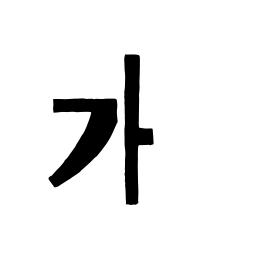

In [118]:
from PIL import Image
import numpy as np

# Create a NumPy array
numpy_file = '../../src/numpy/BMKIRANGHAERANG-TTF/ac00.npy'
numpy_image = np.load(numpy_file)

# Convert the array to a PIL image
img = Image.fromarray(numpy_image)
img

In [125]:
# 모든 폰트 이미지에 대해 numpy로 저장
import os
import glob

image_dir_base = '../../src/images'
image_dirs = [os.path.join(image_dir_base, x) for x in glob.glob1(image_dir_base, '*')]
image_dirs = [x for x in image_dirs if os.path.isdir(x)]
print(image_dirs)

['../../src/images/JejuHallasan', '../../src/images/BMKIRANGHAERANG-TTF', '../../src/images/changone', '../../src/images/yanolja', '../../src/images/Chilgok_Cye', '../../src/images/goheung', '../../src/images/ChusaLove', '../../src/images/lee_Regular', '../../src/images/KCCAhnjunggeun', '../../src/images/BMYEONSUNG_ttf']


In [127]:
image_dirs = [x for x in image_dirs if os.path.isdir(x)]

numpy_dir_base = '../../src/numpy'

for image_dir in image_dirs:
    font_name = image_dir.split('/')[-1]
    output_dir = os.path.join(numpy_dir_base, font_name)
    
    img_to_numpy(image_dir, output_dir)

### 2-8. 데이터 학습용과 검증용 및 평가용으로 분할하기

In [144]:
import shutil
from random import sample

numpy_dir_base = '../../src/numpy'
numpy_dirs = [os.path.join(numpy_dir_base, x) for x in glob.glob1(numpy_dir_base, '*')]
numpy_dirs = [x for x in numpy_dirs if os.path.isdir(x)]

train_dir = '../../src/datasets/train'
val_dir = '../../src/datasets/val'
test_dir = '../../src/datasets/test'

ratio_train = 0.8
ratio_val = 0.1
ratio_test = 0.1

for numpy_dir in numpy_dirs:
    numpy_files = [os.path.join(numpy_dir, x) for x in glob.glob1(numpy_dir, '*.npy')]
    n_files = len(numpy_files)
    indexes = [x for x in range(n_files)]
    
    n_train = int(ratio_train * n_files)
    train_indexes = sample(indexes, n_train)
    
    leftover_indexes = [x for x in indexes if x not in train_indexes]
    
    n_val = int(len(leftover_indexes) / 2)
    val_indexes = sample(leftover_indexes, n_val)

    test_indexes = [x for x in leftover_indexes if x not in val_indexes]

    for x in train_indexes:
        file_path = numpy_files[x]
        
        font_name = file_path.split('/')[-2]
        char_name = file_path.split('/')[-1]
        font_char_name = font_name + '_' + char_name
        full_path = os.path.join(train_dir, font_char_name)
        
        shutil.copyfile(file_path, full_path)
        
    for x in val_indexes:
        file_path = numpy_files[x]
        
        font_name = file_path.split('/')[-2]
        char_name = file_path.split('/')[-1]
        font_char_name = font_name + '_' + char_name
        full_path = os.path.join(val_dir, font_char_name)
        
        shutil.copyfile(file_path, full_path)
        
    for x in test_indexes:
        file_path = numpy_files[x]
        
        font_name = file_path.split('/')[-2]
        char_name = file_path.split('/')[-1]
        font_char_name = font_name + '_' + char_name
        full_path = os.path.join(test_dir, font_char_name)
        
        shutil.copyfile(file_path, full_path)

## 3. 데이터 활용로직

* 3-1. DNN 중에 이미지변환 알고리즘 검색하기
* 3-2. DNN 프레임워크 둘러보기 (pytorch)
* 3-3. 가장 간단한 딥러닝 모델(CNN) 구축하기
* 3-4. pytorch 로 가장 간단한 딥러닝 모델(CNN) 구현하기
* 3-5. training dataset 으로 학습하고, validation dataset 으로 검증해보기

### 3-1. DNN 중에 이미지변환 알고리즘 검색하기

### 3-2. DNN 프레임워크 둘러보기 (pytorch)

### 3-3. 가장 간단한 딥러닝 모델 (CNN) 구축하기

### 3-5. pytorch 로 가장 간단한 딥러닝 모델 (CNN) 구현하기

### 3-6. training dataset 으로 학습하고, validation dataset 으로 검증해보기

## 4. 데이터 분석 및 시각화

* 4-1. 학습한 모델을 test dataset 에 대해 돌려보기
* 4-2. 새로운 글자가 이미지로 주어지면 numpy로 변환해서 학습한 모델을 통과하여 결과물 도출해보기

### 4-1. 학습한 모델을 test dataset 에 대해 돌려보기

### 4-2. 새로운 글자가 이미지로 주어지면 numpy 로 변환해서 학습한 모델을 통과하여 결과물 도출해보기